# COVID in INDIA

### This source code is written to estimate the total number of COVID cases in India for a certain date in the future. For illustration, 01/08/2020 has been chosen.

####  
The packages are imported.

In [1]:
import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
pd.set_option('display.max_columns',50)

####  
The dataset is imported.

In [2]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [3]:
df

iso_code continent       location        date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan  2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan  2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan  2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan  2020-01-04          0.0        0.0   
...        ...       ...            ...         ...          ...        ...   
30006      NaN       NaN  International  2020-02-28        705.0        0.0   
30007      NaN       NaN  International  2020-02-29        705.0        0.0   
30008      NaN       NaN  International  2020-03-01        705.0        0.0   
30009      NaN       NaN  International  2020-03-02        705.0        0.0   
30010      NaN       NaN  International  2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
0               0.0         0.0                      0.0   
1               0.0         0.0                      0.0   
2               0.0         0.0                      0.0   
3               0.0         0.0                      0.0   
4               0.0         0.0                      0.0   
...             ...         ...                      ...   
30006           4.0         0.0                      NaN   
30007           6.0         2.0                      NaN   
30008           6.0         0.0                      NaN   
30009           6.0         0.0                      NaN   
30010           7.0         1.0                      NaN   

       new_cases_per_million  total_deaths_per_million  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   
...                      ...                       ...   
30006                    NaN                       NaN   
30007                    NaN                       NaN   
30008                    NaN                       NaN   
30009                    NaN                       NaN   
30010                    NaN                       NaN   

       new_deaths_per_million  total_tests  new_tests  \
0                         0.0          NaN        NaN   
1                         0.0          NaN        NaN   
2                         0.0          NaN        NaN   
3                         0.0          NaN        NaN   
4                         0.0          NaN        NaN   
...                       ...          ...        ...   
30006                     NaN          NaN        NaN   
30007                     NaN          NaN        NaN   
30008                     NaN          NaN        NaN   
30009                     NaN          NaN        NaN   
30010                     NaN          NaN        NaN   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                           NaN                     NaN                 NaN   
1                           NaN                     NaN                 NaN   
2                           NaN                     NaN                 NaN   
3                           NaN                     NaN                 NaN   
4                           NaN                     NaN                 NaN   
...                         ...                     ...                 ...   
30006                       NaN                     NaN                 NaN   
30007                       NaN                     NaN                 NaN   
30008                       NaN                     NaN                 NaN   
30009                       NaN                     NaN                 NaN   
30010                       NaN                     NaN                 NaN   

     

####  
From the complete dataset, only the fields having information about India are extracted.

In [4]:
to_be_dropped = []
for index,r in df.iterrows():
    if r['location'].lower() != 'india':
        to_be_dropped.append(index)  
df.drop(to_be_dropped, inplace= True)
df

iso_code continent location        date  total_cases  new_cases  \
12530      IND      Asia    India  2019-12-31          0.0        0.0   
12531      IND      Asia    India  2020-01-01          0.0        0.0   
12532      IND      Asia    India  2020-01-02          0.0        0.0   
12533      IND      Asia    India  2020-01-03          0.0        0.0   
12534      IND      Asia    India  2020-01-04          0.0        0.0   
...        ...       ...      ...         ...          ...        ...   
12720      IND      Asia    India  2020-07-09     767296.0    24879.0   
12721      IND      Asia    India  2020-07-10     793802.0    26506.0   
12722      IND      Asia    India  2020-07-11     820916.0    27114.0   
12723      IND      Asia    India  2020-07-12     849553.0    28637.0   
12724      IND      Asia    India  2020-07-13     878254.0    28701.0   

       total_deaths  new_deaths  total_cases_per_million  \
12530           0.0         0.0                    0.000   
12531           0.0         0.0                    0.000   
12532           0.0         0.0                    0.000   
12533           0.0         0.0                    0.000   
12534           0.0         0.0                    0.000   
...             ...         ...                      ...   
12720       21129.0       487.0                  556.010   
12721       21604.0       475.0                  575.217   
12722       22123.0       519.0                  594.865   
12723       22674.0       551.0                  615.616   
12724       23174.0       500.0                  636.414   

       new_cases_per_million  total_deaths_per_million  \
12530                  0.000                     0.000   
12531                  0.000                     0.000   
12532                  0.000                     0.000   
12533                  0.000                     0.000   
12534                  0.000                     0.000   
...                      ...                       ...   
12720                 18.028                    15.311   
12721                 19.207                    15.655   
12722                 19.648                    16.031   
12723                 20.751                    16.430   
12724                 20.798                    16.793   

       new_deaths_per_million  total_tests  new_tests  \
12530                   0.000          NaN        NaN   
12531                   0.000          NaN        NaN   
12532                   0.000          NaN        NaN   
12533                   0.000          NaN        NaN   
12534                   0.000          NaN        NaN   
...                       ...          ...        ...   
12720                   0.353   10740832.0   267061.0   
12721                   0.344   11024491.0   283659.0   
12722                   0.376   11307002.0   282511.0   
12723                   0.399          NaN        NaN   
12724                   0.362          NaN        NaN   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
12530                       NaN                     NaN                 NaN   
12531                       NaN                     NaN                 NaN   
12532                       NaN                     NaN                 NaN   
12533                       NaN                     NaN                 NaN   
12534                       NaN                     NaN                 NaN   
...                         ...                     ...                 ...   
12720                     7.783                   0.194            240666.0   
12721                     7.989                   0.206            246677.0   
12722                     8.193                   0.205            252410.0   
12723                       NaN                     NaN                 NaN   
12724                       NaN                     NaN                 NaN   

       new_tests_smoothed_per_thousand     tests_units  stringency_index  \
1

####  
The description of the data will give us vital stats on the data, like the min, mean, median, max and standard deviation.

In [5]:
df.describe()

total_cases     new_cases  total_deaths   new_deaths  \
count     195.000000    195.000000    195.000000   195.000000   
mean   119624.112821   4503.866667   3514.333333   118.841026   
std    209960.132039   7102.912614   6037.878879   207.900478   
min         0.000000      0.000000      0.000000     0.000000   
25%         3.000000      0.000000      0.000000     0.000000   
50%      4421.000000    601.000000    114.000000    17.000000   
75%    142112.500000   6610.000000   4094.000000   163.500000   
max    878254.000000  28701.000000  23174.000000  2003.000000   

       total_cases_per_million  new_cases_per_million  \
count               195.000000             195.000000   
mean                 86.683805               3.263667   
std                 152.144555               5.147023   
min                   0.000000               0.000000   
25%                   0.002000               0.000000   
50%                   3.204000               0.436000   
75%                 102.979500               4.790000   
max                 636.414000              20.798000   

       total_deaths_per_million  new_deaths_per_million   total_tests  \
count                195.000000              195.000000  1.090000e+02   
mean                   2.546621                0.086103  3.373111e+06   
std                    4.375270                0.150602  3.315997e+06   
min                    0.000000                0.000000  6.500000e+03   
25%                    0.000000                0.000000  4.015860e+05   
50%                    0.083000                0.012000  2.302792e+06   
75%                    2.967000                0.118500  5.658614e+06   
max                   16.793000                1.451000  1.130700e+07   

           new_tests  total_tests_per_thousand  new_tests_per_thousand  \
count     103.000000                109.000000              103.000000   
mean   108467.126214                  2.444312                0.078592   
std     76183.121448                  2.402864                0.055226   
min       157.000000                  0.005000                0.000000   
25%     40878.500000                  0.291000                0.029500   
50%    100180.000000                  1.669000                0.073000   
75%    150868.500000                  4.100000                0.109500   
max    283659.000000                  8.193000                0.206000   

       new_tests_smoothed  new_tests_smoothed_per_thousand  stringency_index  \
count          114.000000                       114.000000        191.000000   
mean         92034.719298                         0.066693         55.309005   
std          73126.858090                         0.053021         38.145755   
min           1121.000000                         0.001000          0.000000   
25%          25505.000000                         0.018500         10.190000   
50%          86659.000000                         0.062500         75.460000   
75%         140202.000000                         0.101750         81.940000   
max         252410.000000                         0.183000        100.000000   

         population  population_density    median_age  aged_65_older  \
count  1.950000e+02        1.950000e+02  1.950000e+02   1.950000e+02   
mean   1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
std    0.000000e+00        5.698973e-13  1.032939e-13   1.335697e-14   
min    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
25%    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
50%    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
75%    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
max    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   

       aged_70_older  gdp_per_capita  extreme_poverty  cvd_death_rate  \
count   1.950000e+02    1.950000e+02     1.950000e+02    1.950000e+02   
mean    3.414000e+00    6.426674e+03     2.120000e+01    2.822800e+0

In [6]:
df.describe().columns

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [7]:
columns_1 = df.columns

####  
This will show us the fields which are not numerical, and thus not useful in this case. If some field is useful but still comes out to not be numerical, that has to be converted.

In [8]:
for column in columns_1:
    if column not in df.describe().columns:
        print(column)

iso_code
continent
location
date
tests_units


####  
The fields which are not numerical are dropped, and it is noted that the 'date' field has to be converted into a numerical field.

In [9]:
df.drop(['iso_code','continent','location','tests_units'],axis =1 , inplace= True)

In [10]:
df

date  total_cases  new_cases  total_deaths  new_deaths  \
12530  2019-12-31          0.0        0.0           0.0         0.0   
12531  2020-01-01          0.0        0.0           0.0         0.0   
12532  2020-01-02          0.0        0.0           0.0         0.0   
12533  2020-01-03          0.0        0.0           0.0         0.0   
12534  2020-01-04          0.0        0.0           0.0         0.0   
...           ...          ...        ...           ...         ...   
12720  2020-07-09     767296.0    24879.0       21129.0       487.0   
12721  2020-07-10     793802.0    26506.0       21604.0       475.0   
12722  2020-07-11     820916.0    27114.0       22123.0       519.0   
12723  2020-07-12     849553.0    28637.0       22674.0       551.0   
12724  2020-07-13     878254.0    28701.0       23174.0       500.0   

       total_cases_per_million  new_cases_per_million  \
12530                    0.000                  0.000   
12531                    0.000                  0.000   
12532                    0.000                  0.000   
12533                    0.000                  0.000   
12534                    0.000                  0.000   
...                        ...                    ...   
12720                  556.010                 18.028   
12721                  575.217                 19.207   
12722                  594.865                 19.648   
12723                  615.616                 20.751   
12724                  636.414                 20.798   

       total_deaths_per_million  new_deaths_per_million  total_tests  \
12530                     0.000                   0.000          NaN   
12531                     0.000                   0.000          NaN   
12532                     0.000                   0.000          NaN   
12533                     0.000                   0.000          NaN   
12534                     0.000                   0.000          NaN   
...                         ...                     ...          ...   
12720                    15.311                   0.353   10740832.0   
12721                    15.655                   0.344   11024491.0   
12722                    16.031                   0.376   11307002.0   
12723                    16.430                   0.399          NaN   
12724                    16.793                   0.362          NaN   

       new_tests  total_tests_per_thousand  new_tests_per_thousand  \
12530        NaN                       NaN                     NaN   
12531        NaN                       NaN                     NaN   
12532        NaN                       NaN                     NaN   
12533        NaN                       NaN                     NaN   
12534        NaN                       NaN                     NaN   
...          ...                       ...                     ...   
12720   267061.0                     7.783                   0.194   
12721   283659.0                     7.989                   0.206   
12722   282511.0                     8.193                   0.205   
12723        NaN                       NaN                     NaN   
12724        NaN                       NaN                     NaN   

       new_tests_smoothed  new_tests_smoothed_per_thousand  stringency_index  \
12530                 NaN                              NaN               NaN   
12531                 NaN                              NaN              0.00   
12532                 NaN                              NaN              0.00   
12533                 NaN                              NaN              0.00   
12534                 NaN                              NaN              0.00   
...                   ...                              ...               ...   
12720            240666.0                            0.174             74.07   
12721            246677.0                            0.179             74.07   
12722            252410.0                        

In [11]:
df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].map(dt.datetime.toordinal)

In [12]:
df.reset_index(drop= True,inplace = True)

In [13]:
df.describe()

date    total_cases     new_cases  total_deaths   new_deaths  \
count     195.000000     195.000000    195.000000    195.000000   195.000000   
mean   737521.646154  119624.112821   4503.866667   3514.333333   118.841026   
std        56.833478  209960.132039   7102.912614   6037.878879   207.900478   
min    737424.000000       0.000000      0.000000      0.000000     0.000000   
25%    737472.500000       3.000000      0.000000      0.000000     0.000000   
50%    737522.000000    4421.000000    601.000000    114.000000    17.000000   
75%    737570.500000  142112.500000   6610.000000   4094.000000   163.500000   
max    737619.000000  878254.000000  28701.000000  23174.000000  2003.000000   

       total_cases_per_million  new_cases_per_million  \
count               195.000000             195.000000   
mean                 86.683805               3.263667   
std                 152.144555               5.147023   
min                   0.000000               0.000000   
25%                   0.002000               0.000000   
50%                   3.204000               0.436000   
75%                 102.979500               4.790000   
max                 636.414000              20.798000   

       total_deaths_per_million  new_deaths_per_million   total_tests  \
count                195.000000              195.000000  1.090000e+02   
mean                   2.546621                0.086103  3.373111e+06   
std                    4.375270                0.150602  3.315997e+06   
min                    0.000000                0.000000  6.500000e+03   
25%                    0.000000                0.000000  4.015860e+05   
50%                    0.083000                0.012000  2.302792e+06   
75%                    2.967000                0.118500  5.658614e+06   
max                   16.793000                1.451000  1.130700e+07   

           new_tests  total_tests_per_thousand  new_tests_per_thousand  \
count     103.000000                109.000000              103.000000   
mean   108467.126214                  2.444312                0.078592   
std     76183.121448                  2.402864                0.055226   
min       157.000000                  0.005000                0.000000   
25%     40878.500000                  0.291000                0.029500   
50%    100180.000000                  1.669000                0.073000   
75%    150868.500000                  4.100000                0.109500   
max    283659.000000                  8.193000                0.206000   

       new_tests_smoothed  new_tests_smoothed_per_thousand  stringency_index  \
count          114.000000                       114.000000        191.000000   
mean         92034.719298                         0.066693         55.309005   
std          73126.858090                         0.053021         38.145755   
min           1121.000000                         0.001000          0.000000   
25%          25505.000000                         0.018500         10.190000   
50%          86659.000000                         0.062500         75.460000   
75%         140202.000000                         0.101750         81.940000   
max         252410.000000                         0.183000        100.000000   

         population  population_density    median_age  aged_65_older  \
count  1.950000e+02        1.950000e+02  1.950000e+02   1.950000e+02   
mean   1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
std    0.000000e+00        5.698973e-13  1.032939e-13   1.335697e-14   
min    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
25%    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
50%    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
75%    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
max    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   

       aged_70_older  gdp_per_capita  extreme_poverty  cvd_death_rate  \
count   1.950

####  
The field which have null values are noted down.

In [14]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

total_tests                        86
new_tests                          92
total_tests_per_thousand           86
new_tests_per_thousand             92
new_tests_smoothed                 81
new_tests_smoothed_per_thousand    81
stringency_index                    4
dtype: int64

In [15]:
req_mean =  df[null_columns].mean()
req_mean['new_tests']

108467.12621359223

####  
If the null cells are situated in rows before the spread of the virus, then the values null values are changed to 0. Else they are replaced by the average value of the values already existing in the column.

In [16]:
for index, row in df.iterrows():
    for column in null_columns:
        if pd.isna(row[column]):
            if row['date'] < 737525:
                df.loc[index,column] = 0
            else:
                df.loc[index,column] = req_mean[column]

In [17]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [18]:
df.describe()

date    total_cases     new_cases  total_deaths   new_deaths  \
count     195.000000     195.000000    195.000000    195.000000   195.000000   
mean   737521.646154  119624.112821   4503.866667   3514.333333   118.841026   
std        56.833478  209960.132039   7102.912614   6037.878879   207.900478   
min    737424.000000       0.000000      0.000000      0.000000     0.000000   
25%    737472.500000       3.000000      0.000000      0.000000     0.000000   
50%    737522.000000    4421.000000    601.000000    114.000000    17.000000   
75%    737570.500000  142112.500000   6610.000000   4094.000000   163.500000   
max    737619.000000  878254.000000  28701.000000  23174.000000  2003.000000   

       total_cases_per_million  new_cases_per_million  \
count               195.000000             195.000000   
mean                 86.683805               3.263667   
std                 152.144555               5.147023   
min                   0.000000               0.000000   
25%                   0.002000               0.000000   
50%                   3.204000               0.436000   
75%                 102.979500               4.790000   
max                 636.414000              20.798000   

       total_deaths_per_million  new_deaths_per_million   total_tests  \
count                195.000000              195.000000  1.950000e+02   
mean                   2.546621                0.086103  1.954675e+06   
std                    4.375270                0.150602  2.984672e+06   
min                    0.000000                0.000000  0.000000e+00   
25%                    0.000000                0.000000  0.000000e+00   
50%                    0.083000                0.012000  1.140150e+05   
75%                    2.967000                0.118500  3.302148e+06   
max                   16.793000                1.451000  1.130700e+07   

           new_tests  total_tests_per_thousand  new_tests_per_thousand  \
count     195.000000                195.000000              195.000000   
mean    60630.342345                  1.416447                0.043931   
std     77245.253047                  2.162794                0.055983   
min         0.000000                  0.000000                0.000000   
25%         0.000000                  0.000000                0.000000   
50%     13904.000000                  0.083000                0.010000   
75%    108467.126214                  2.392500                0.078592   
max    283659.000000                  8.193000                0.206000   

       new_tests_smoothed  new_tests_smoothed_per_thousand  stringency_index  \
count          195.000000                       195.000000        195.000000   
mean         54748.858659                         0.039674         55.025369   
std          71879.645777                         0.052105         37.957663   
min              0.000000                         0.000000          0.000000   
25%              0.000000                         0.000000         10.190000   
50%          10403.000000                         0.008000         75.460000   
75%         101164.000000                         0.073500         81.940000   
max         252410.000000                         0.183000        100.000000   

         population  population_density    median_age  aged_65_older  \
count  1.950000e+02        1.950000e+02  1.950000e+02   1.950000e+02   
mean   1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
std    0.000000e+00        5.698973e-13  1.032939e-13   1.335697e-14   
min    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
25%    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
50%    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
75%    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   
max    1.380004e+09        4.504190e+02  2.820000e+01   5.989000e+00   

       aged_70_older  gdp_per_capita  extreme_poverty  cvd_death_rate  \
count   1.950

In [19]:
df

date  total_cases  new_cases  total_deaths  new_deaths  \
0    737424          0.0        0.0           0.0         0.0   
1    737425          0.0        0.0           0.0         0.0   
2    737426          0.0        0.0           0.0         0.0   
3    737427          0.0        0.0           0.0         0.0   
4    737428          0.0        0.0           0.0         0.0   
..      ...          ...        ...           ...         ...   
190  737615     767296.0    24879.0       21129.0       487.0   
191  737616     793802.0    26506.0       21604.0       475.0   
192  737617     820916.0    27114.0       22123.0       519.0   
193  737618     849553.0    28637.0       22674.0       551.0   
194  737619     878254.0    28701.0       23174.0       500.0   

     total_cases_per_million  new_cases_per_million  total_deaths_per_million  \
0                      0.000                  0.000                     0.000   
1                      0.000                  0.000                     0.000   
2                      0.000                  0.000                     0.000   
3                      0.000                  0.000                     0.000   
4                      0.000                  0.000                     0.000   
..                       ...                    ...                       ...   
190                  556.010                 18.028                    15.311   
191                  575.217                 19.207                    15.655   
192                  594.865                 19.648                    16.031   
193                  615.616                 20.751                    16.430   
194                  636.414                 20.798                    16.793   

     new_deaths_per_million   total_tests      new_tests  \
0                     0.000  0.000000e+00       0.000000   
1                     0.000  0.000000e+00       0.000000   
2                     0.000  0.000000e+00       0.000000   
3                     0.000  0.000000e+00       0.000000   
4                     0.000  0.000000e+00       0.000000   
..                      ...           ...            ...   
190                   0.353  1.074083e+07  267061.000000   
191                   0.344  1.102449e+07  283659.000000   
192                   0.376  1.130700e+07  282511.000000   
193                   0.399  3.373111e+06  108467.126214   
194                   0.362  3.373111e+06  108467.126214   

     total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                    0.000000                0.000000            0.000000   
1                    0.000000                0.000000            0.000000   
2                    0.000000                0.000000            0.000000   
3                    0.000000                0.000000            0.000000   
4                    0.000000                0.000000            0.000000   
..                        ...                     ...                 ...   
190                  7.783000                0.194000       240666.000000   
191                  7.989000                0.206000       246677.000000   
192                  8.193000                0.205000       252410.000000   
193                  2.444312                0.078592        92034.719298   
194                  2.444312                0.078592        92034.719298   

     new_tests_smoothed_per_thousand  stringency_index    population  \
0                           0.000000          0.000000  1.380004e+09   
1                           0.000000          0.000000  1.380004e+09   
2                           0.000000          0.000000  1.380004e+09   
3                           0.000000          0.000000  1.380004e+09   
4                           0.000000          0.000000  1.380004e+09   
..                               ...               ...           ...   
190                         0.174000         74.070000  1.380004e+09   
191                         0.1

####  
Histograms for all the fields are constructed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE32F06288>,
      dtype=object)

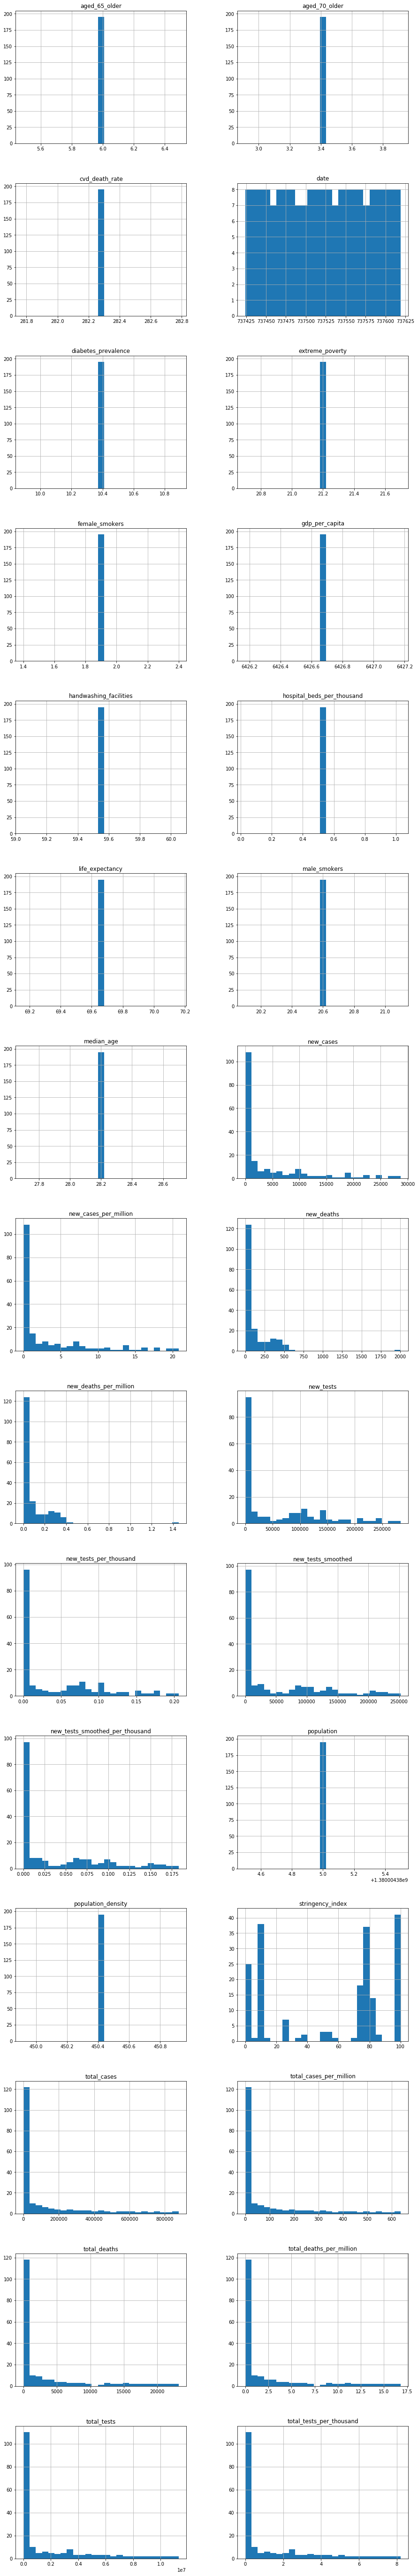

In [20]:
df.hist(figsize = (15,100),bins = 25, layout=(15,2))

####    
From the histograms it can be seen that there are a lot of columns which only have a single value, thus are not very useful. They are dropped from the data frame.

In [21]:
unique_1 = df.columns[df.nunique() == 1]
unique_1

Index(['population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [22]:
df.drop(unique_1, axis= 1, inplace = True)

In [23]:
df

date  total_cases  new_cases  total_deaths  new_deaths  \
0    737424          0.0        0.0           0.0         0.0   
1    737425          0.0        0.0           0.0         0.0   
2    737426          0.0        0.0           0.0         0.0   
3    737427          0.0        0.0           0.0         0.0   
4    737428          0.0        0.0           0.0         0.0   
..      ...          ...        ...           ...         ...   
190  737615     767296.0    24879.0       21129.0       487.0   
191  737616     793802.0    26506.0       21604.0       475.0   
192  737617     820916.0    27114.0       22123.0       519.0   
193  737618     849553.0    28637.0       22674.0       551.0   
194  737619     878254.0    28701.0       23174.0       500.0   

     total_cases_per_million  new_cases_per_million  total_deaths_per_million  \
0                      0.000                  0.000                     0.000   
1                      0.000                  0.000                     0.000   
2                      0.000                  0.000                     0.000   
3                      0.000                  0.000                     0.000   
4                      0.000                  0.000                     0.000   
..                       ...                    ...                       ...   
190                  556.010                 18.028                    15.311   
191                  575.217                 19.207                    15.655   
192                  594.865                 19.648                    16.031   
193                  615.616                 20.751                    16.430   
194                  636.414                 20.798                    16.793   

     new_deaths_per_million   total_tests      new_tests  \
0                     0.000  0.000000e+00       0.000000   
1                     0.000  0.000000e+00       0.000000   
2                     0.000  0.000000e+00       0.000000   
3                     0.000  0.000000e+00       0.000000   
4                     0.000  0.000000e+00       0.000000   
..                      ...           ...            ...   
190                   0.353  1.074083e+07  267061.000000   
191                   0.344  1.102449e+07  283659.000000   
192                   0.376  1.130700e+07  282511.000000   
193                   0.399  3.373111e+06  108467.126214   
194                   0.362  3.373111e+06  108467.126214   

     total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                    0.000000                0.000000            0.000000   
1                    0.000000                0.000000            0.000000   
2                    0.000000                0.000000            0.000000   
3                    0.000000                0.000000            0.000000   
4                    0.000000                0.000000            0.000000   
..                        ...                     ...                 ...   
190                  7.783000                0.194000       240666.000000   
191                  7.989000                0.206000       246677.000000   
192                  8.193000                0.205000       252410.000000   
193                  2.444312                0.078592        92034.719298   
194                  2.444312                0.078592        92034.719298   

     new_tests_smoothed_per_thousand  stringency_index  
0                           0.000000          0.000000  
1                           0.000000          0.000000  
2                           0.000000          0.000000  
3                           0.000000          0.000000  
4                           0.000000          0.000000  
..                               ...               ...  
190                         0.174000         74.070000  
191                         0.179000         74.070000  
192                         0.183000         55.309005  
193                         0.066693 

####  
Scatter plots are constructed for bivariate analysis.

C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


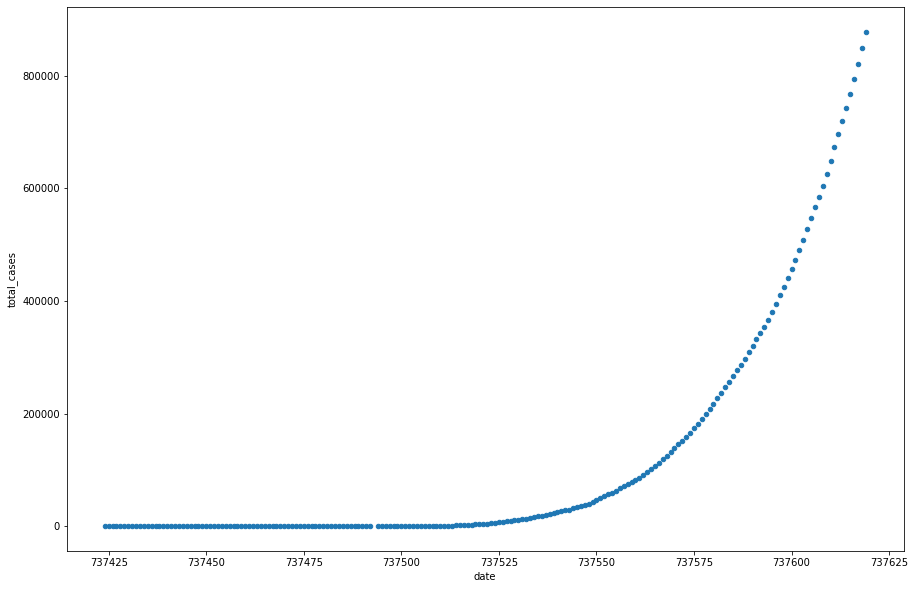

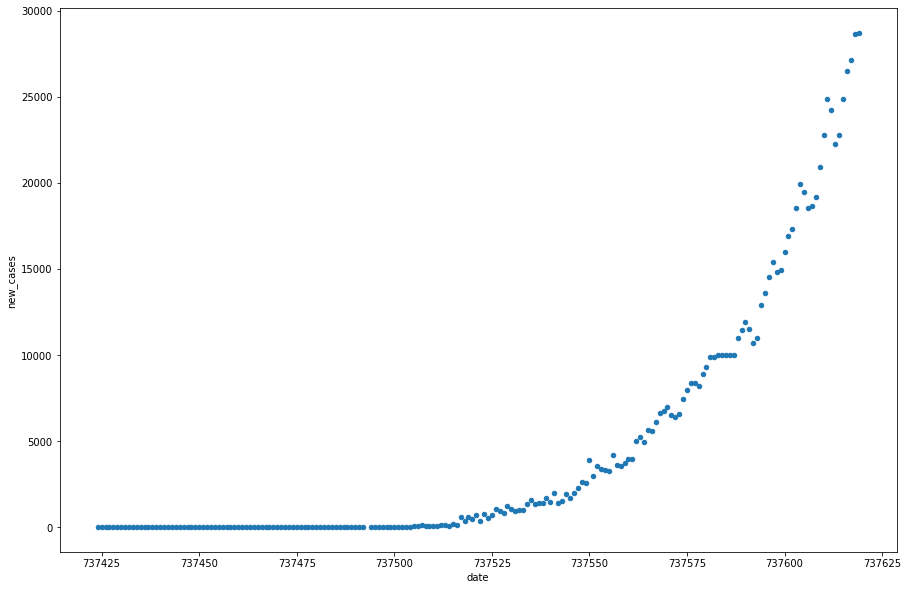

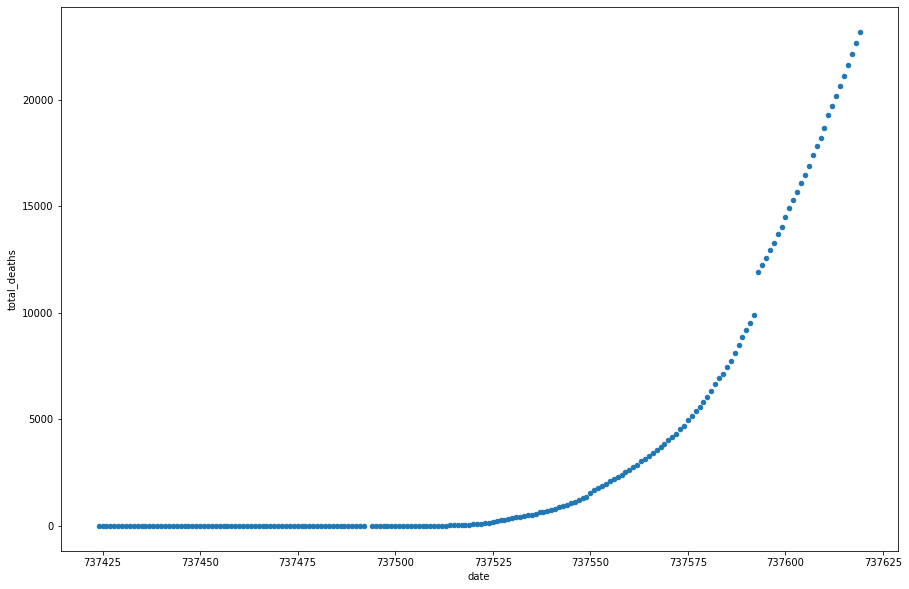

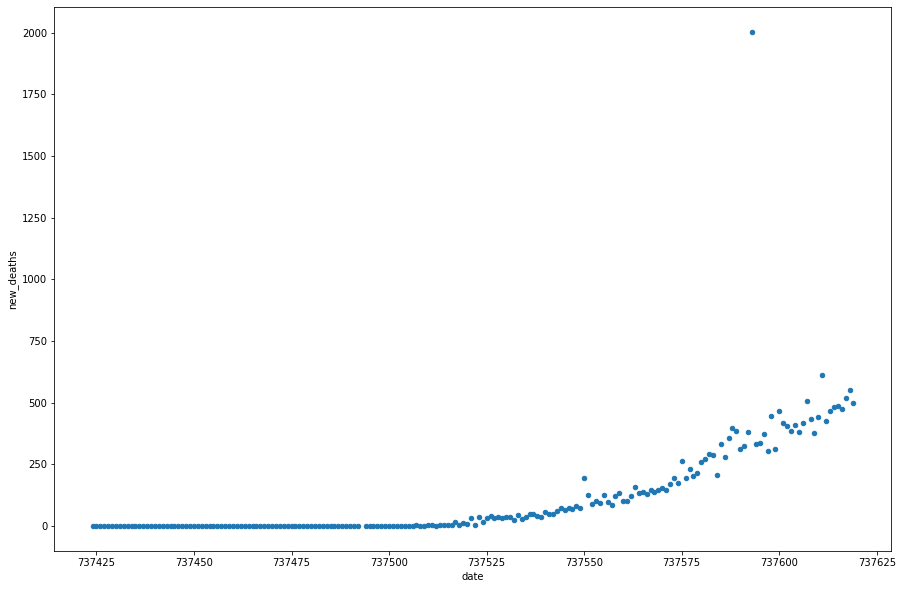

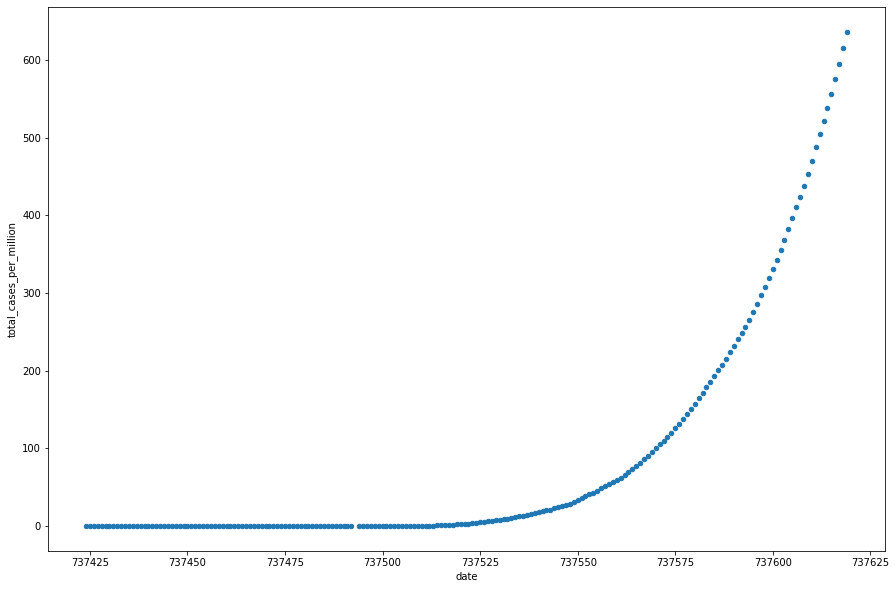

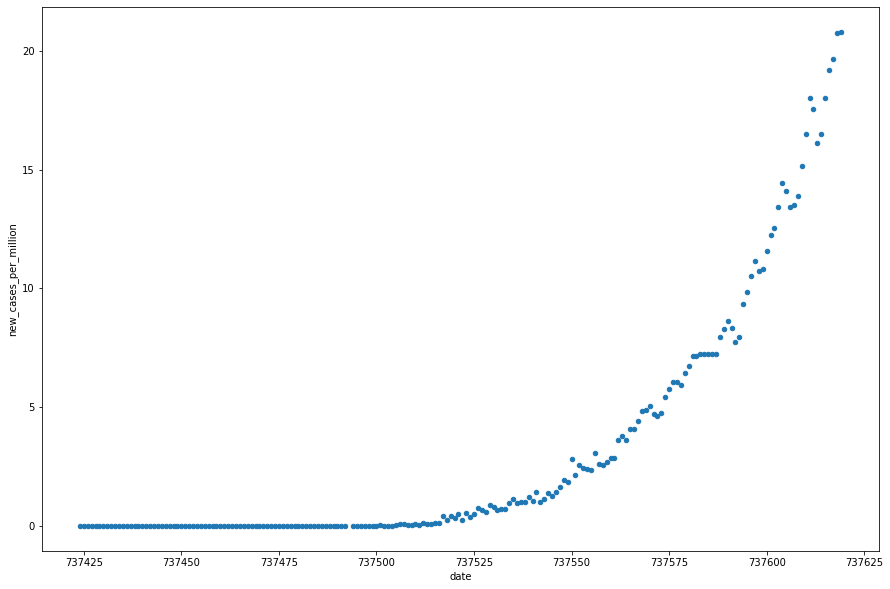

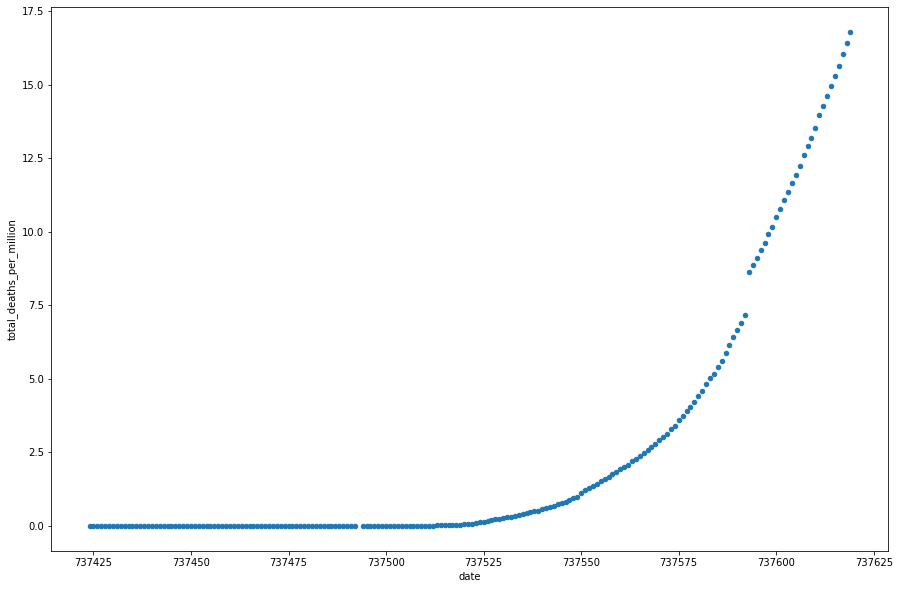

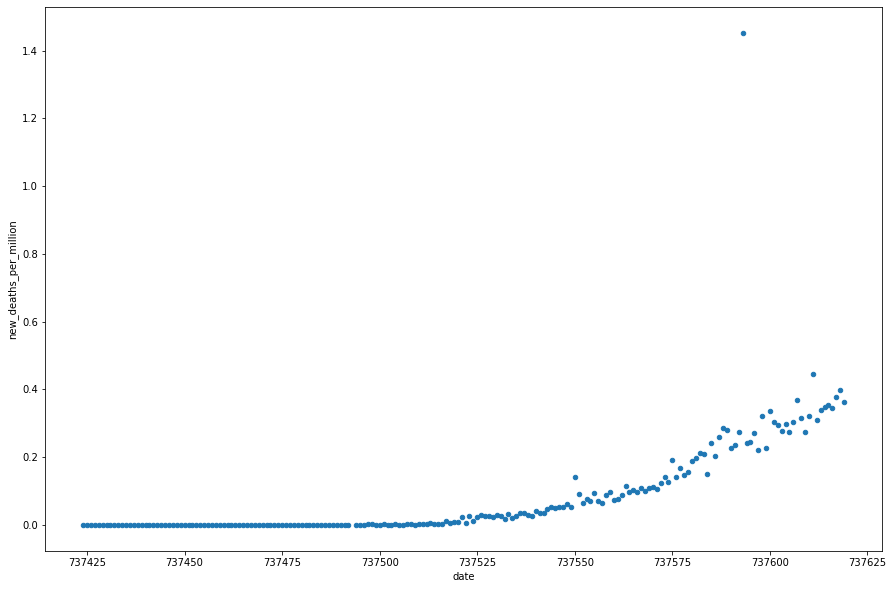

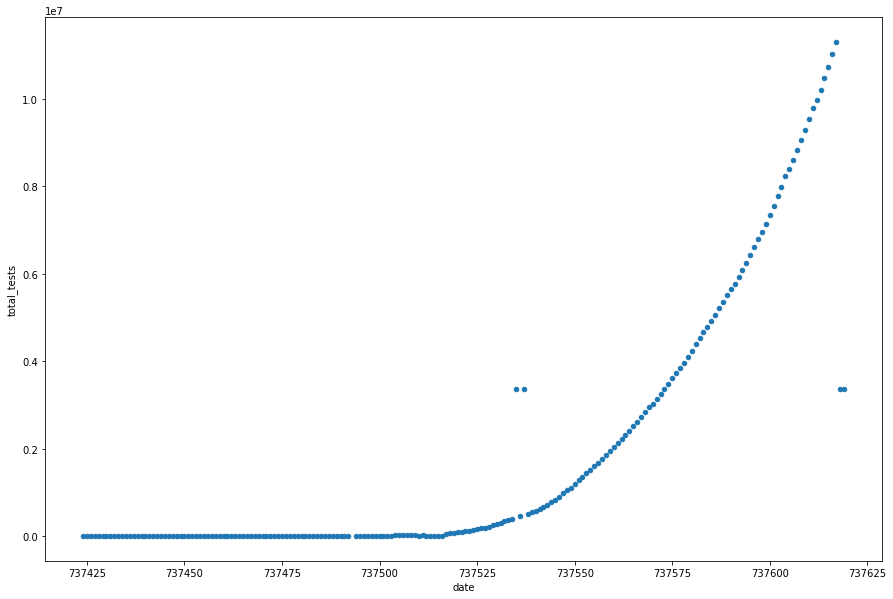

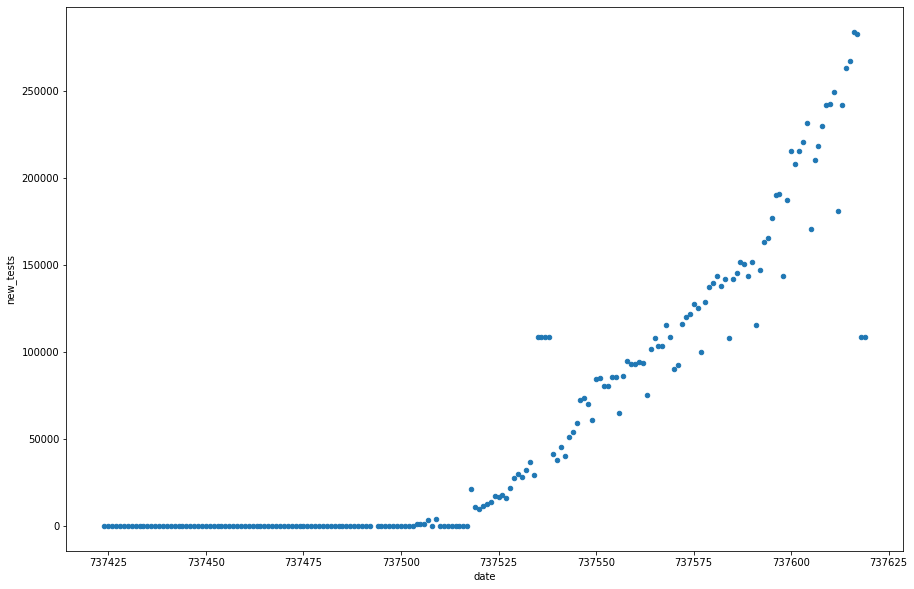

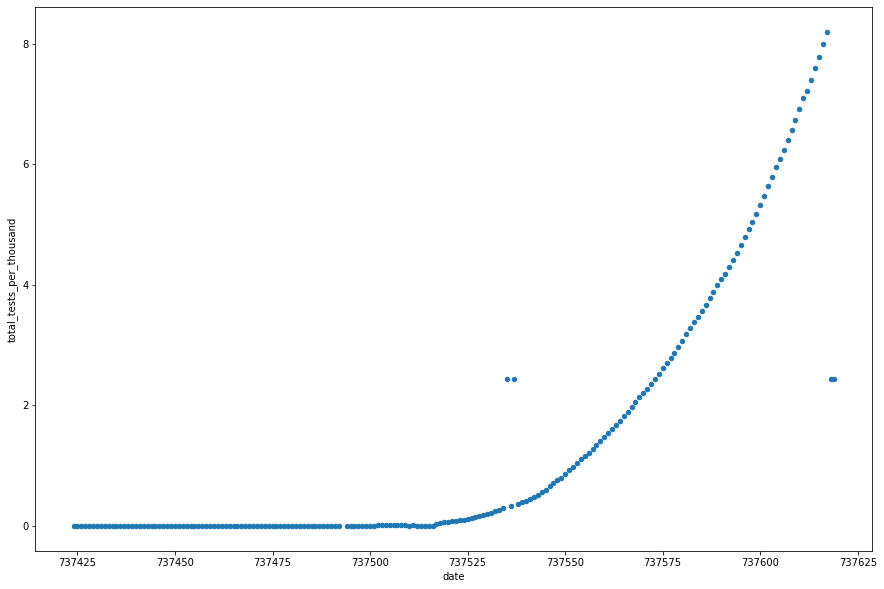

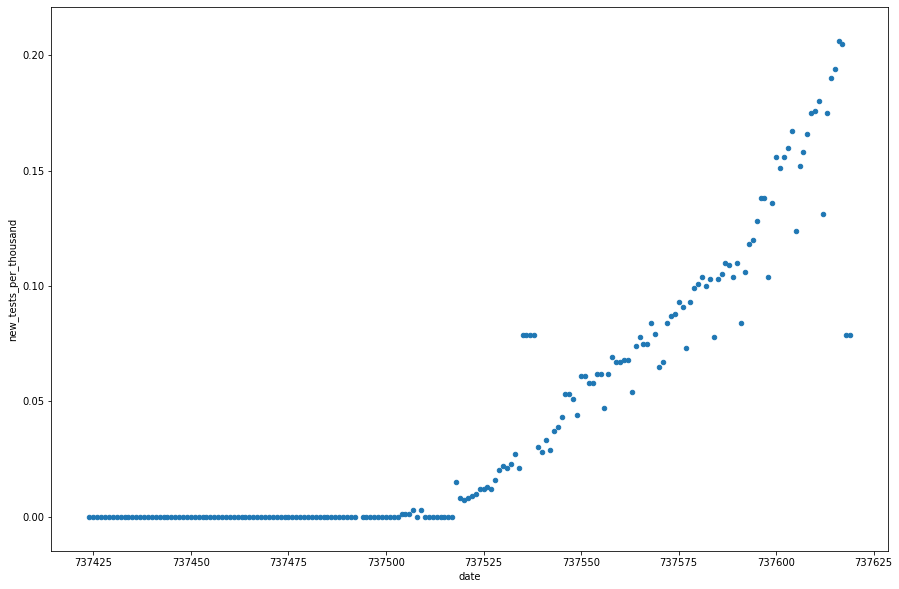

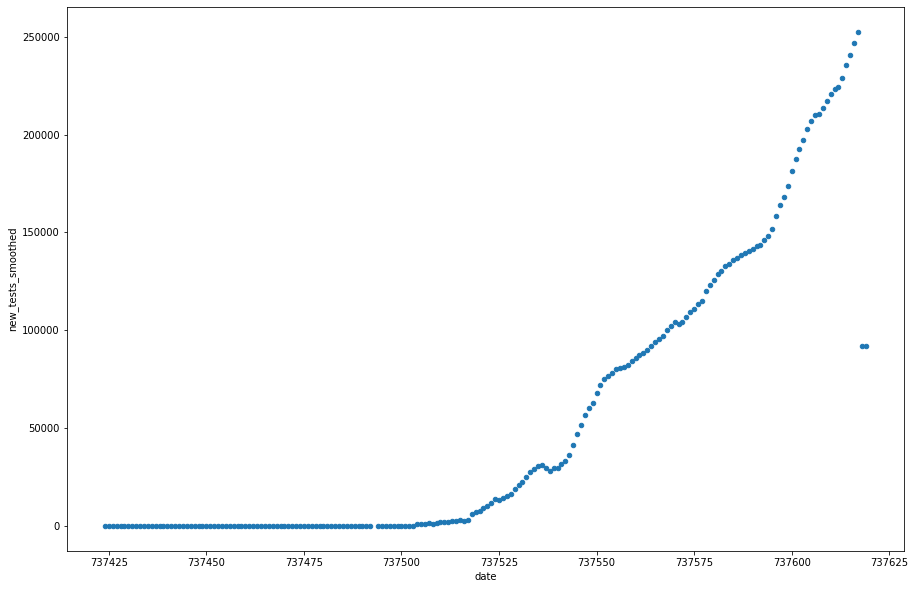

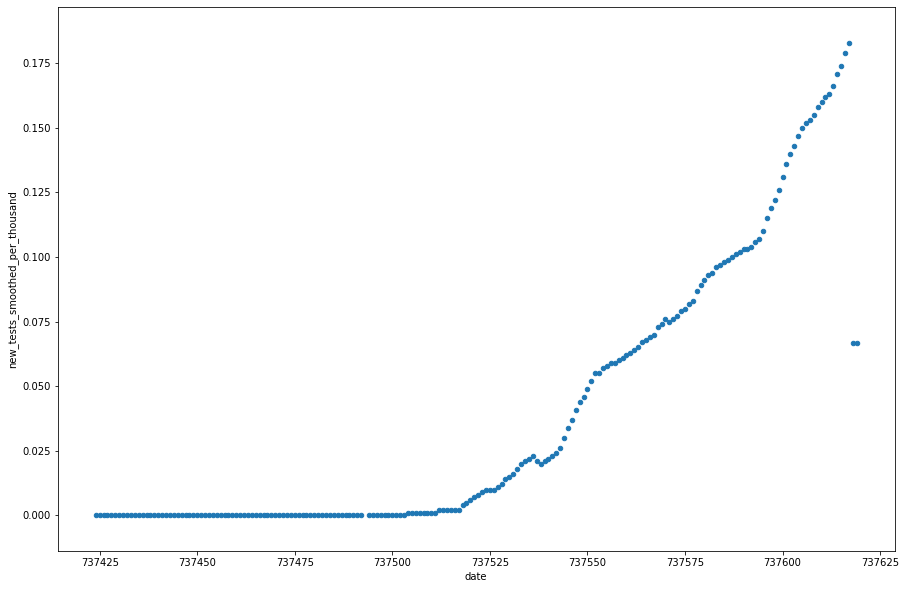

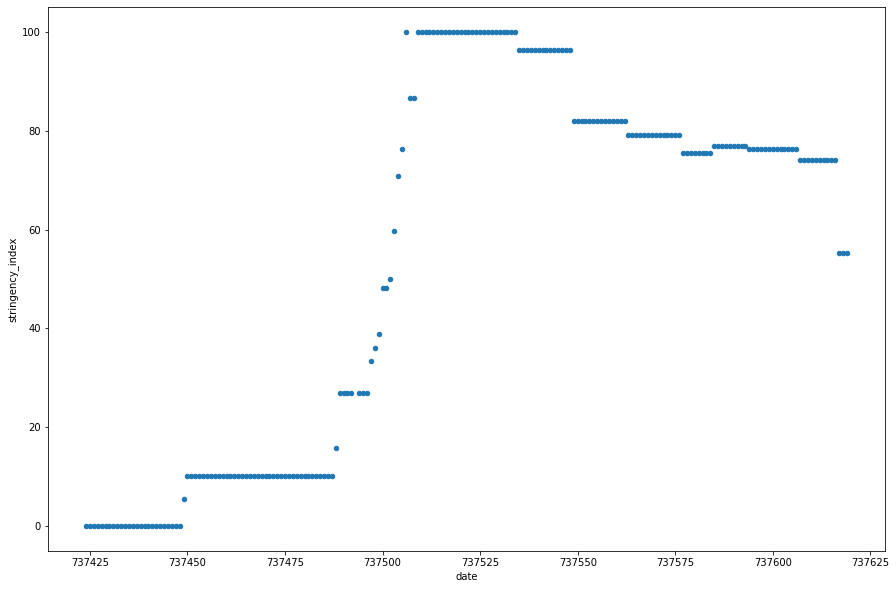

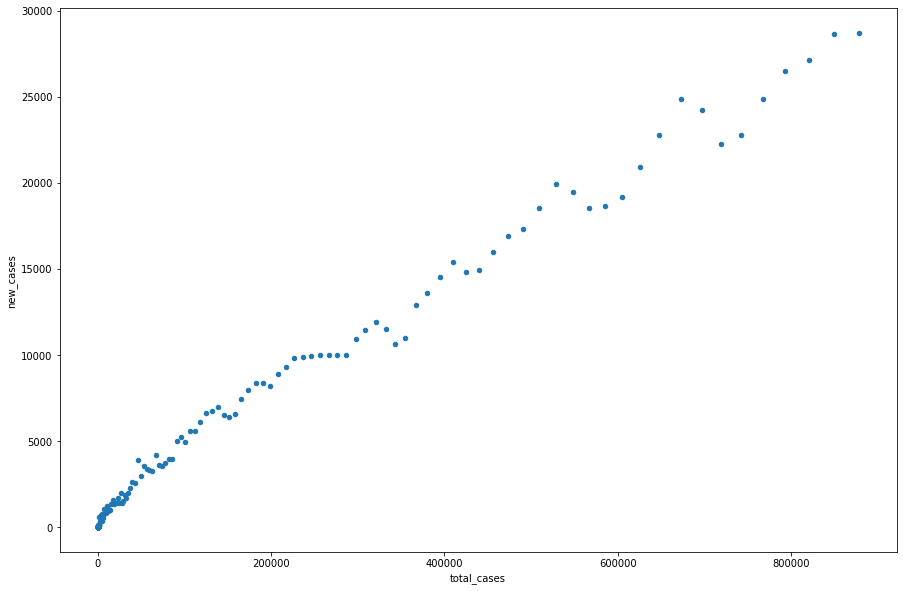

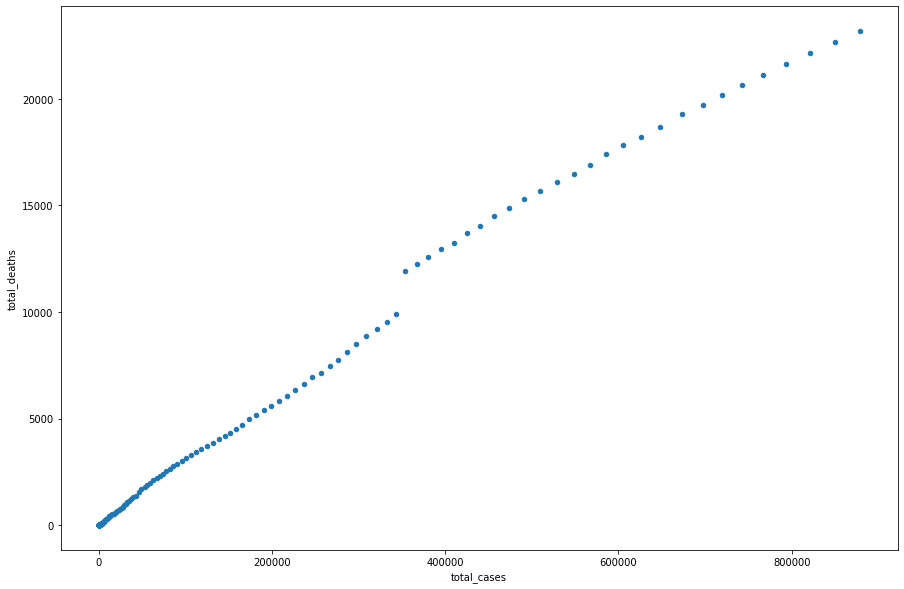

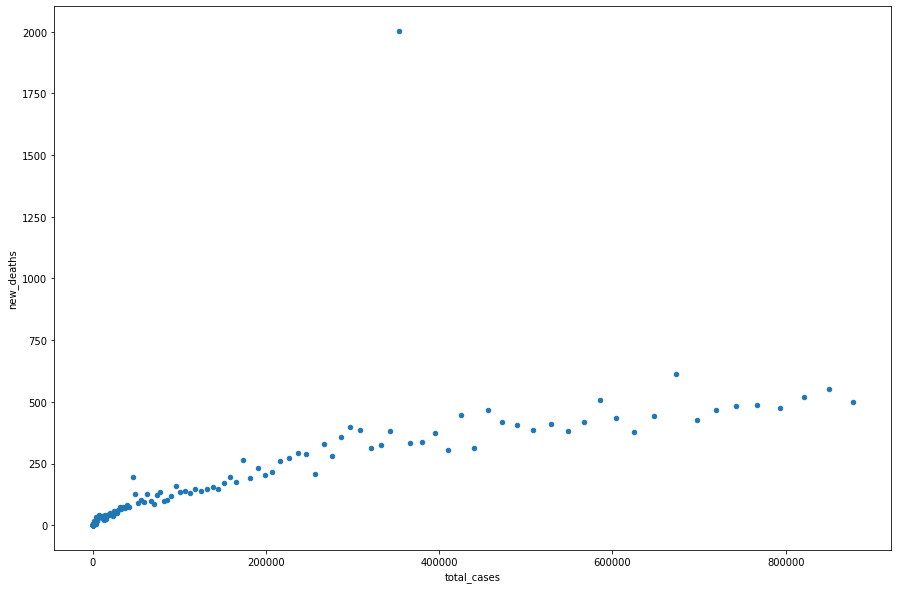

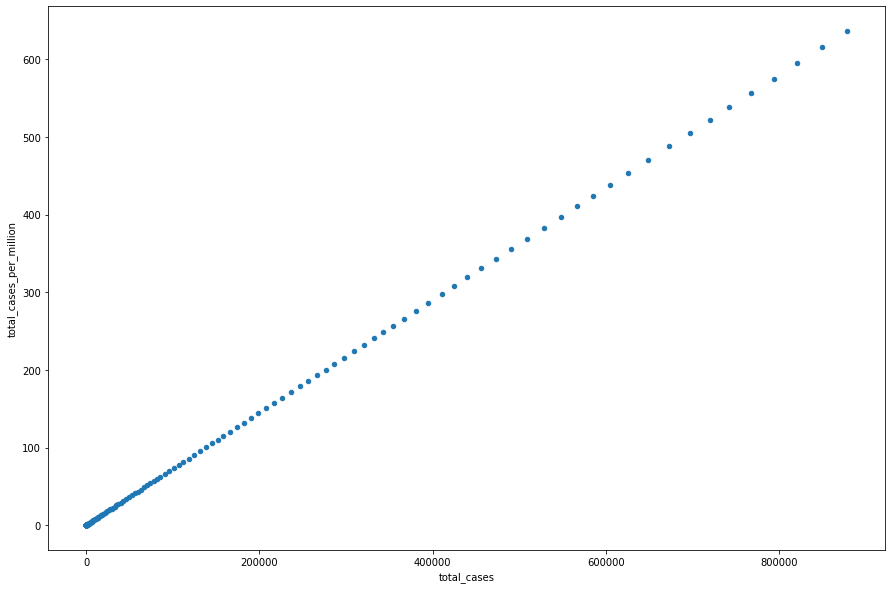

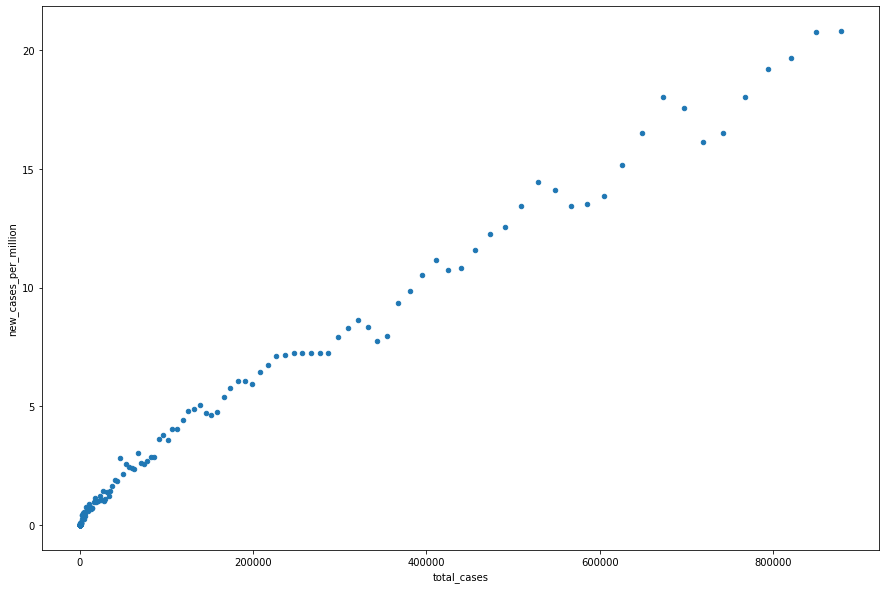

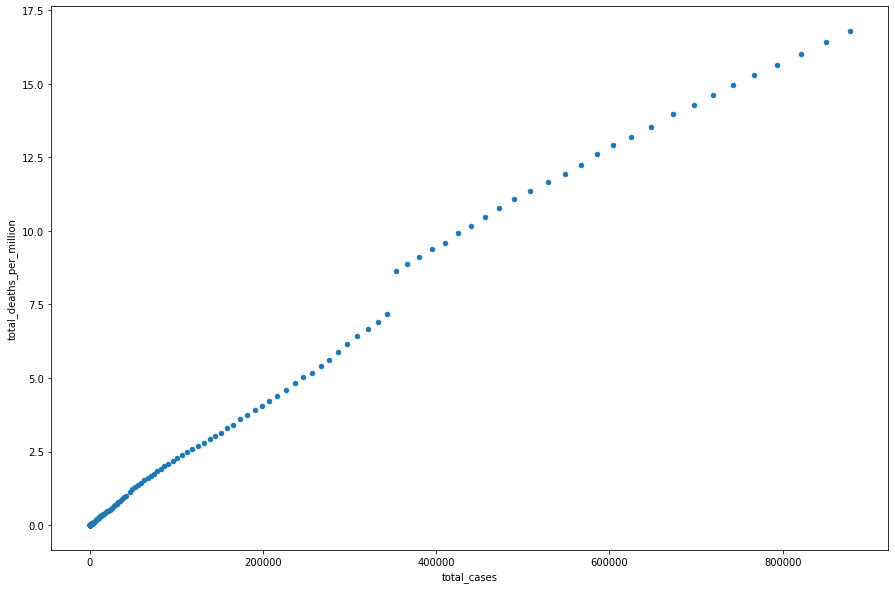

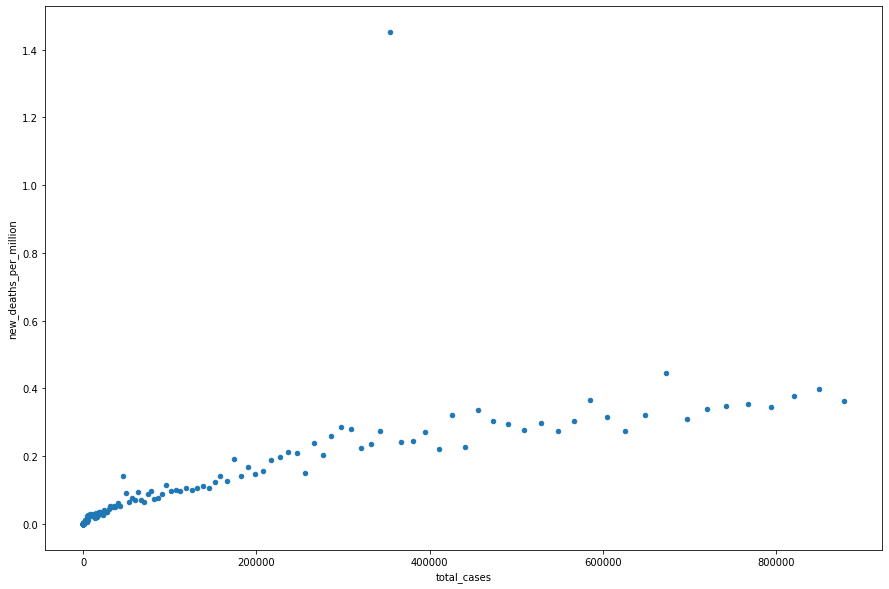

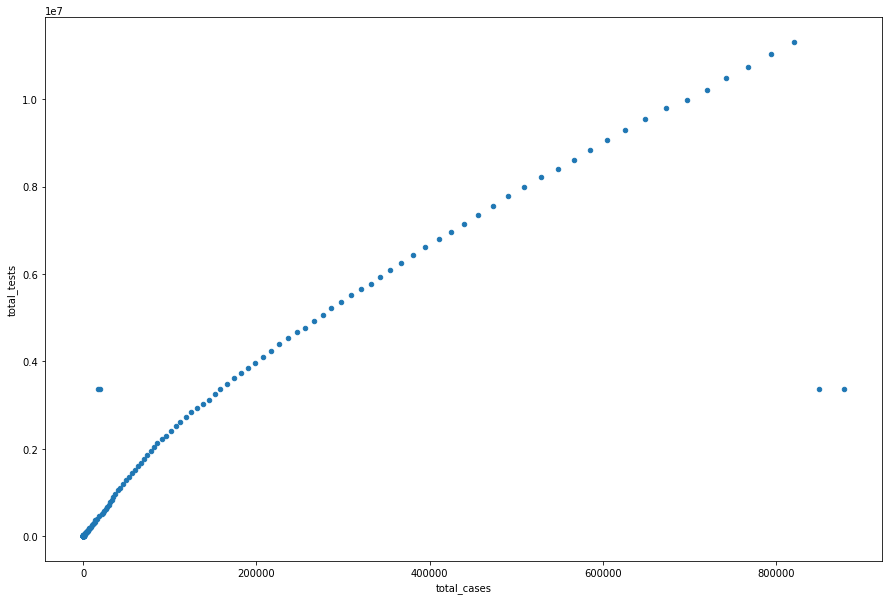

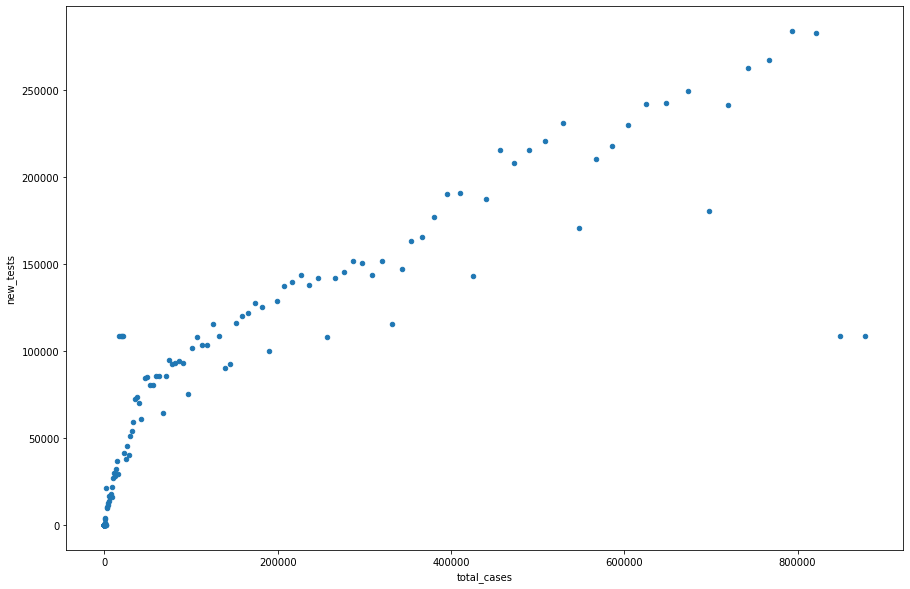

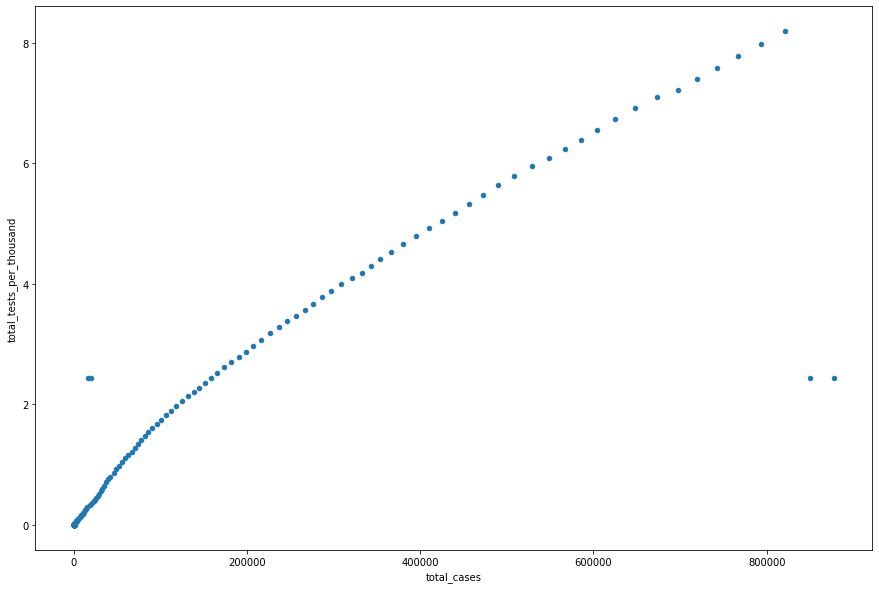

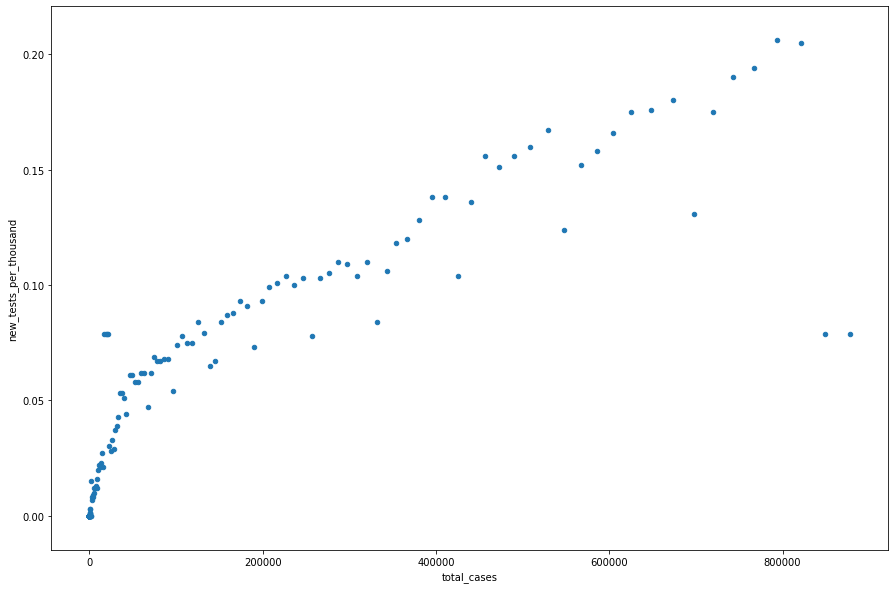

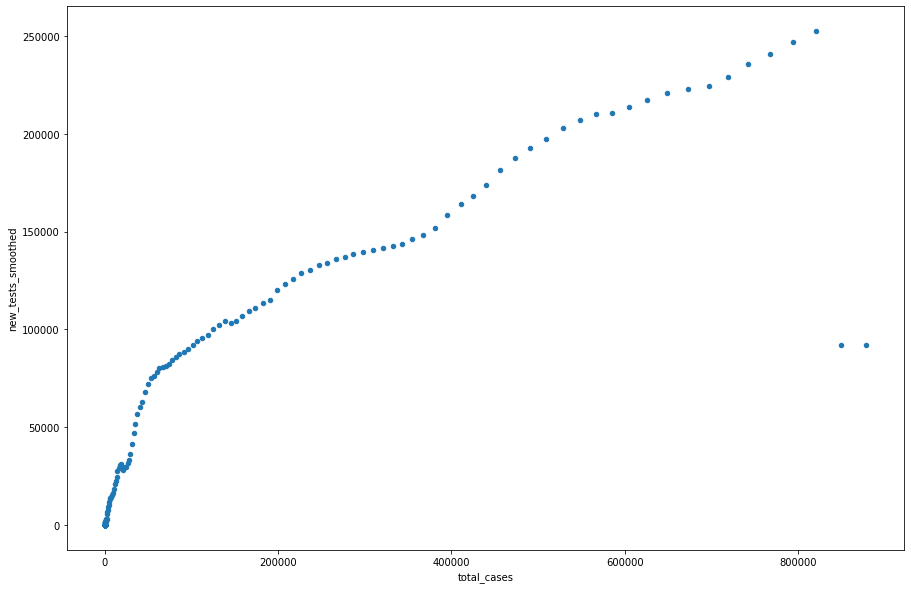

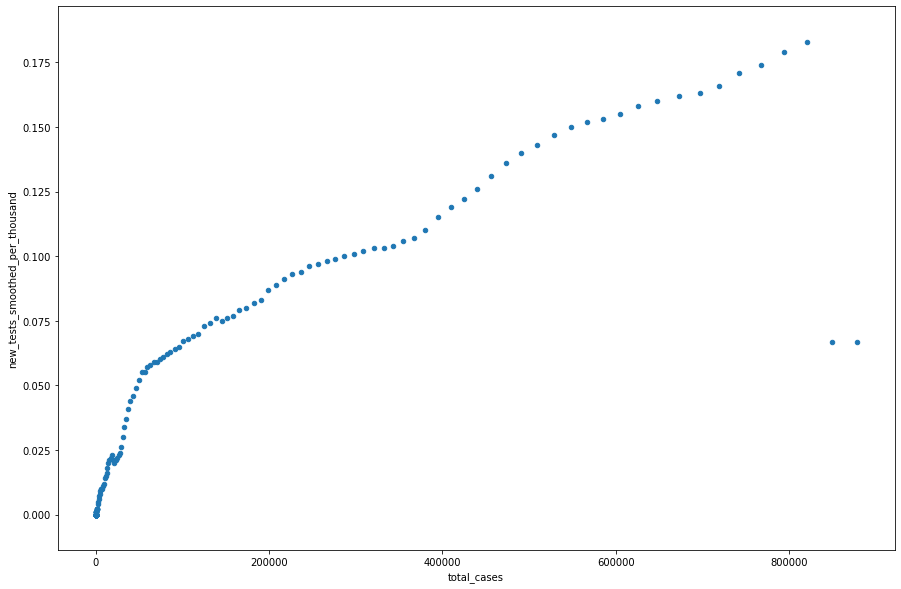

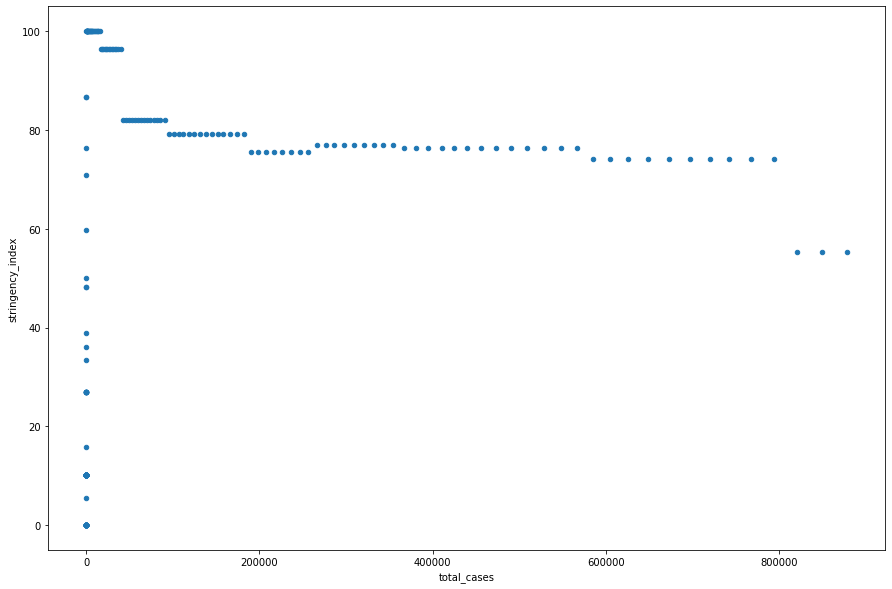

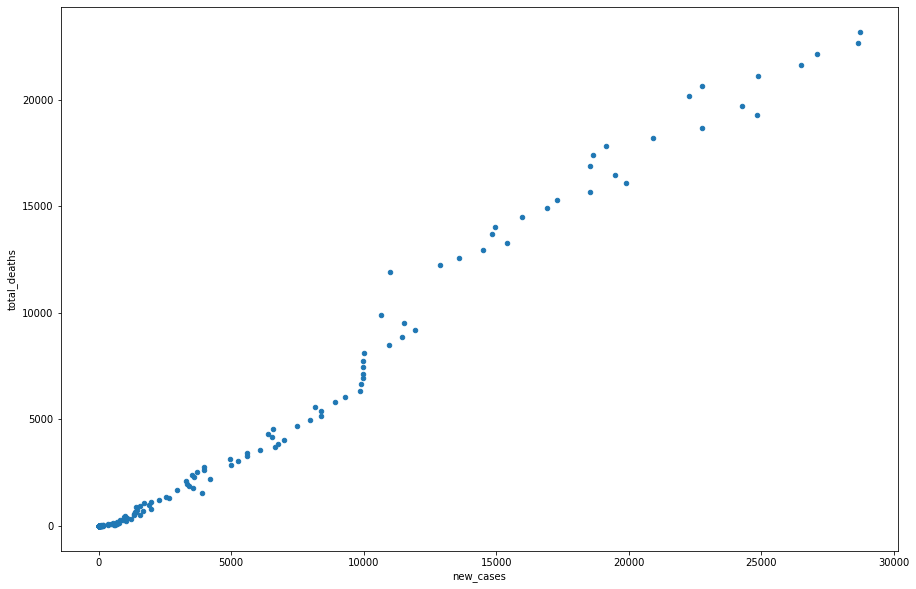

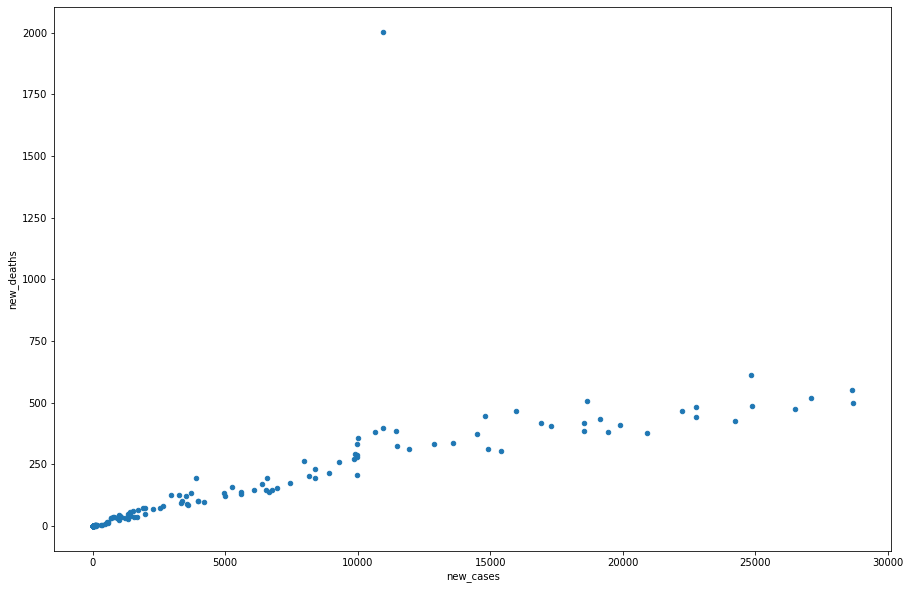

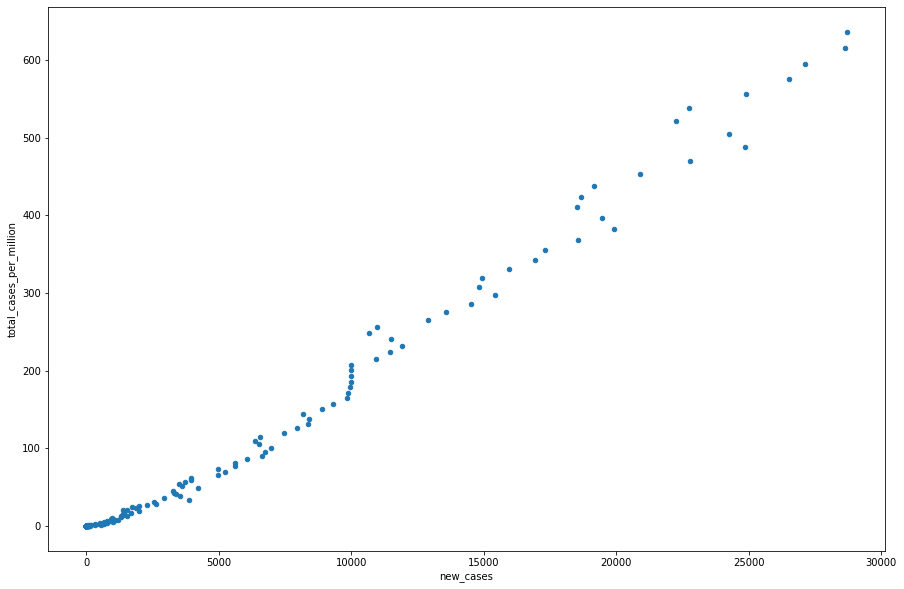

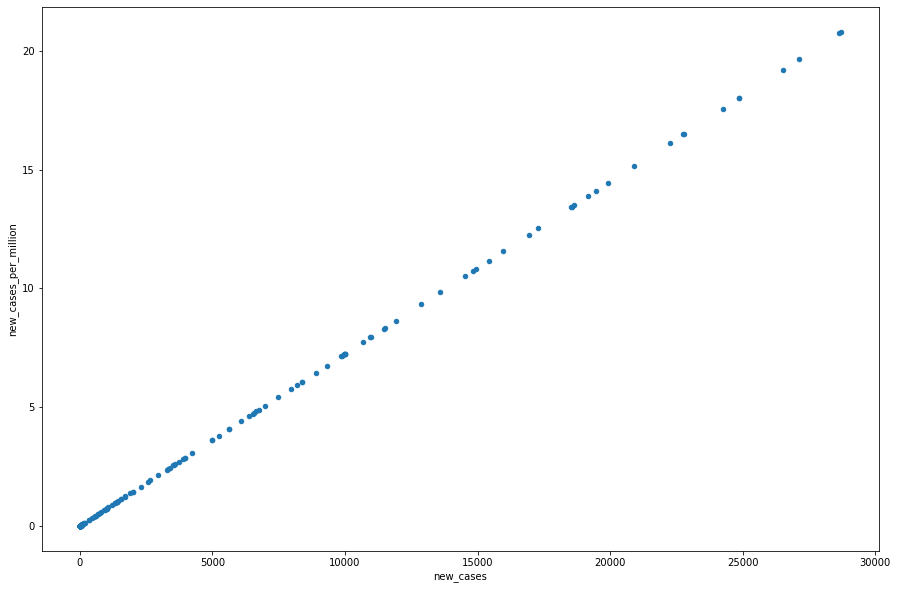

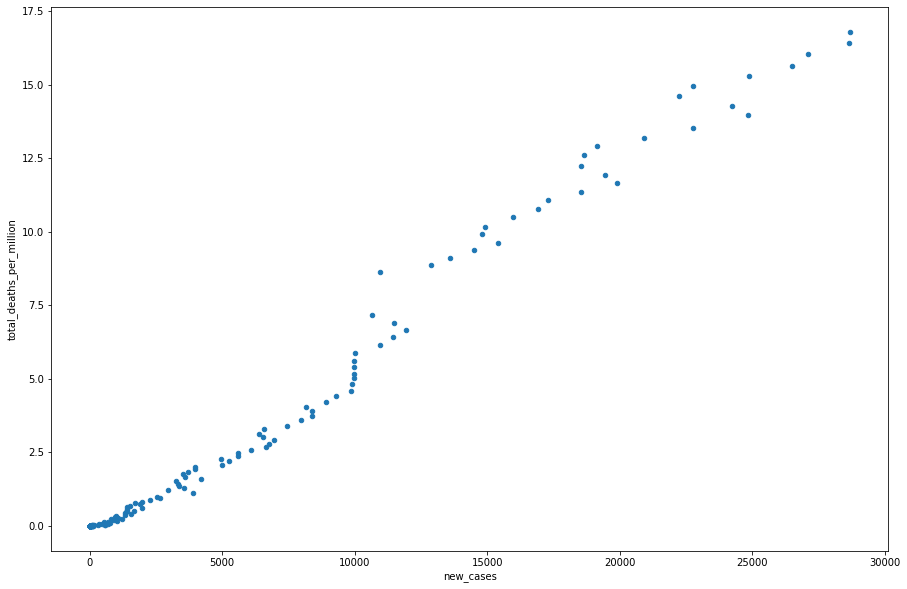

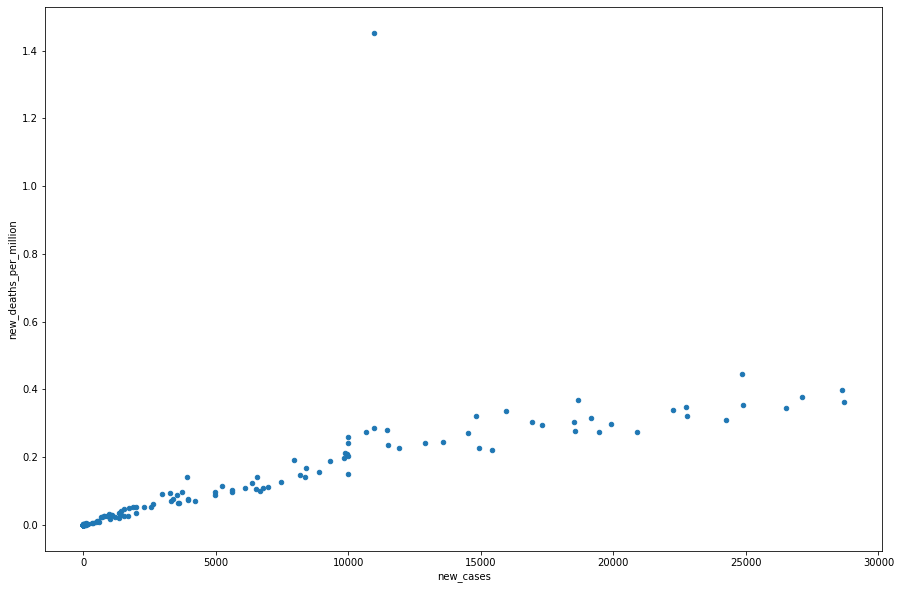

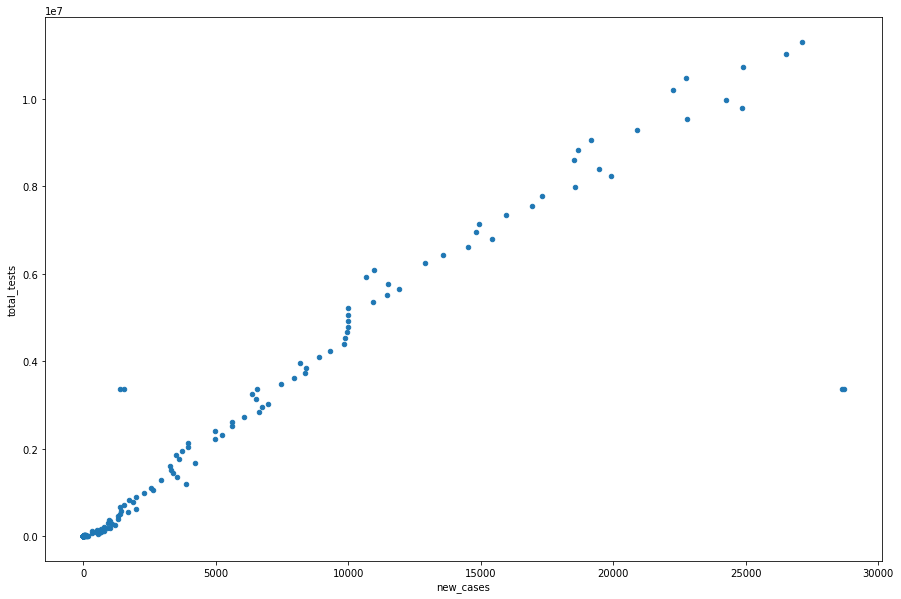

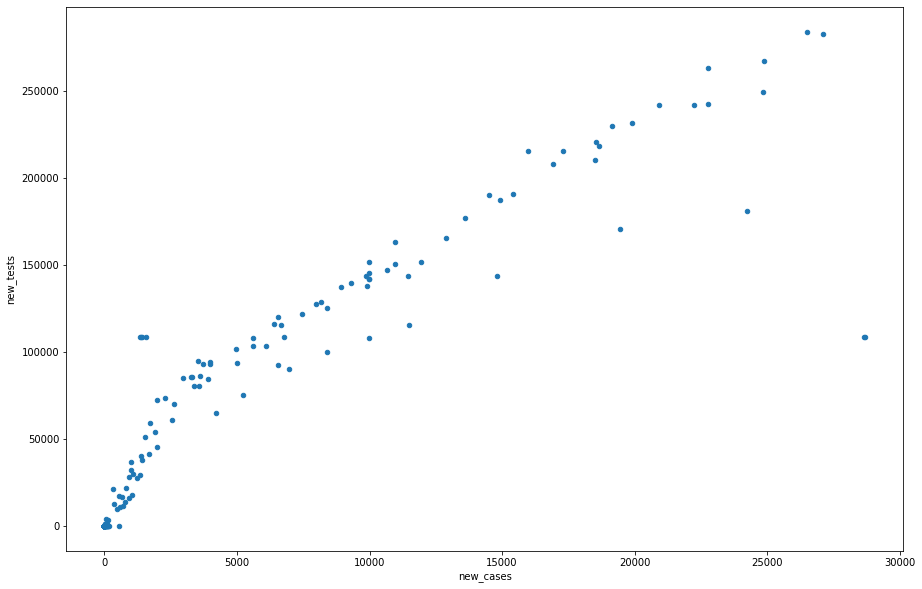

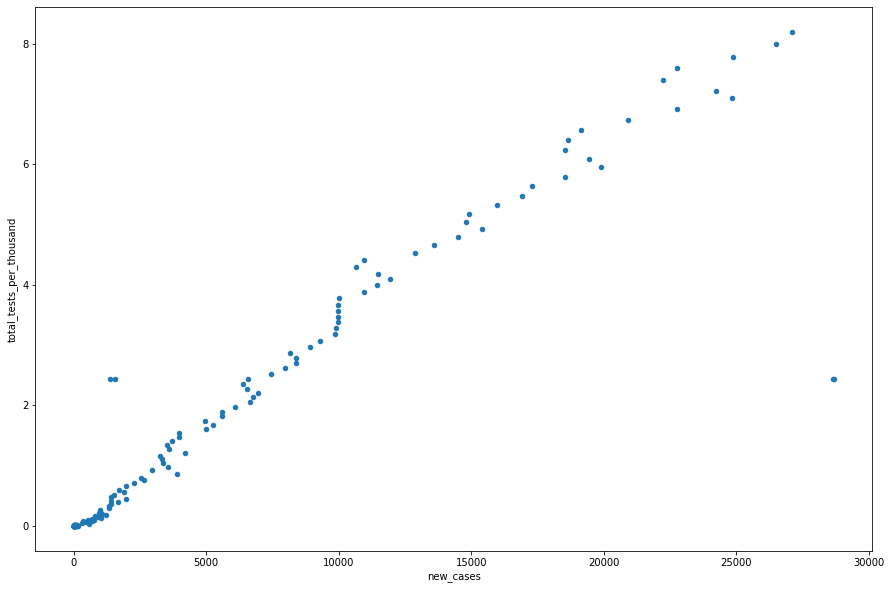

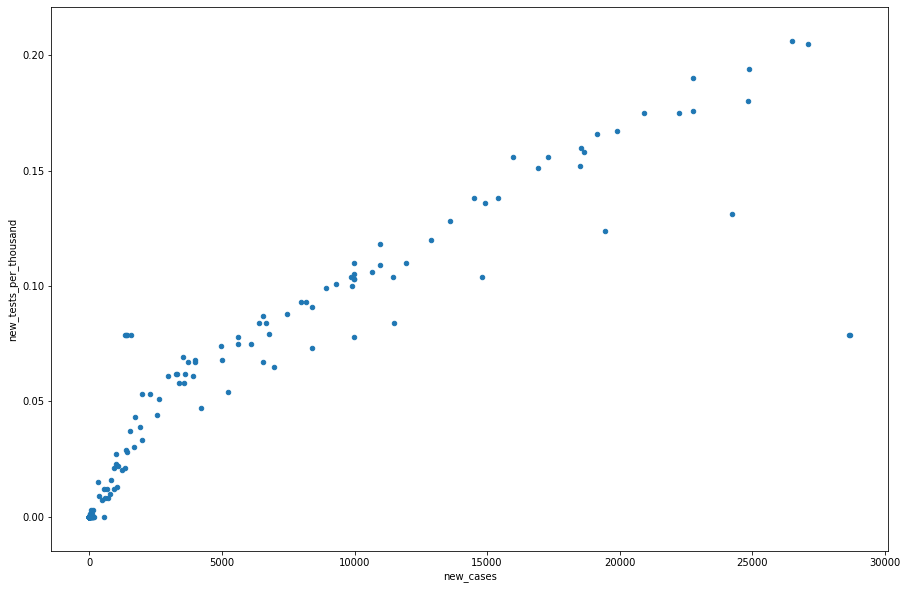

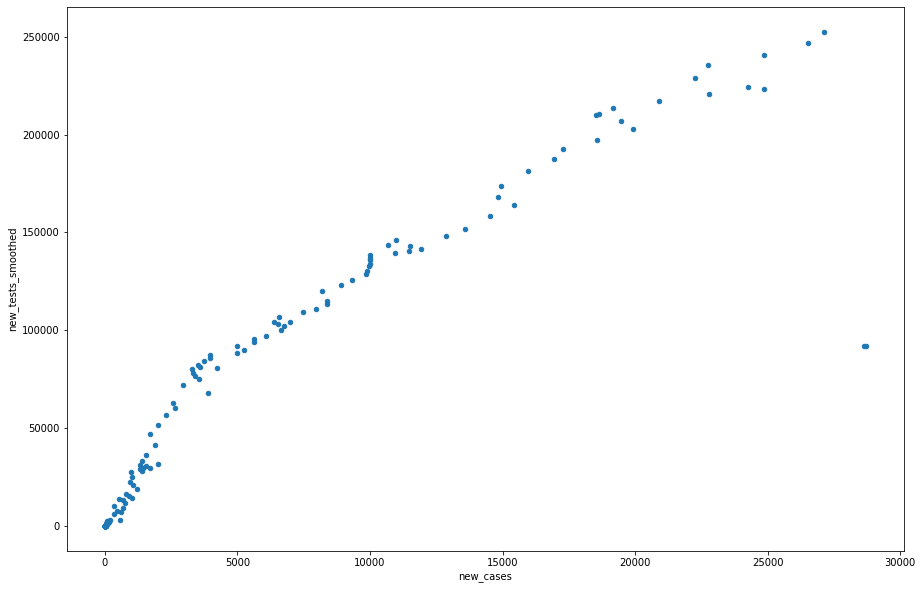

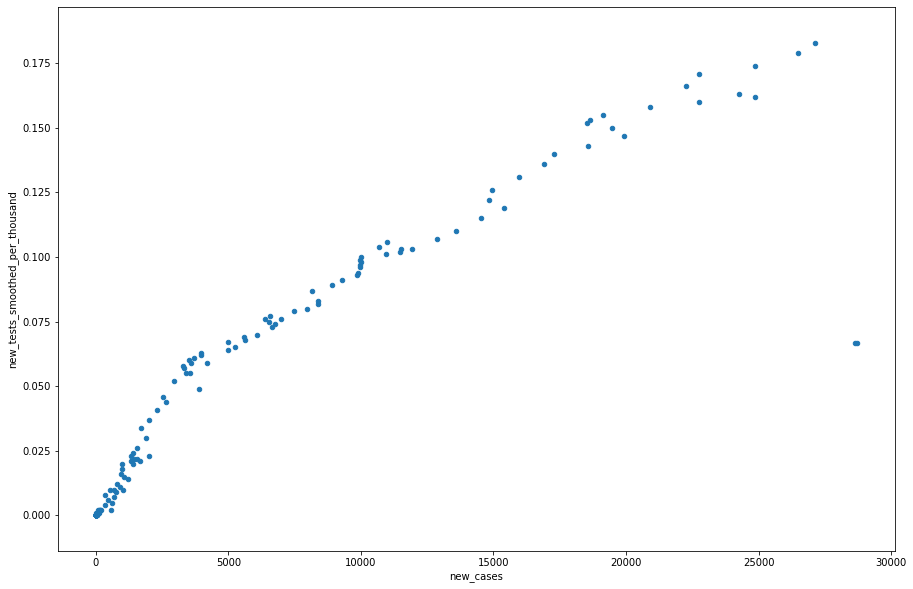

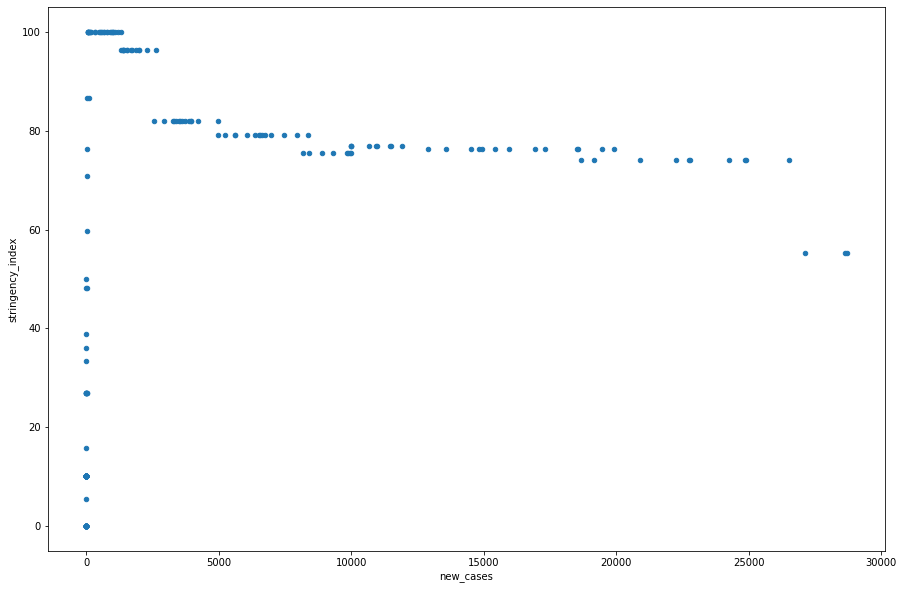

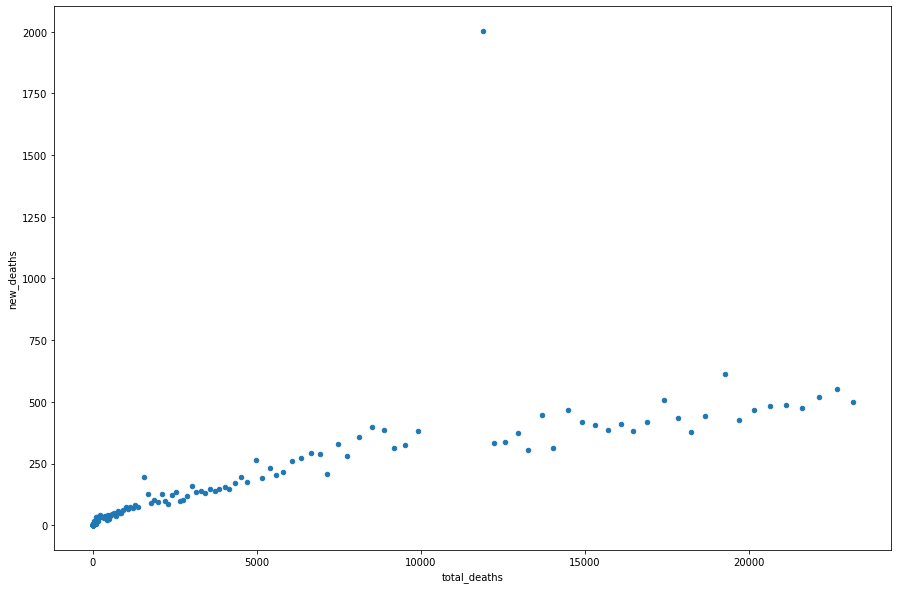

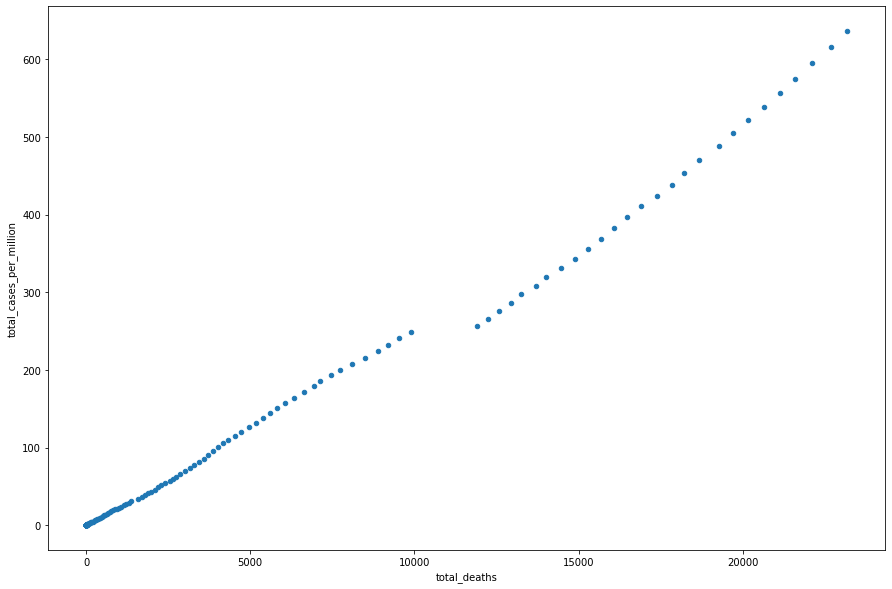

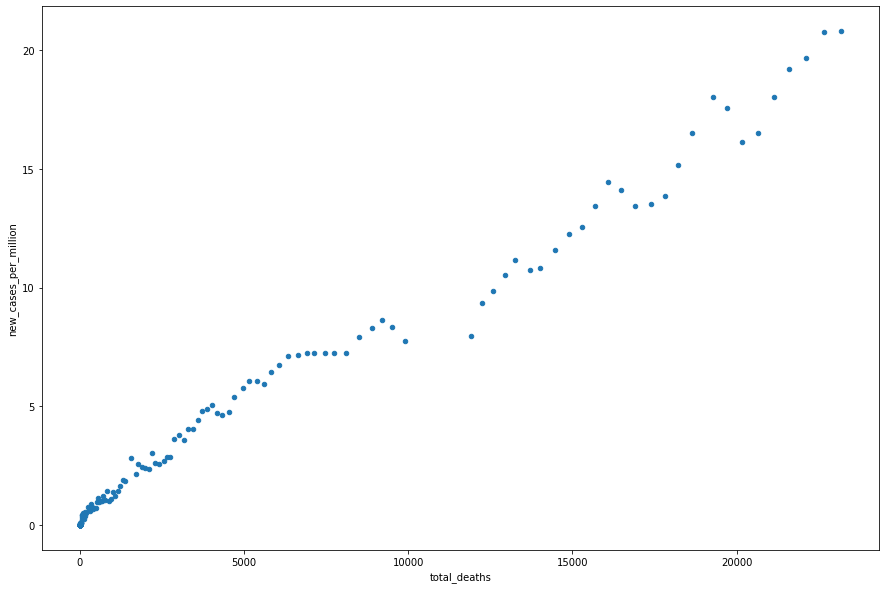

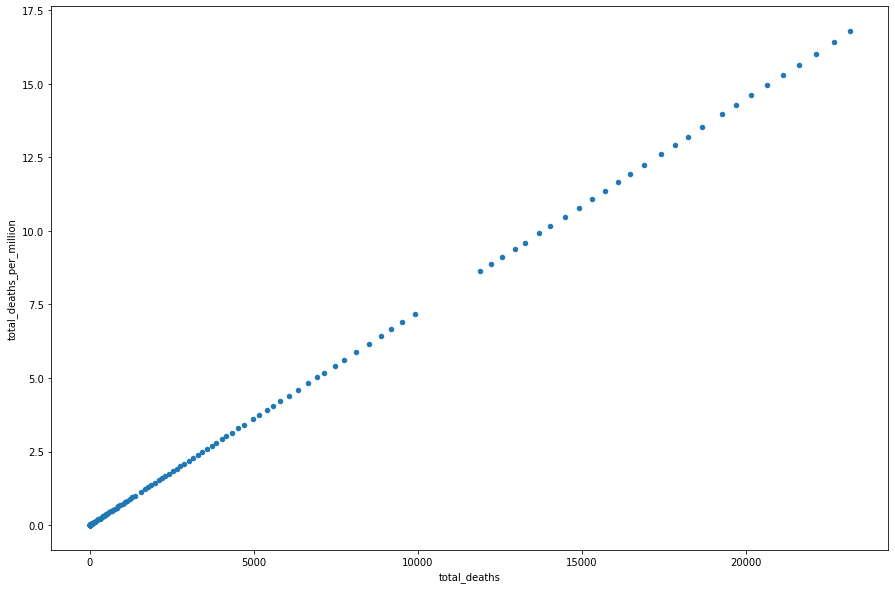

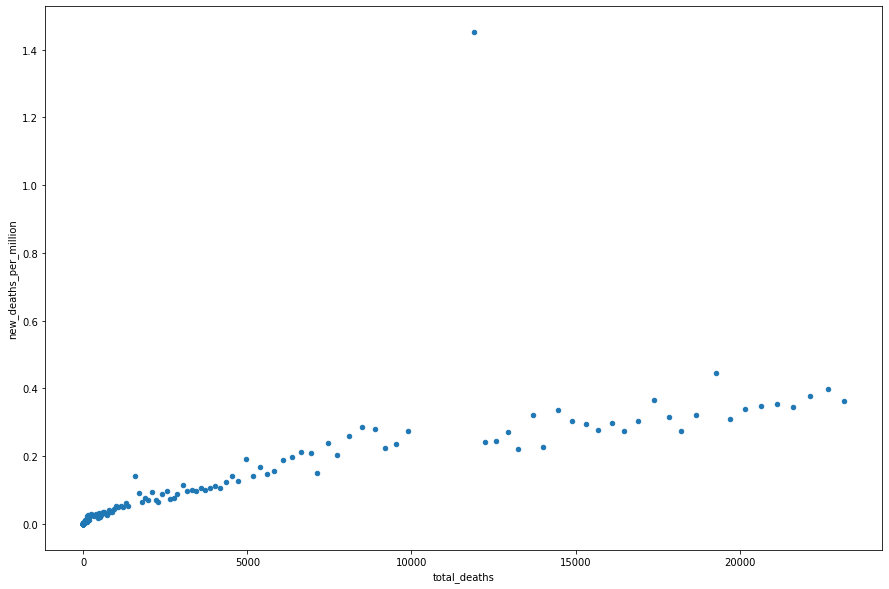

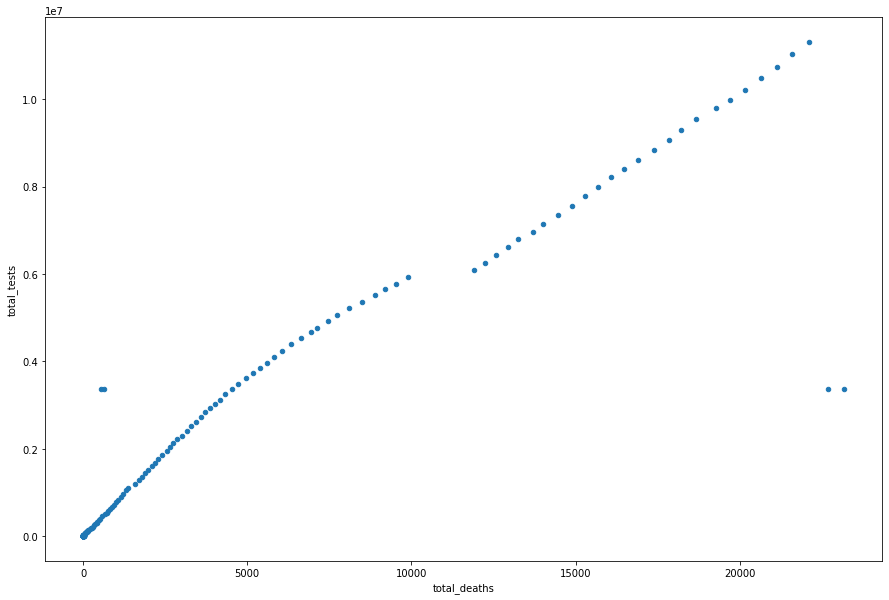

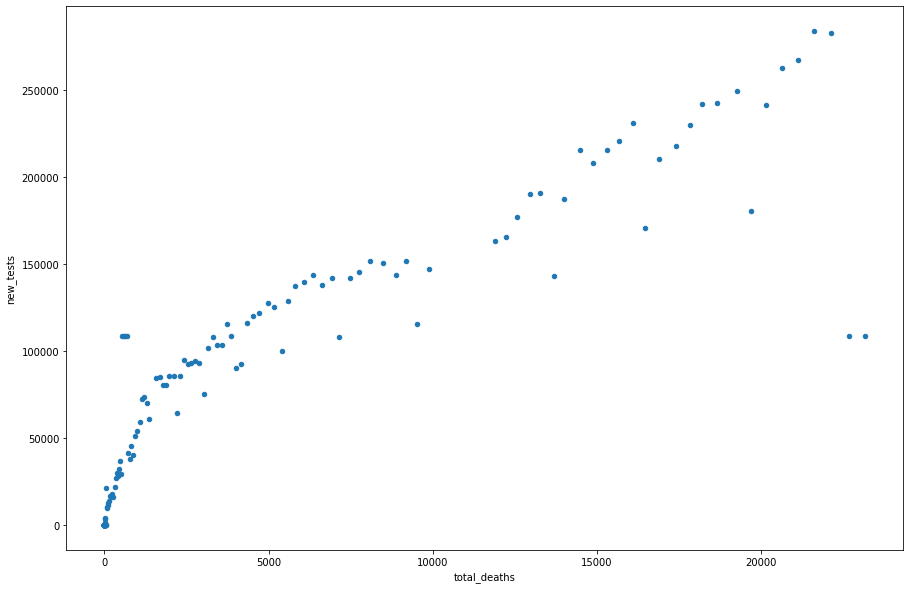

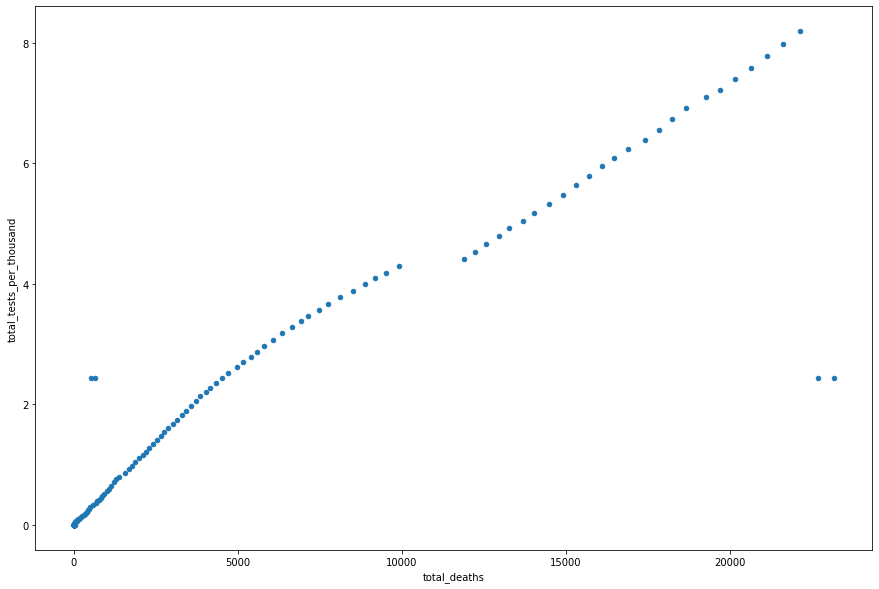

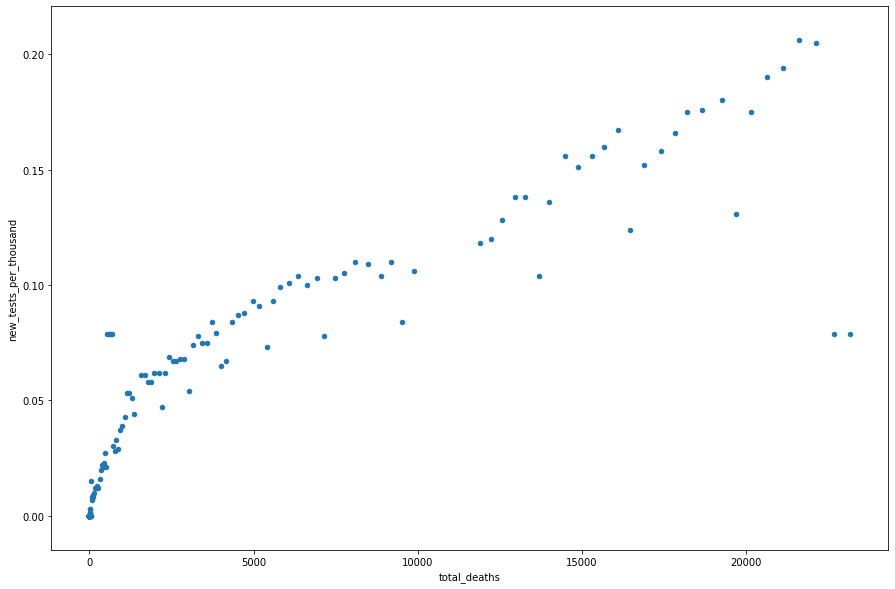

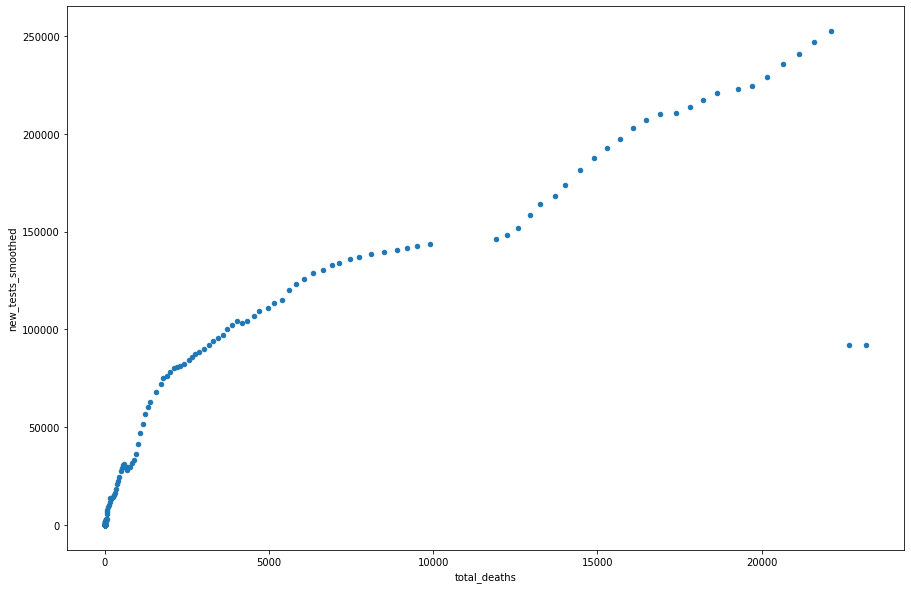

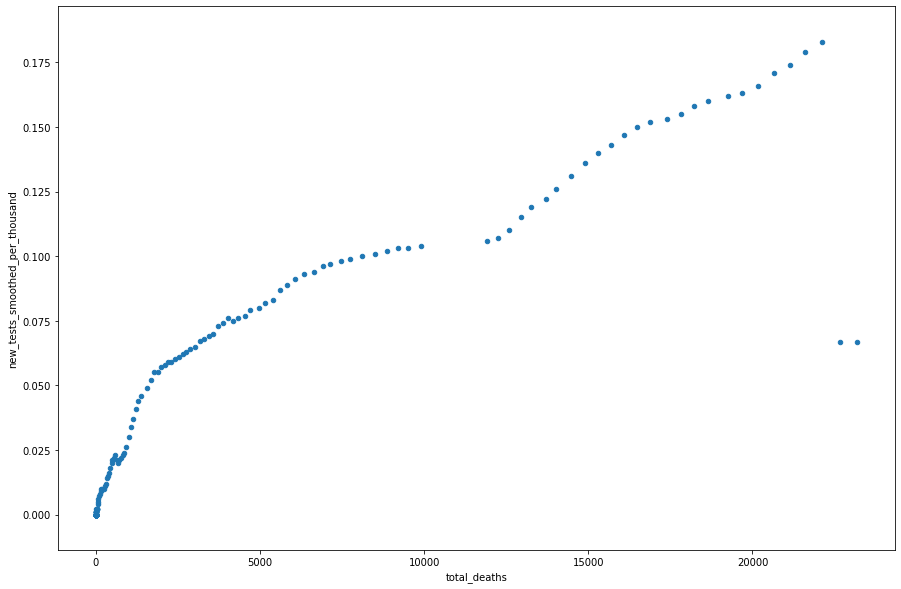

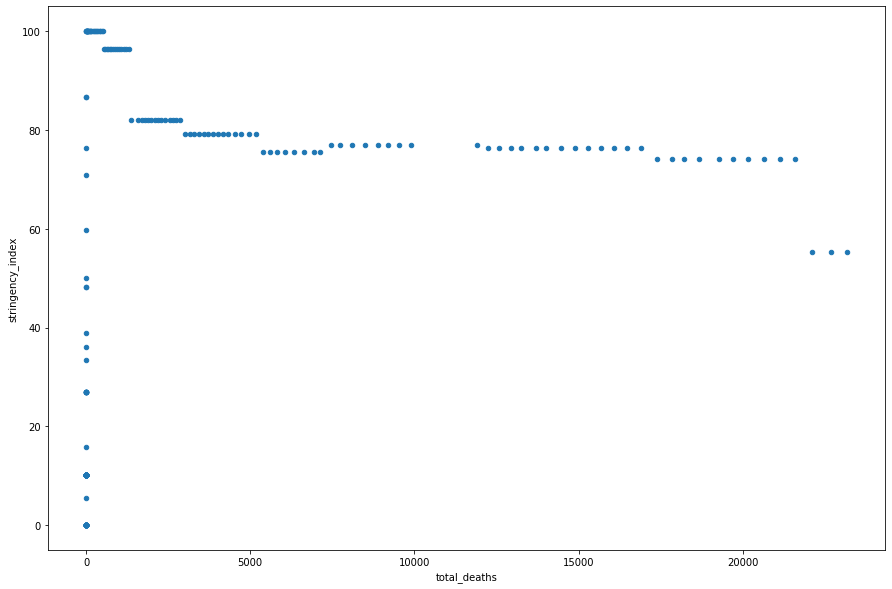

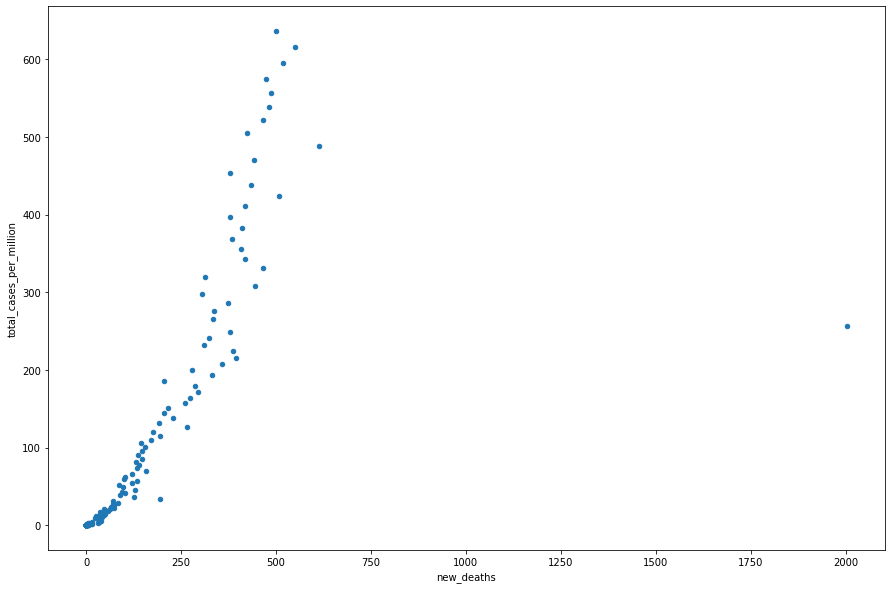

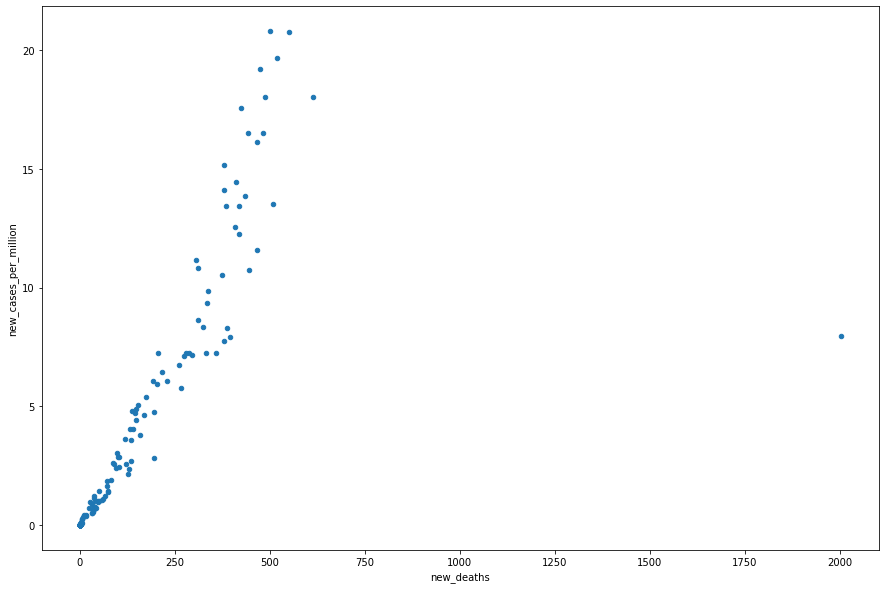

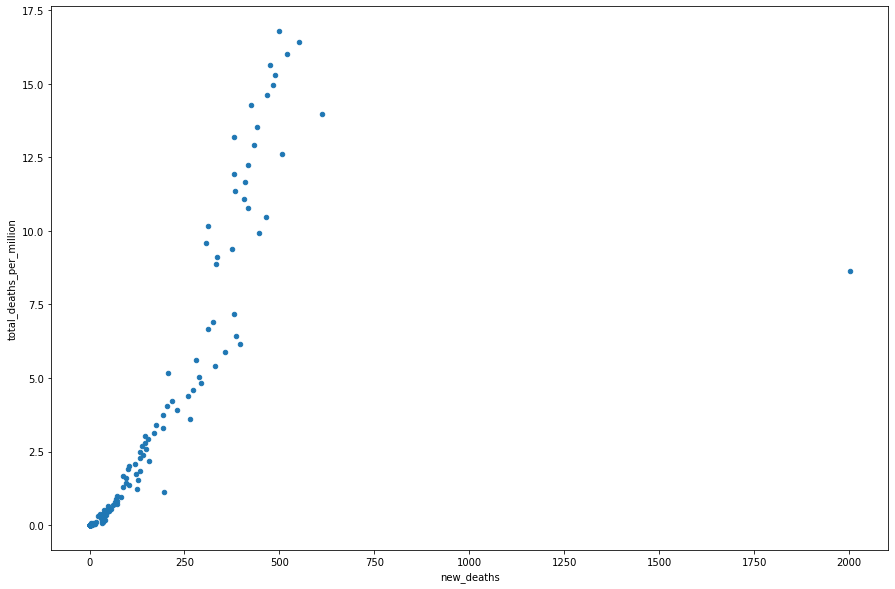

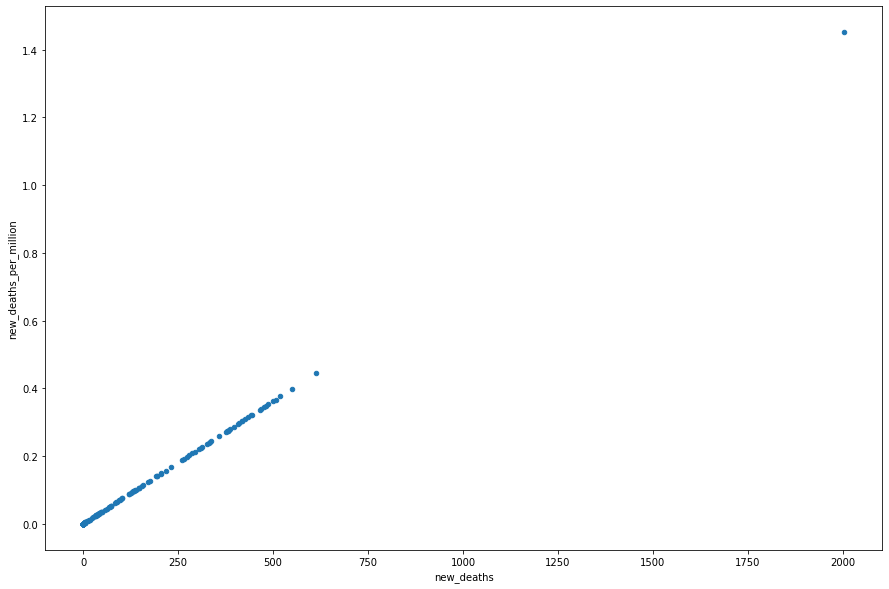

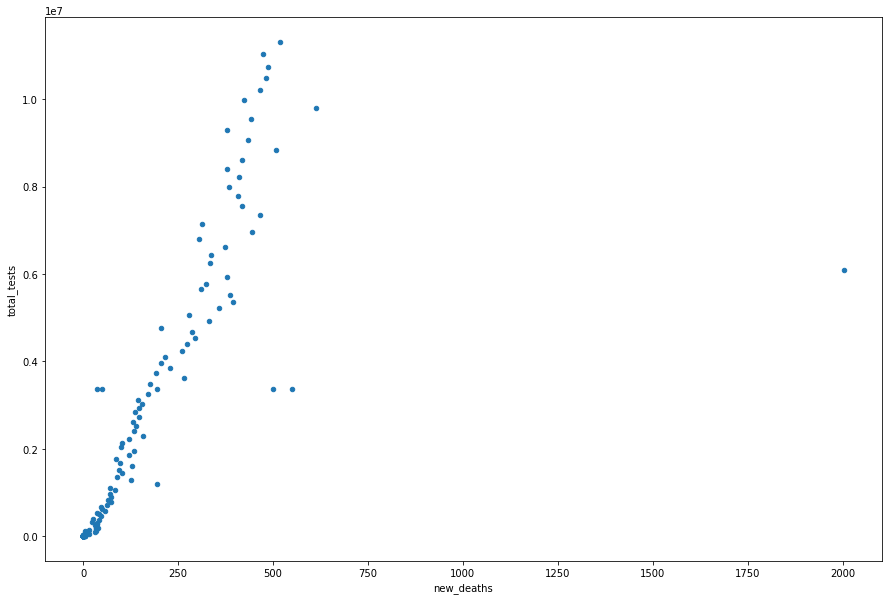

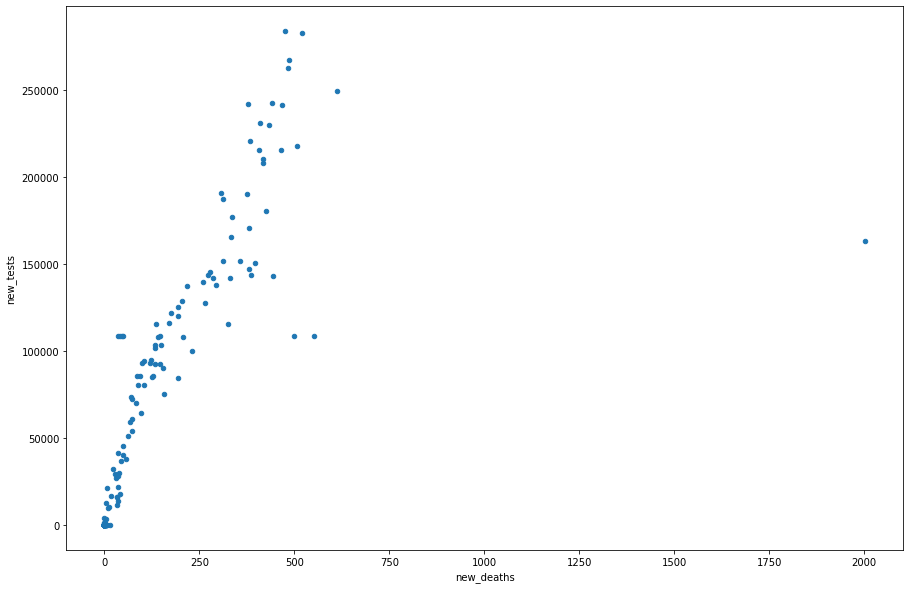

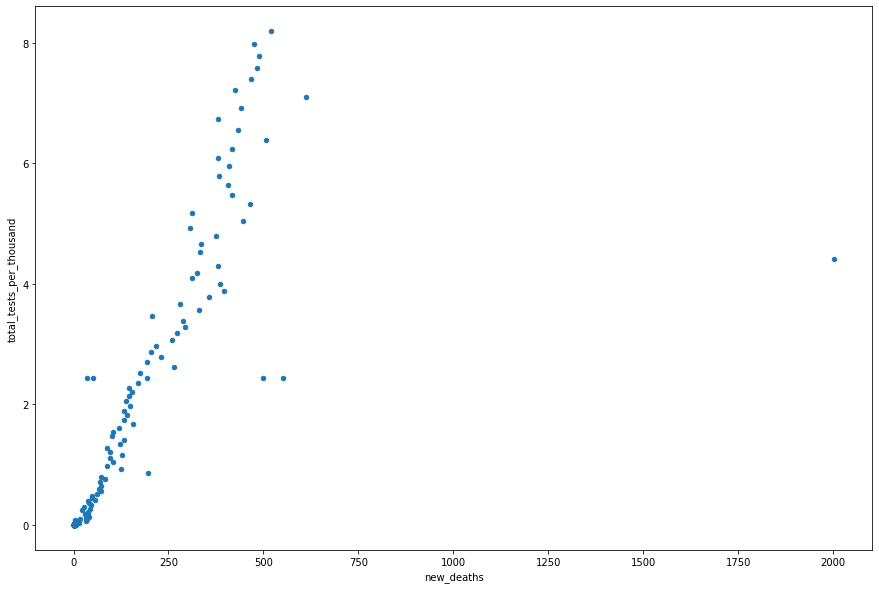

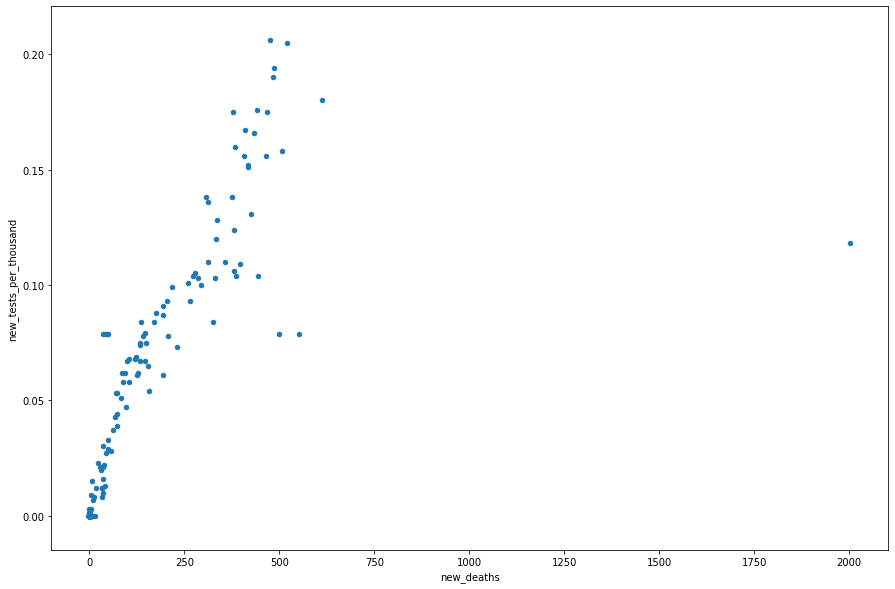

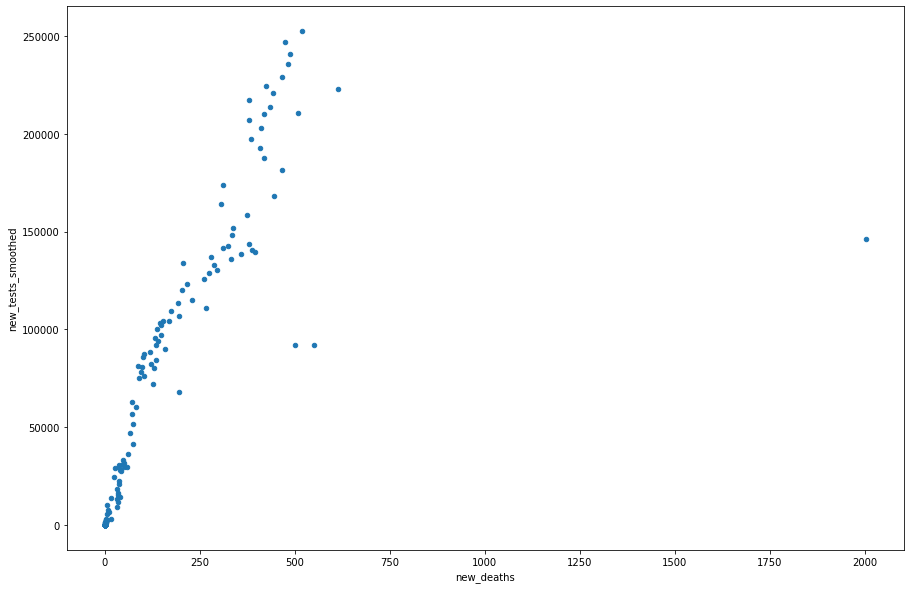

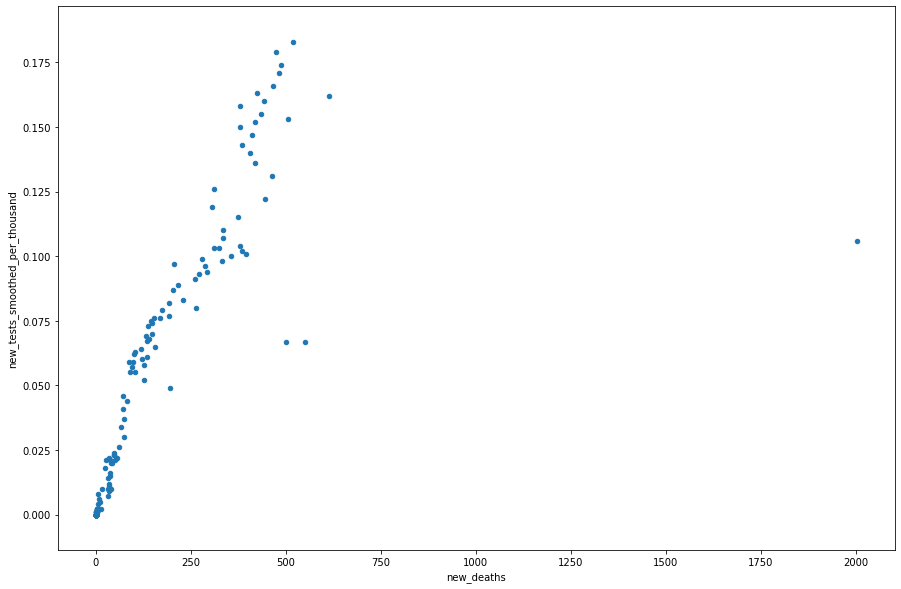

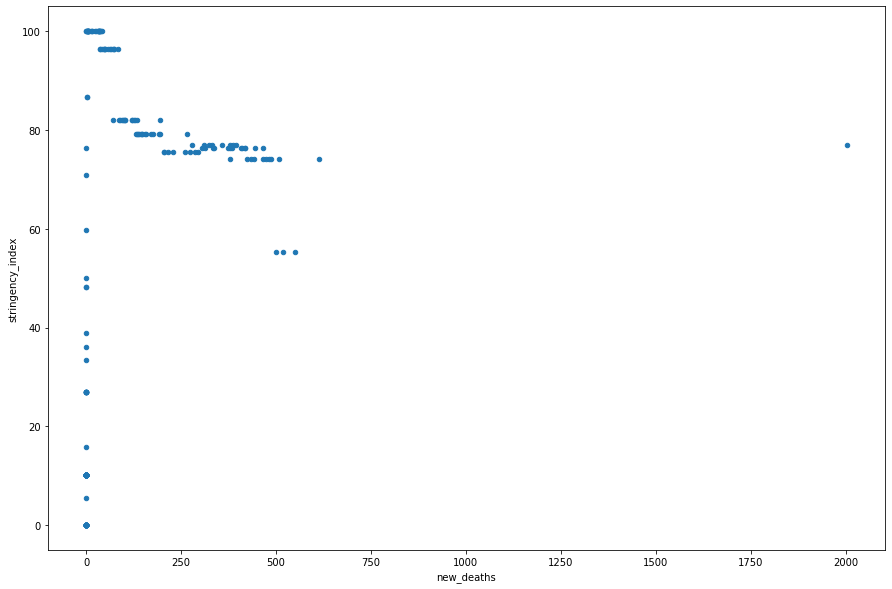

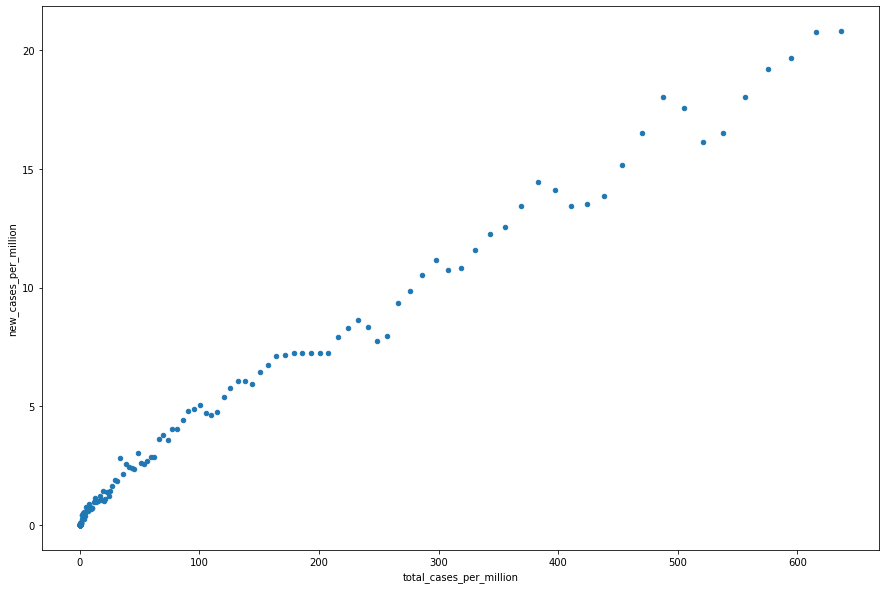

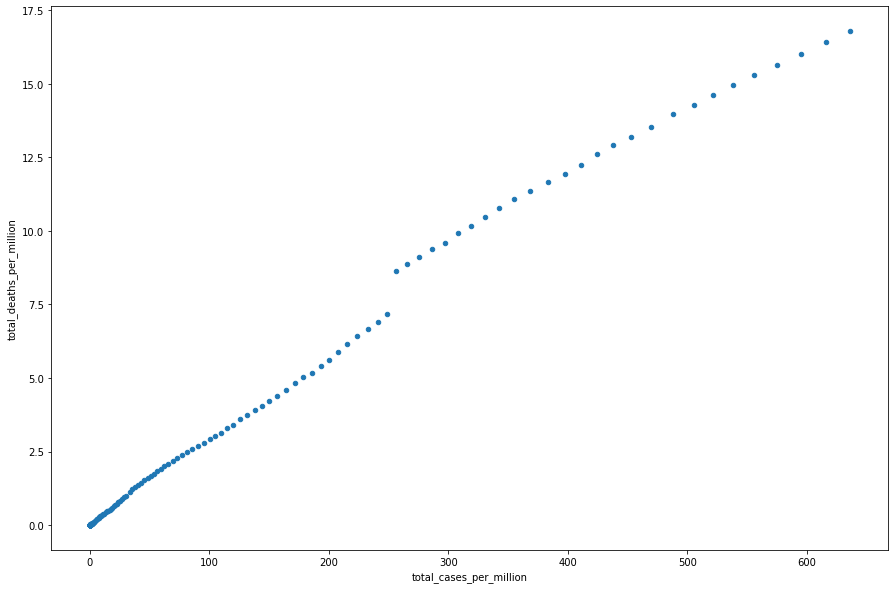

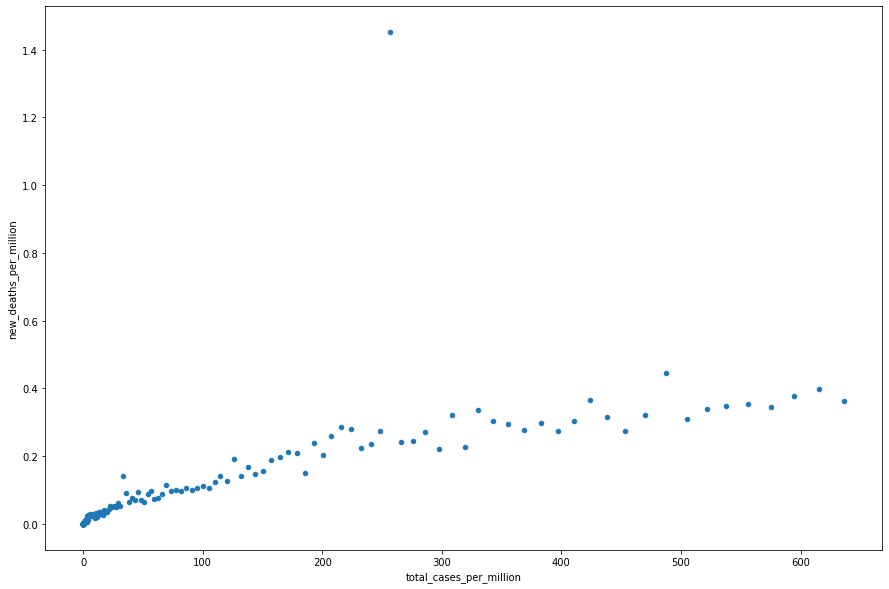

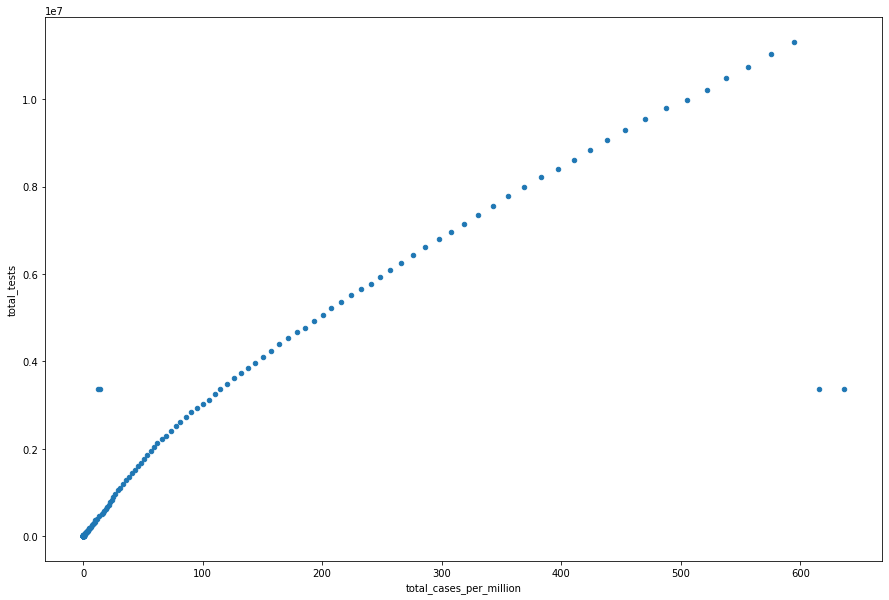

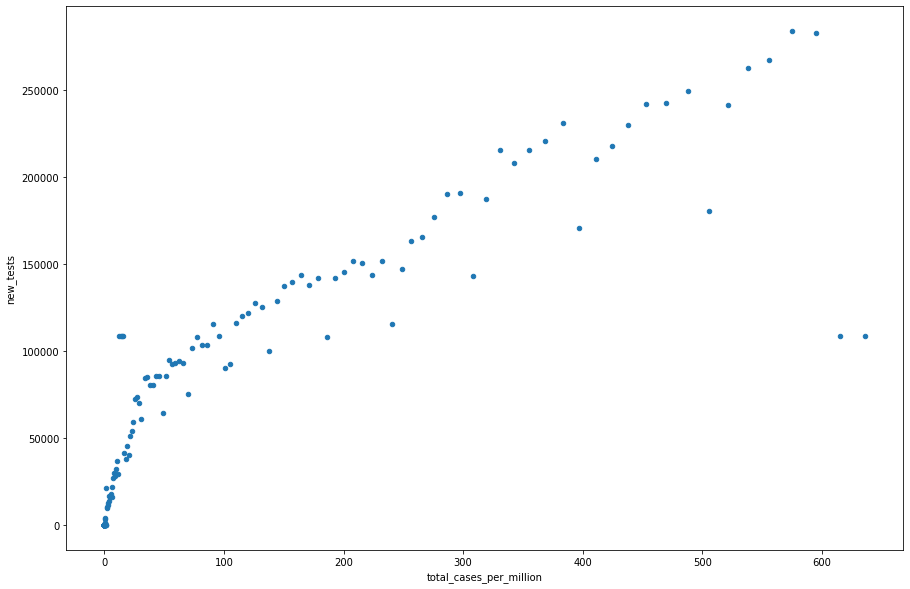

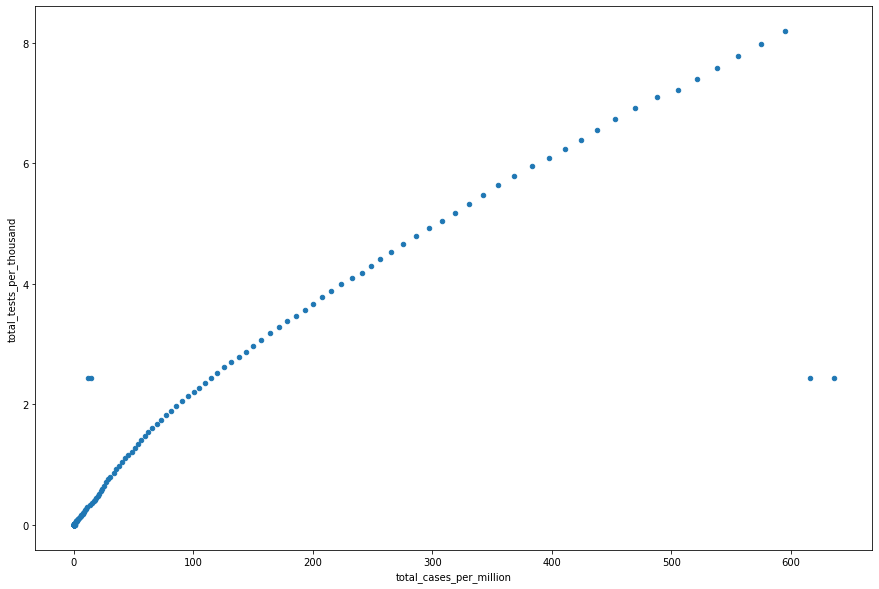

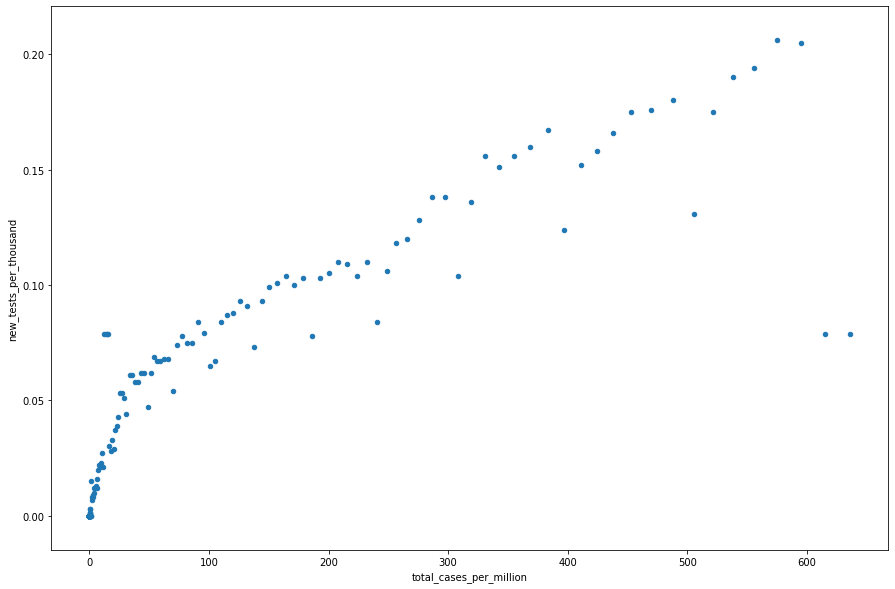

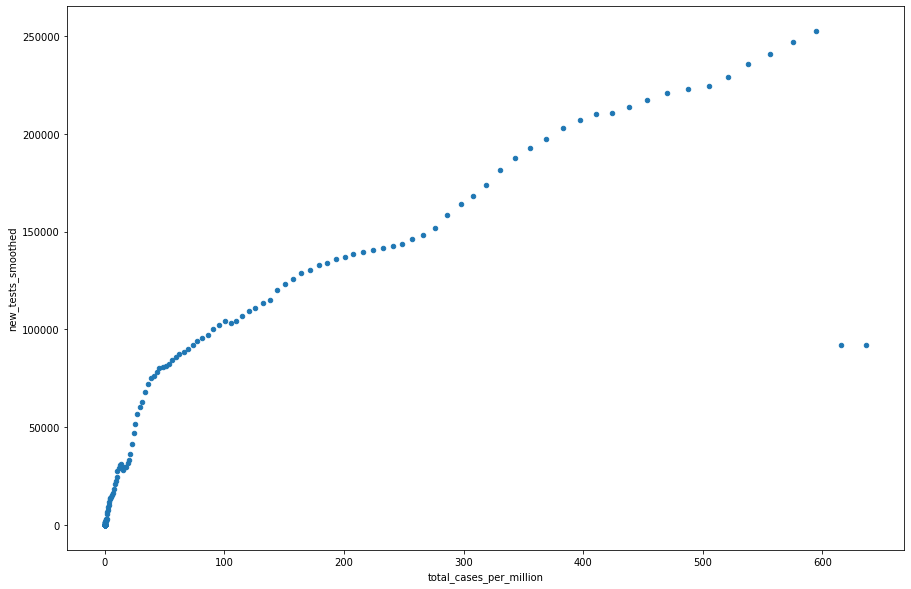

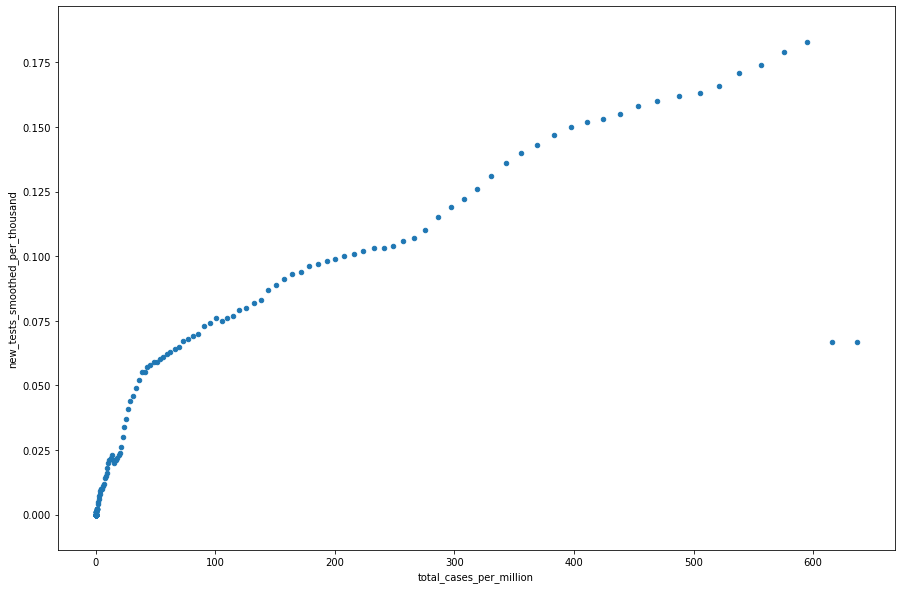

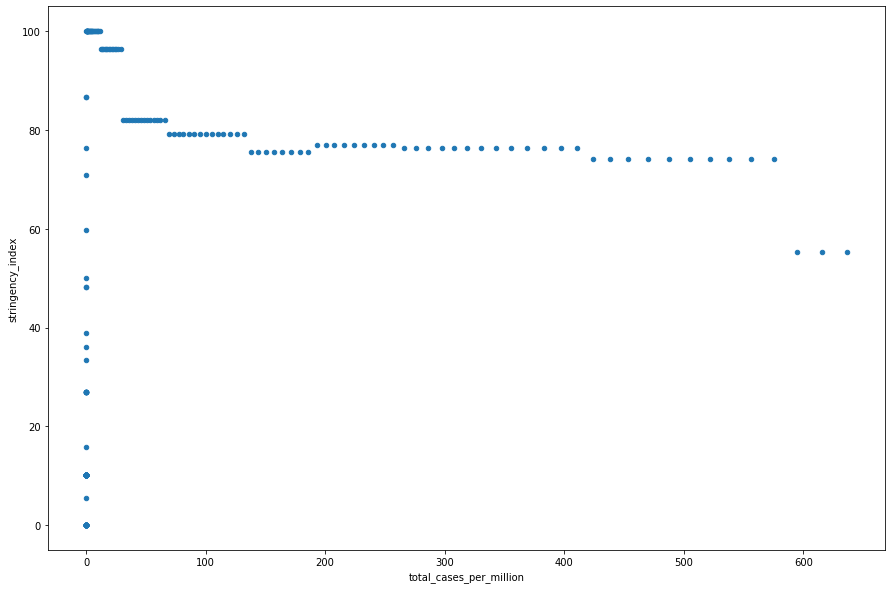

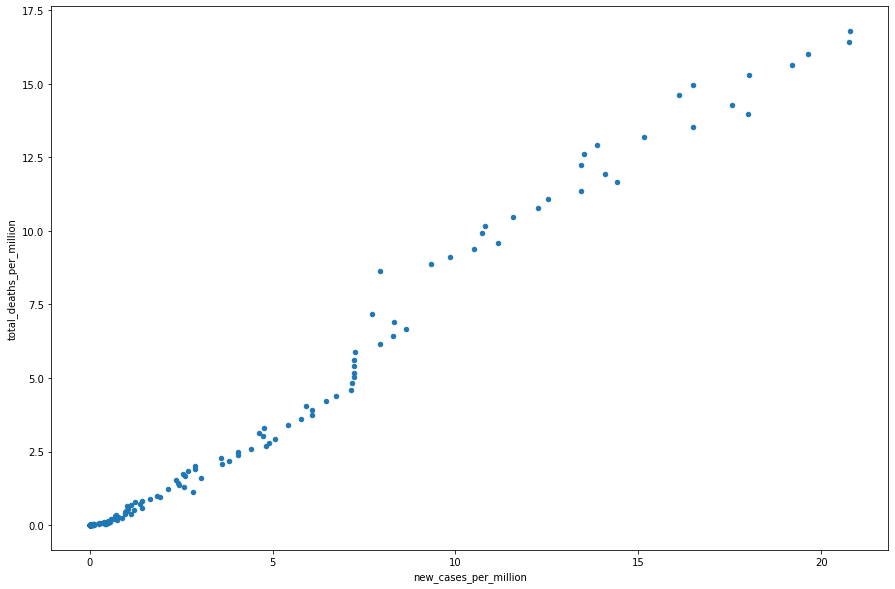

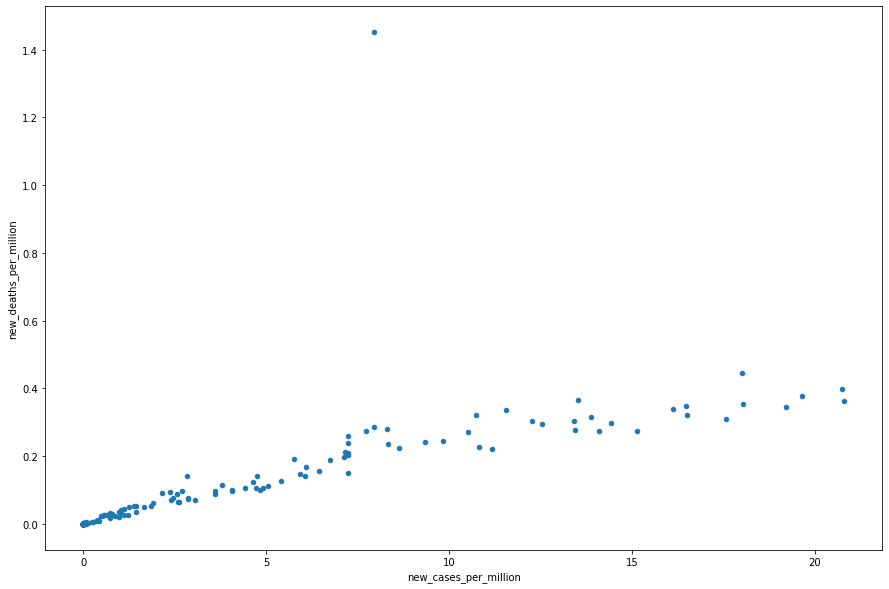

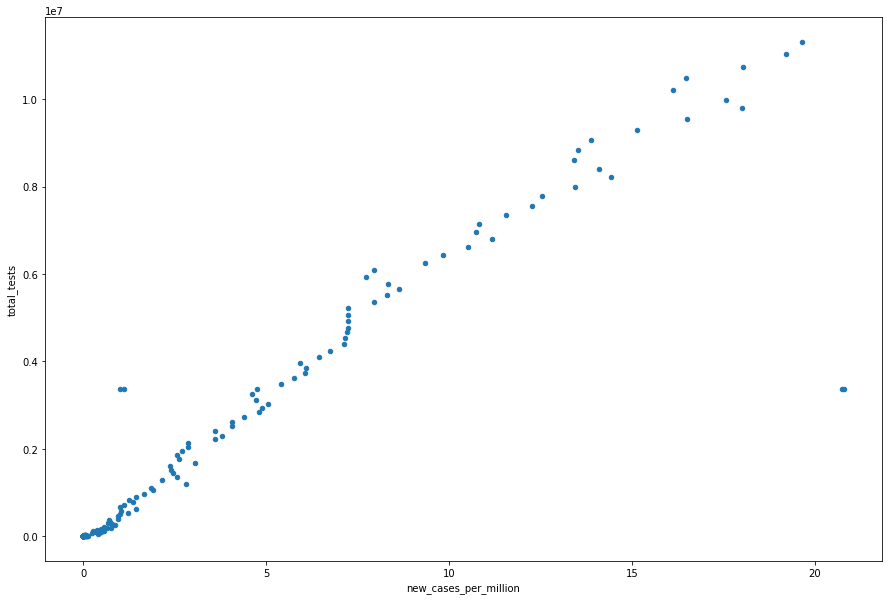

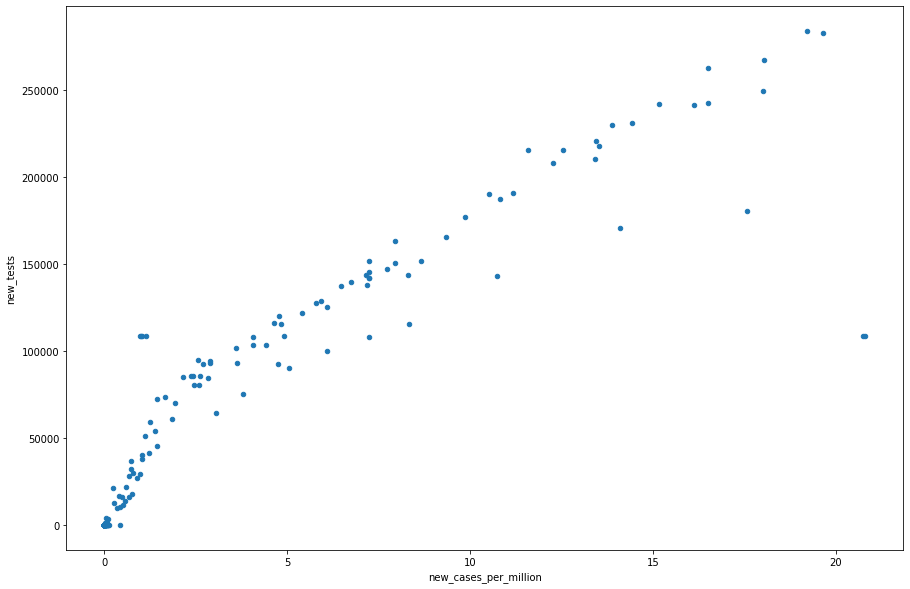

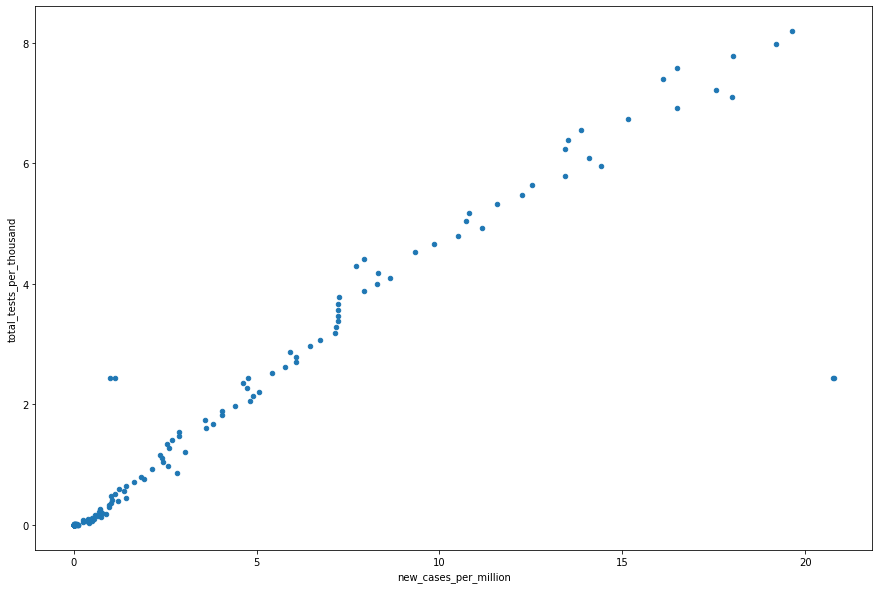

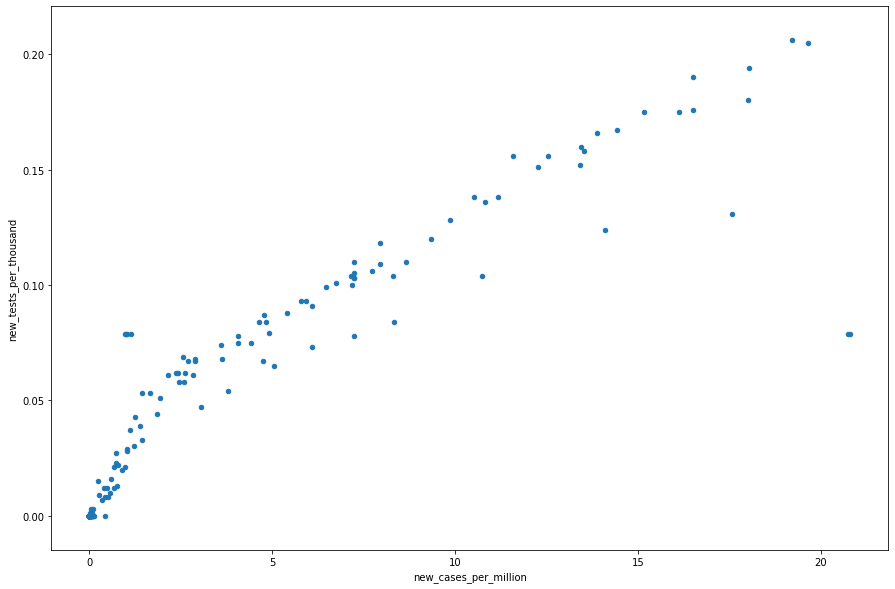

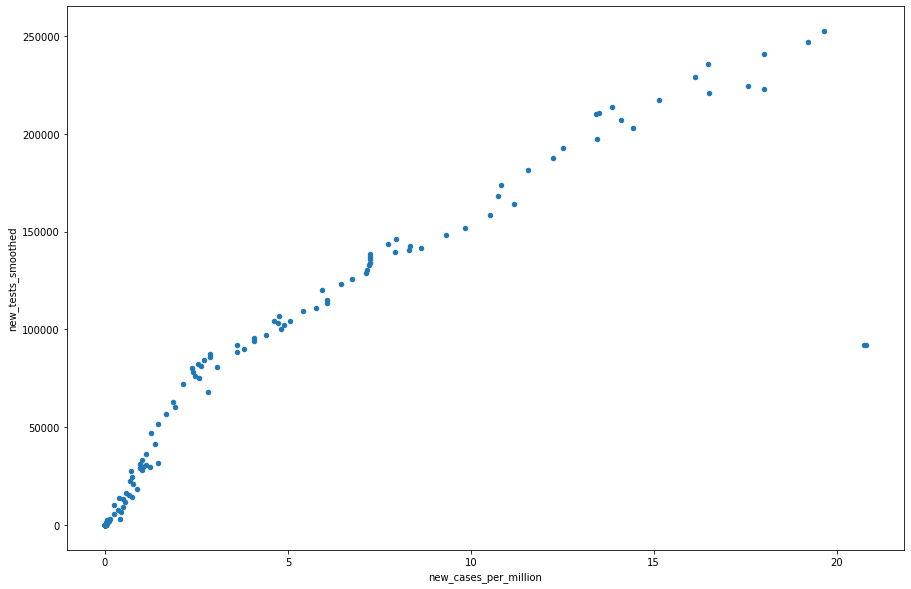

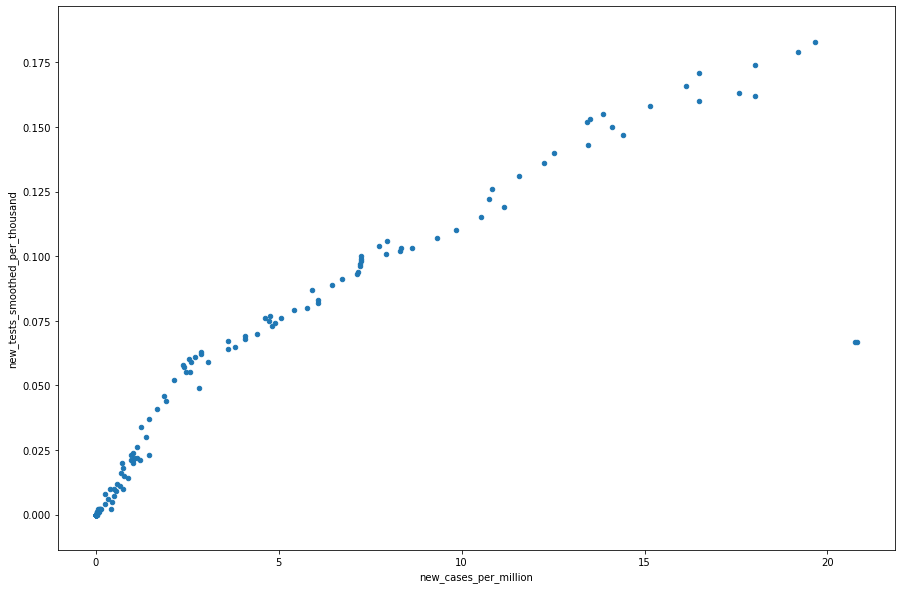

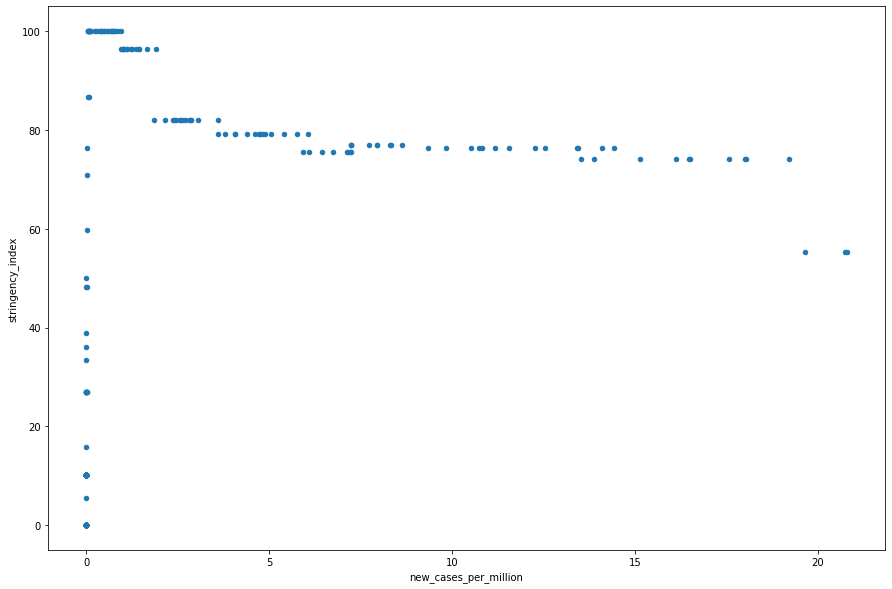

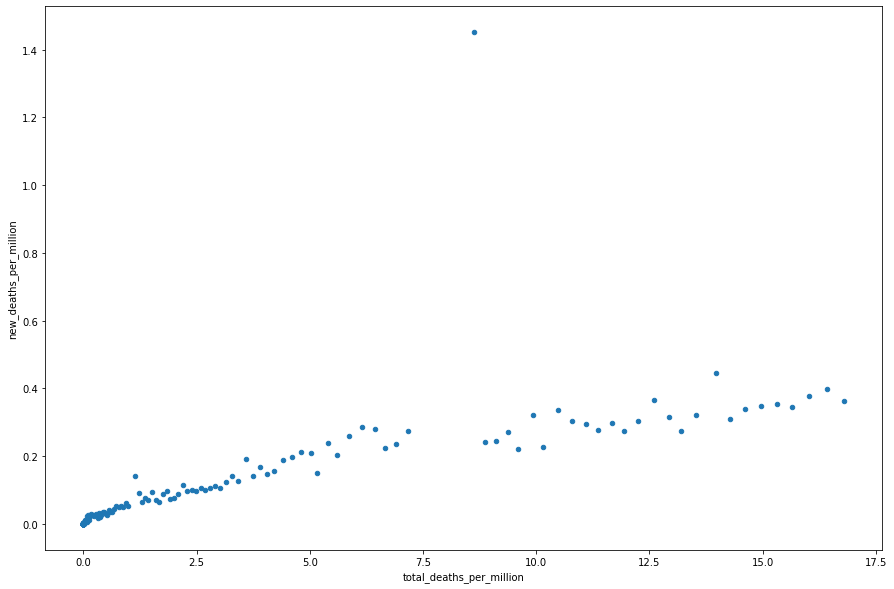

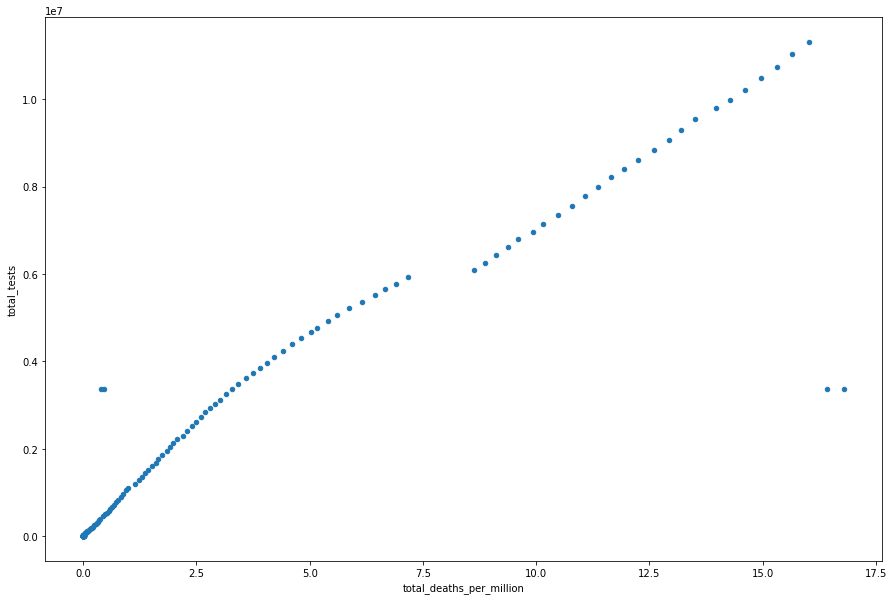

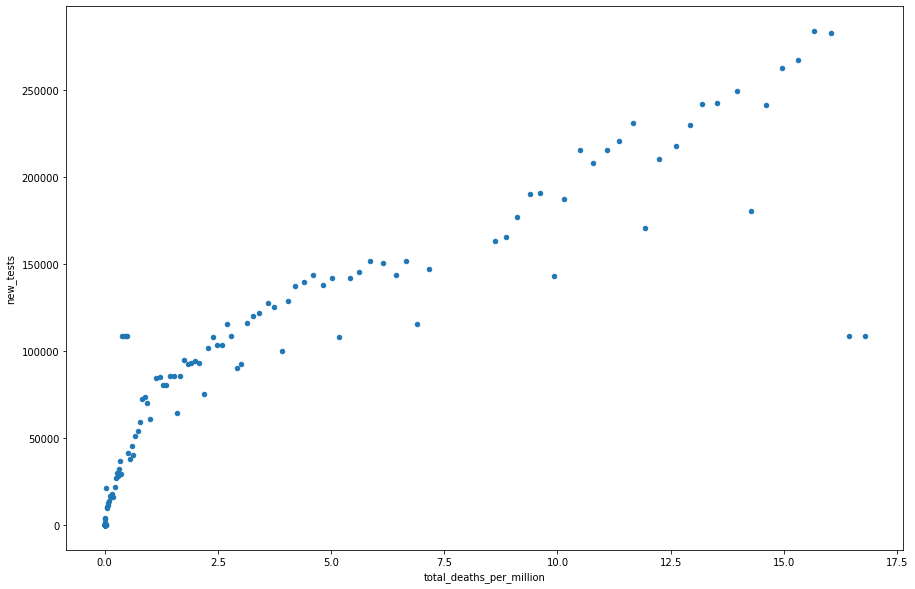

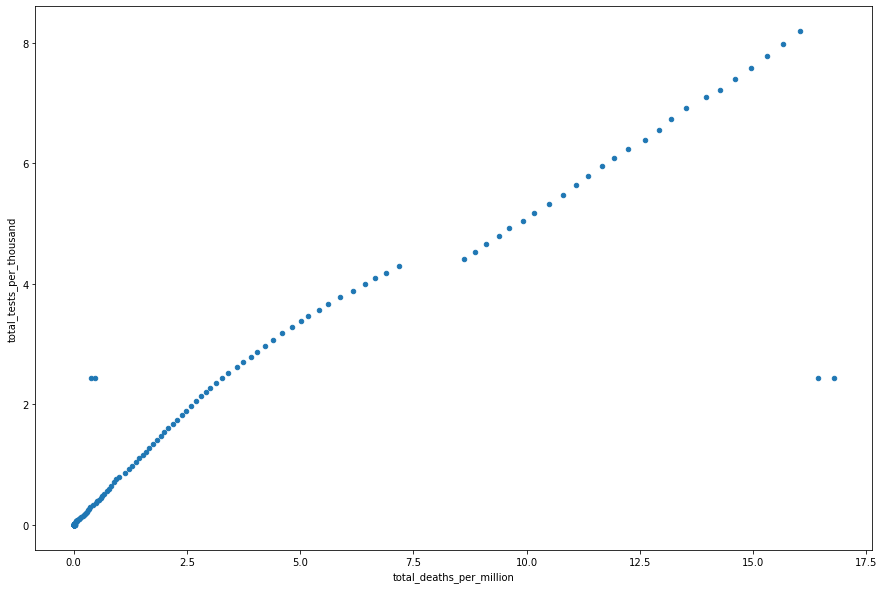

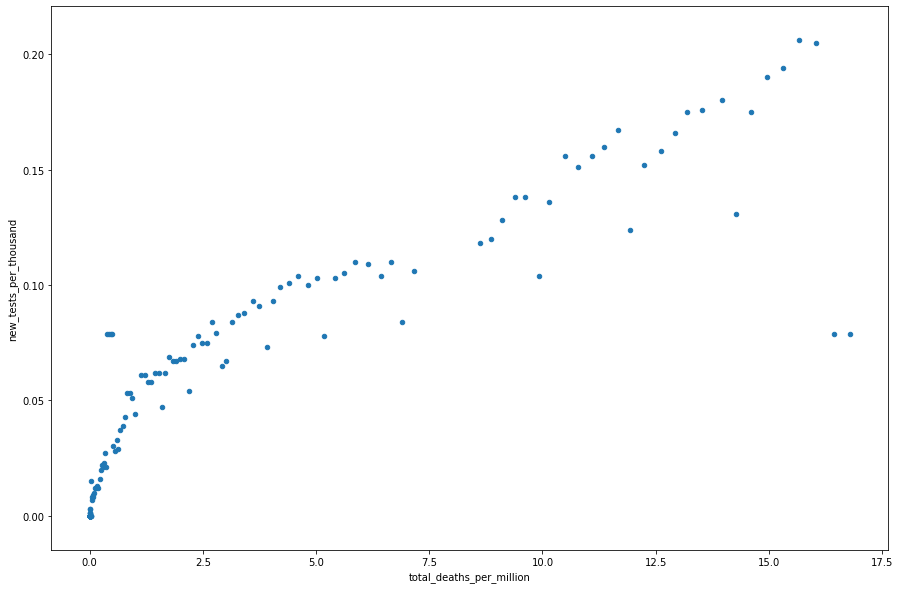

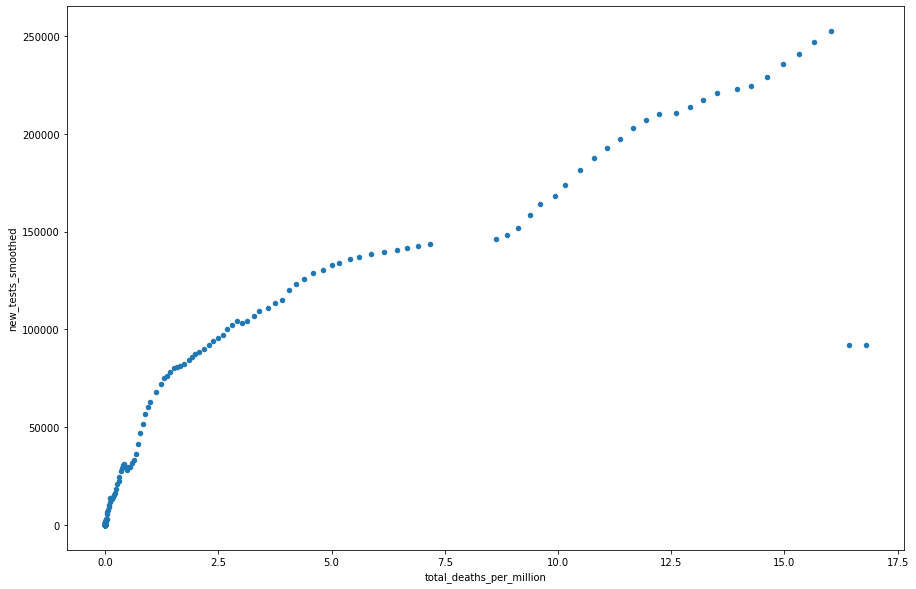

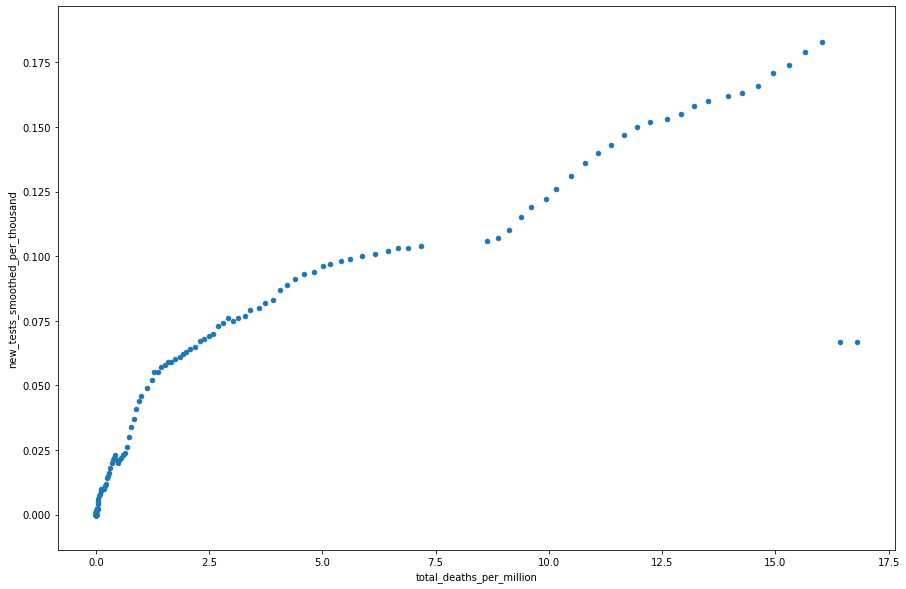

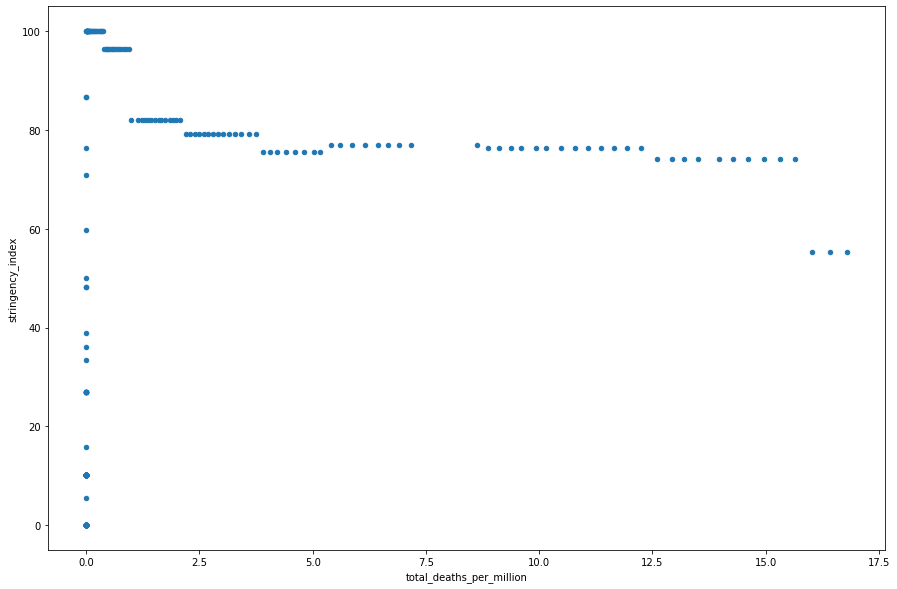

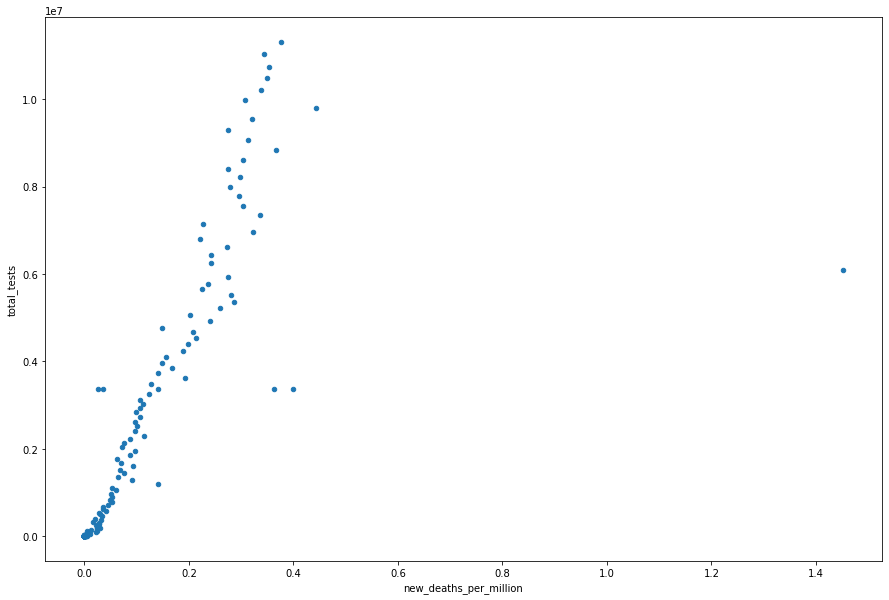

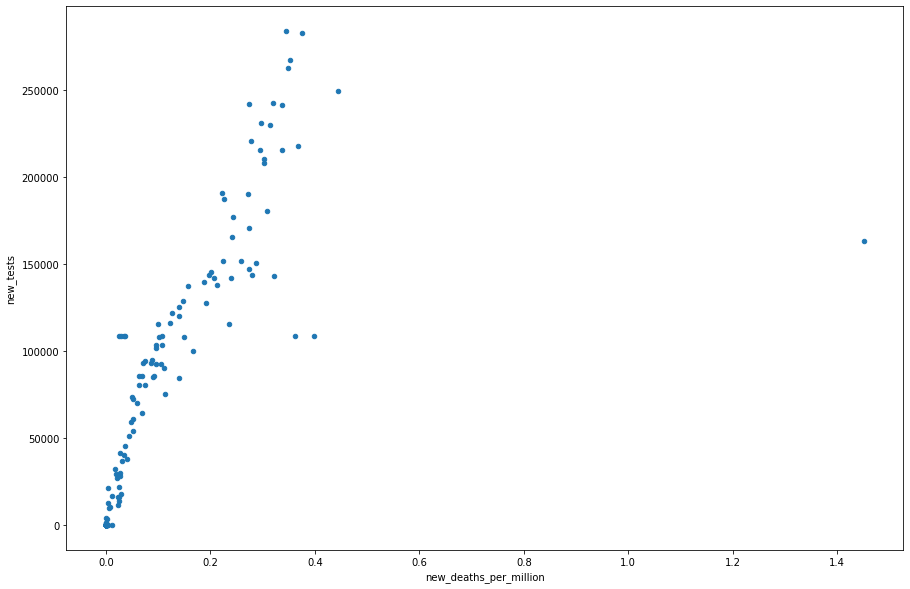

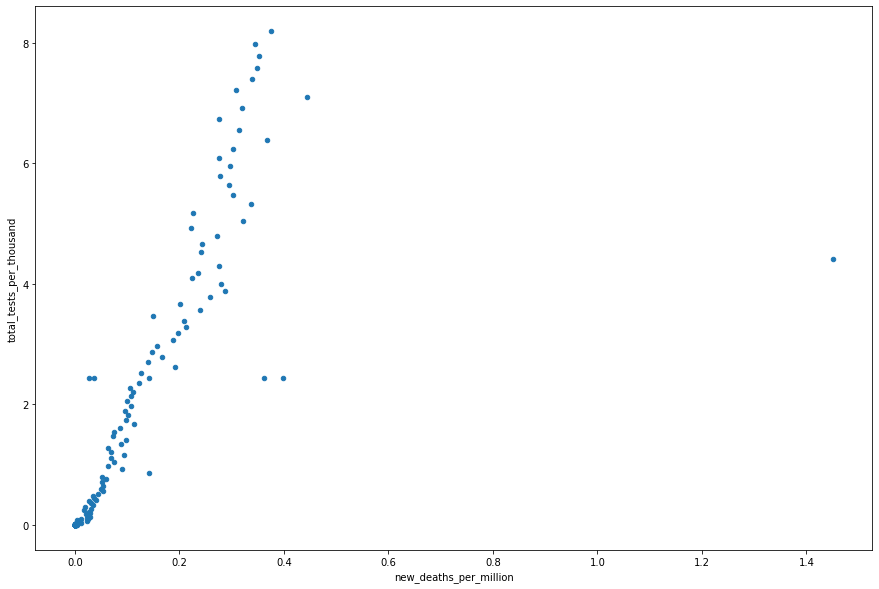

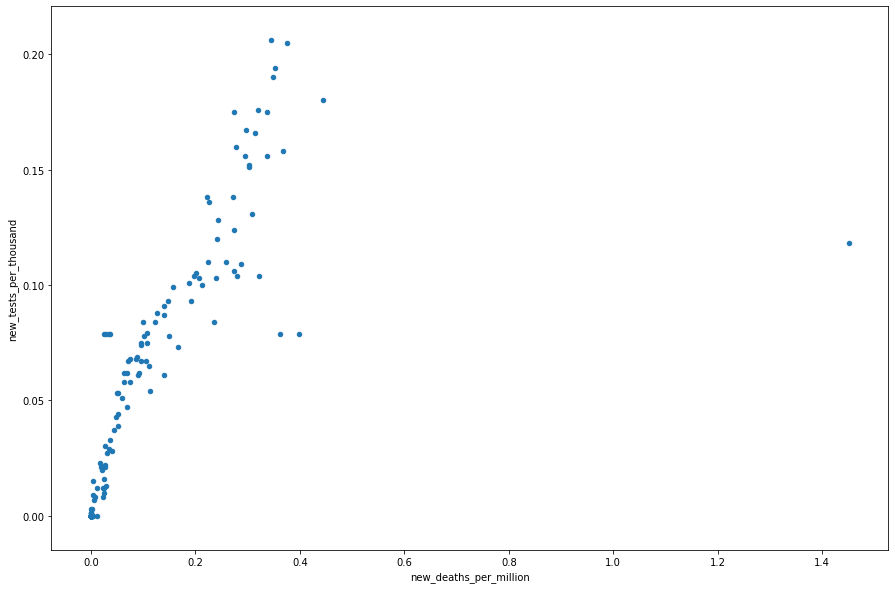

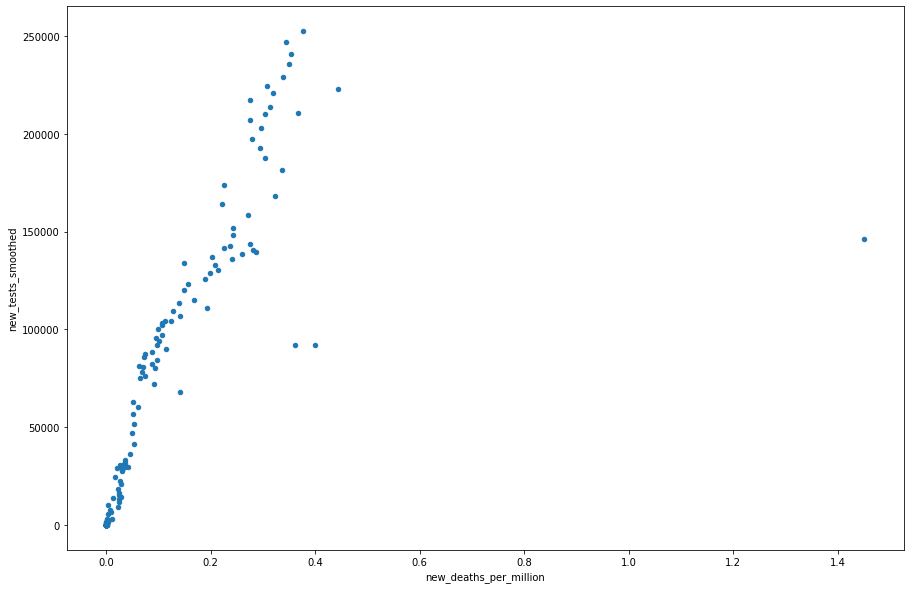

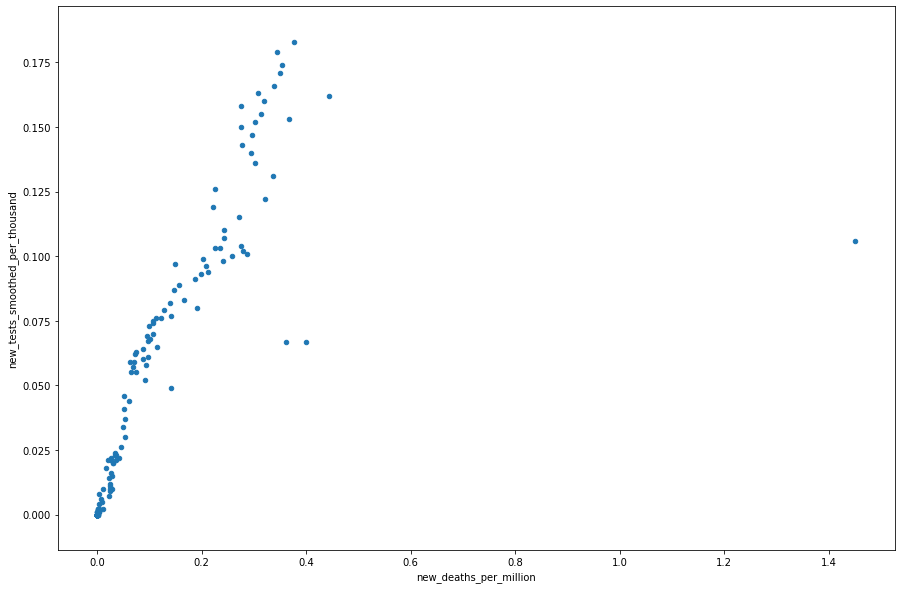

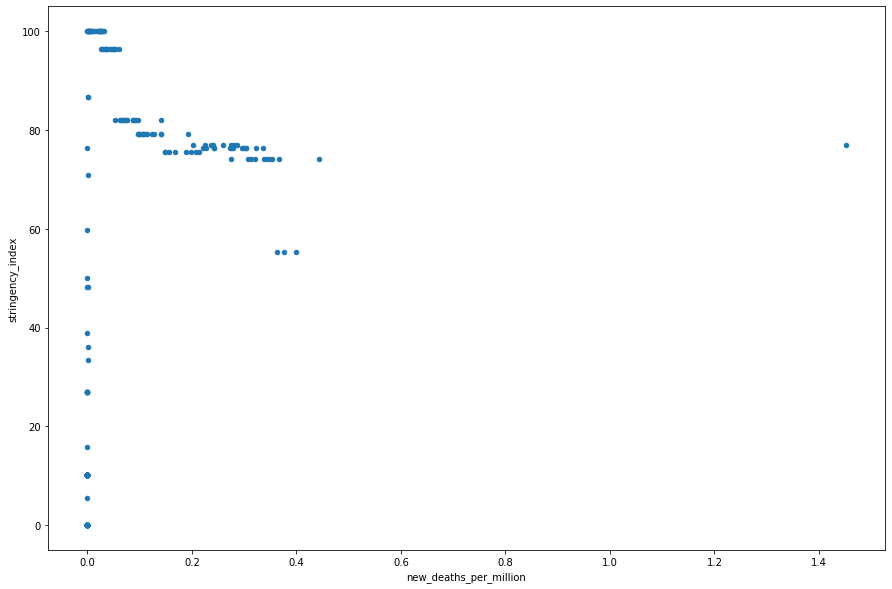

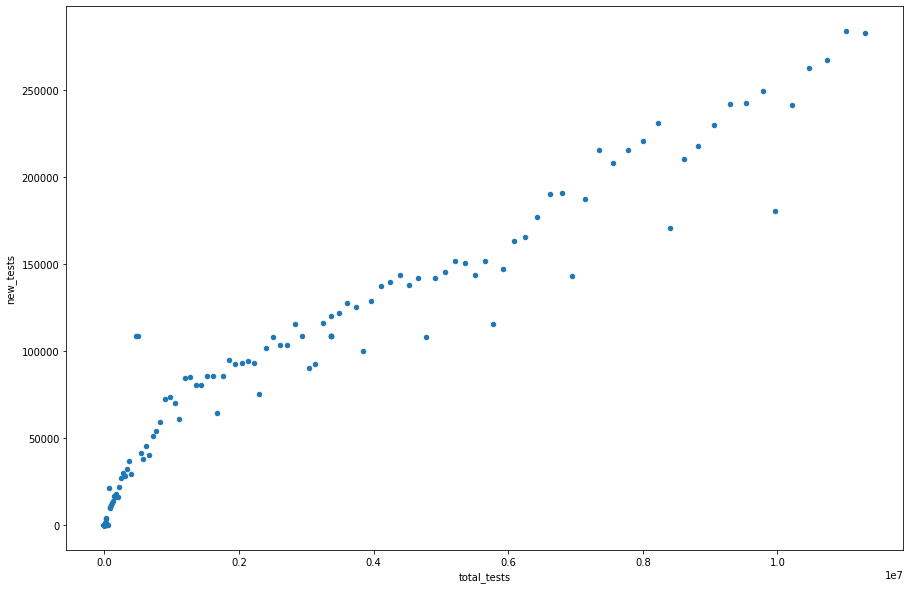

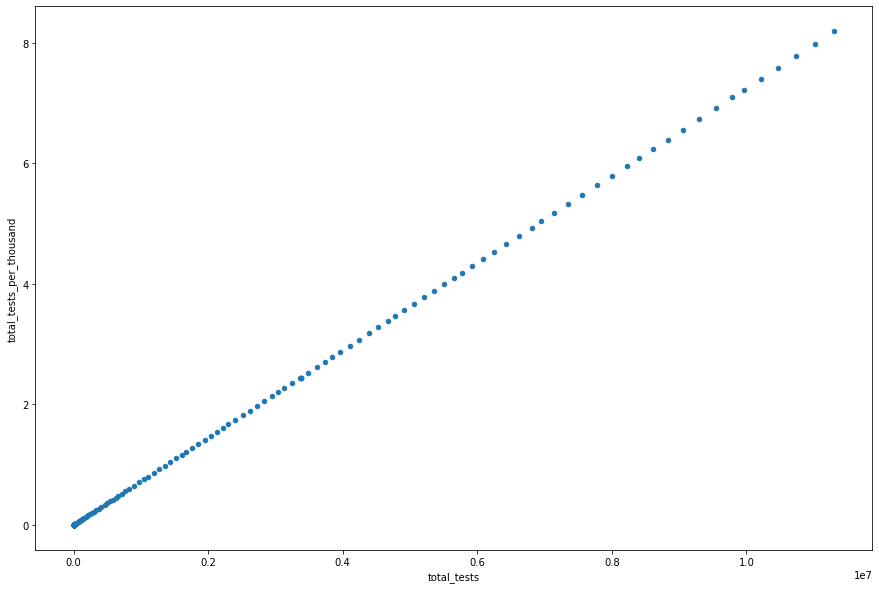

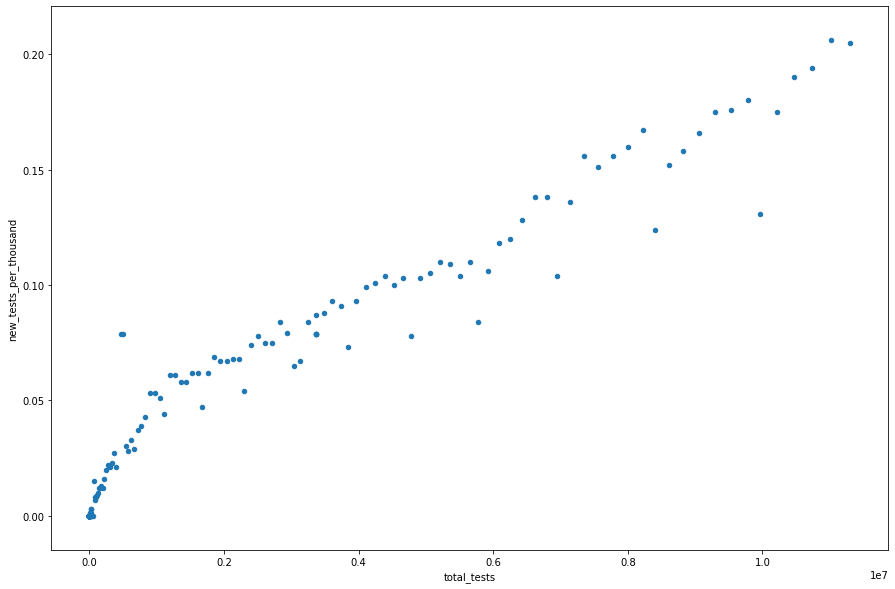

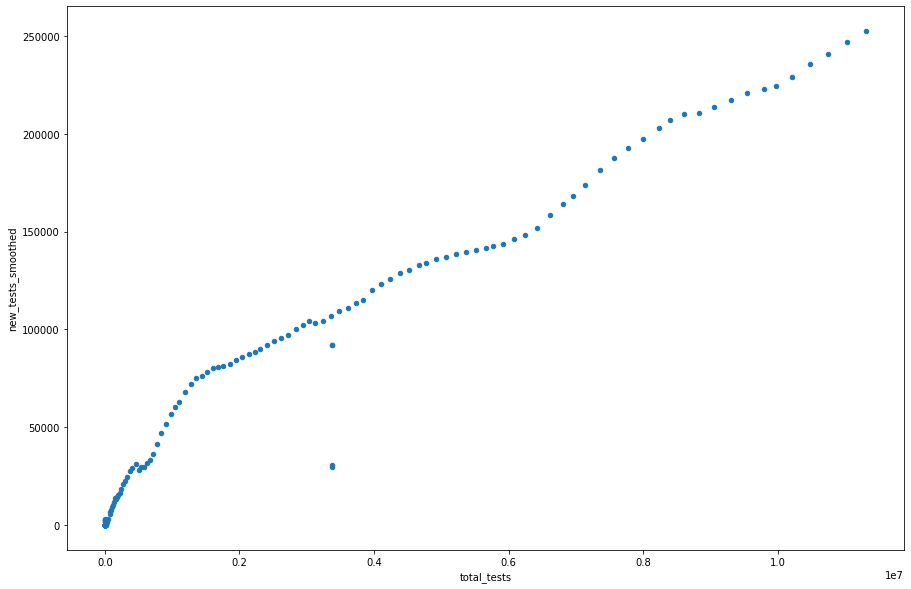

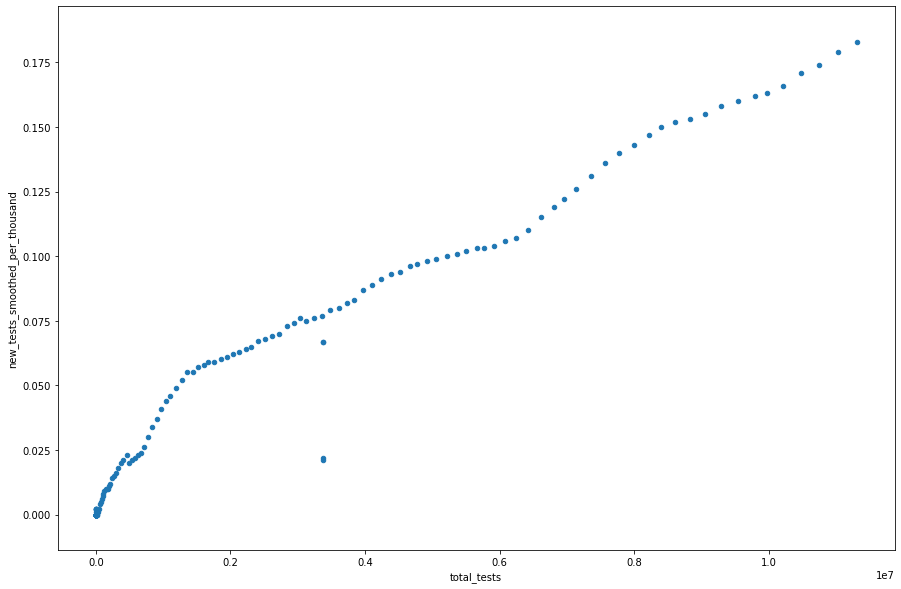

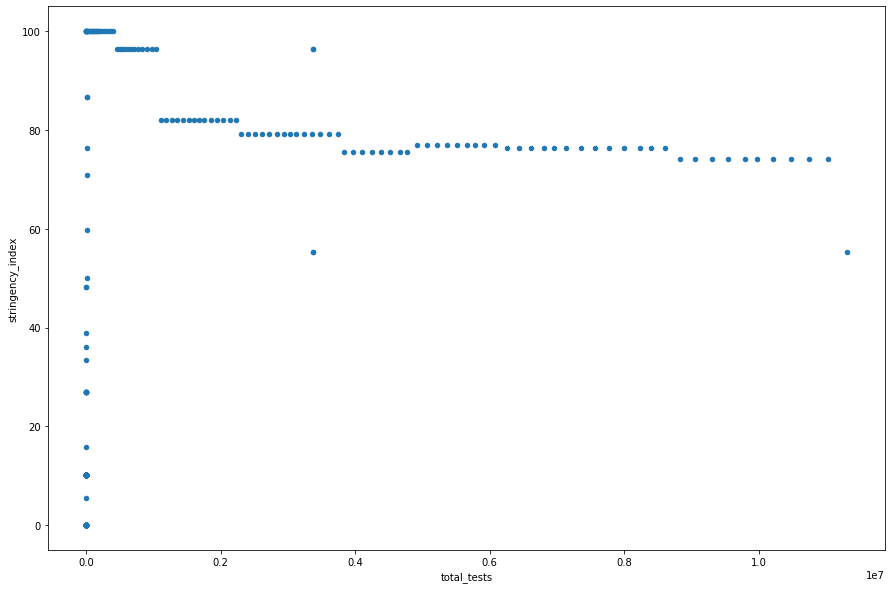

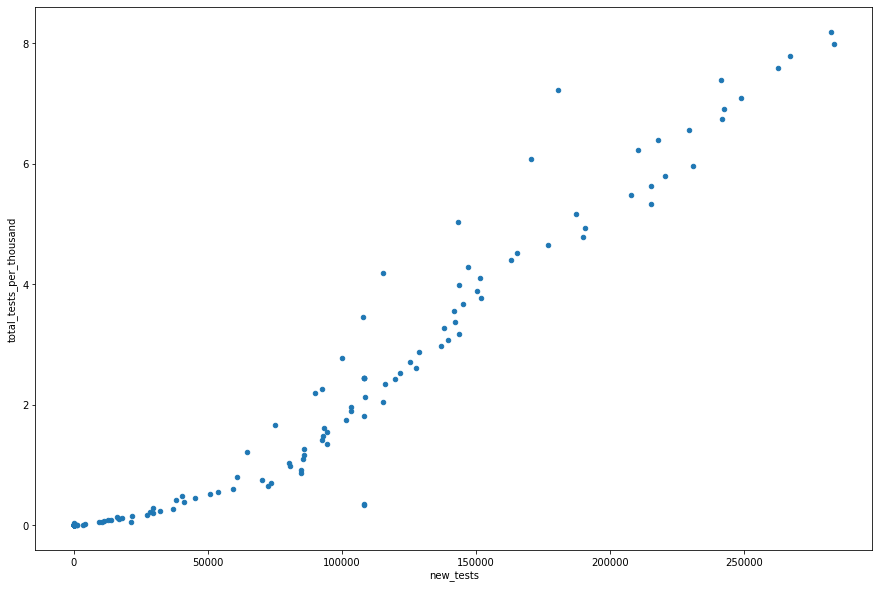

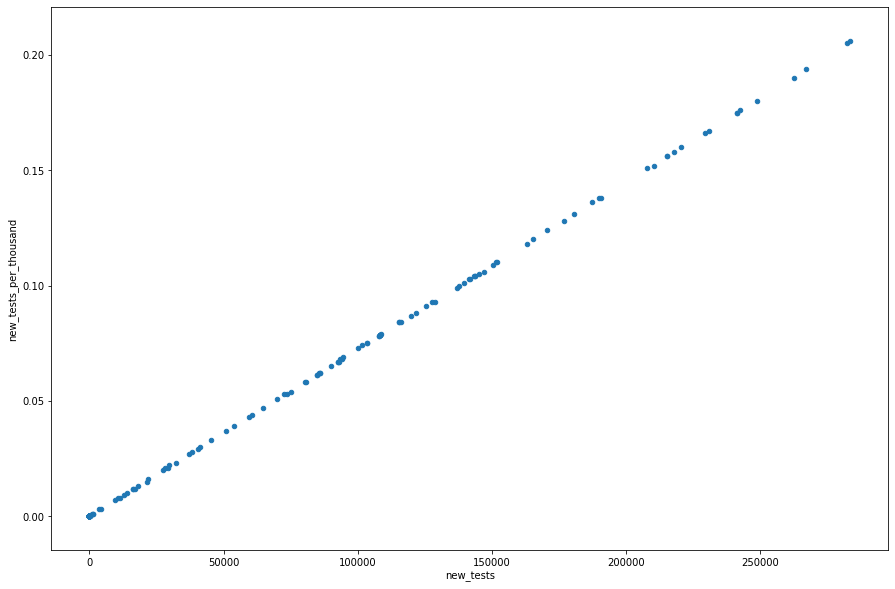

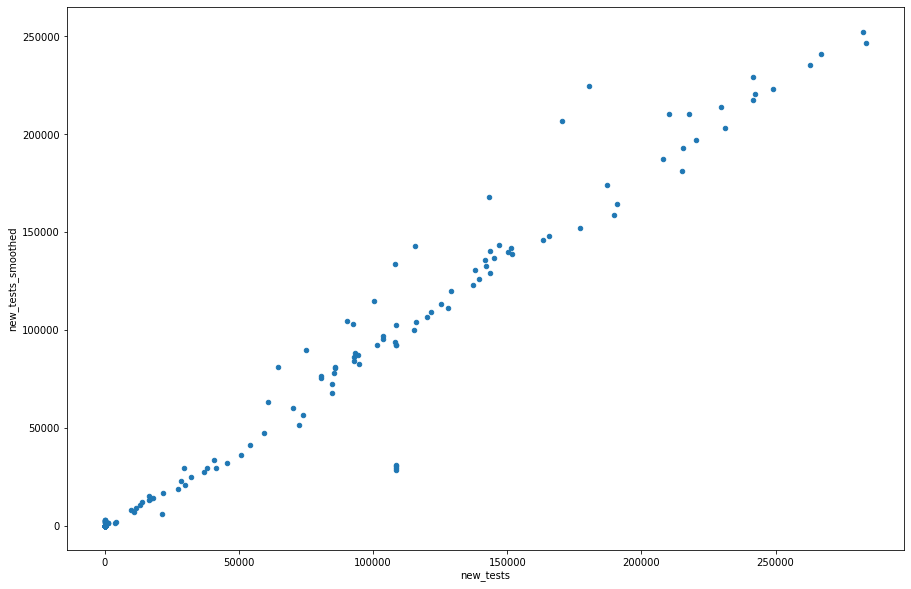

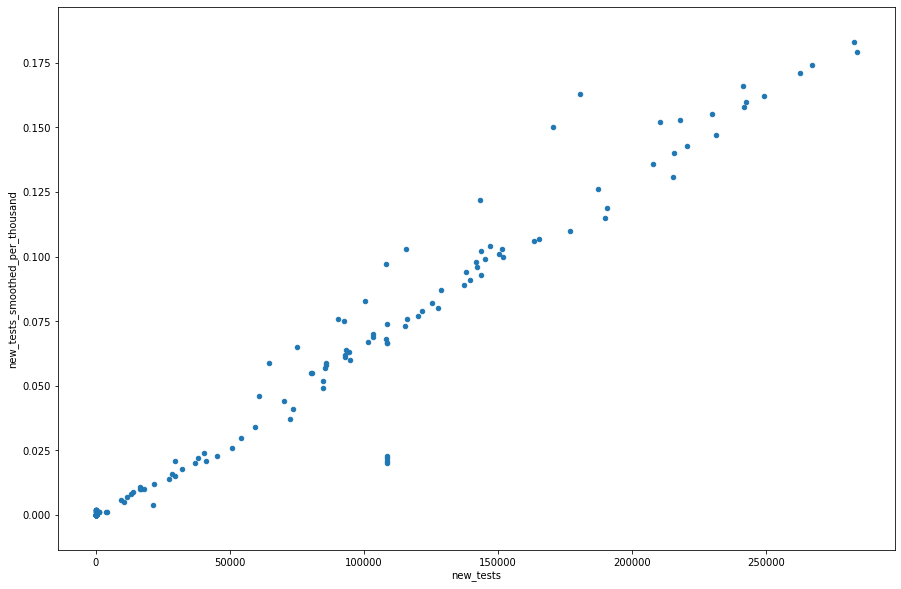

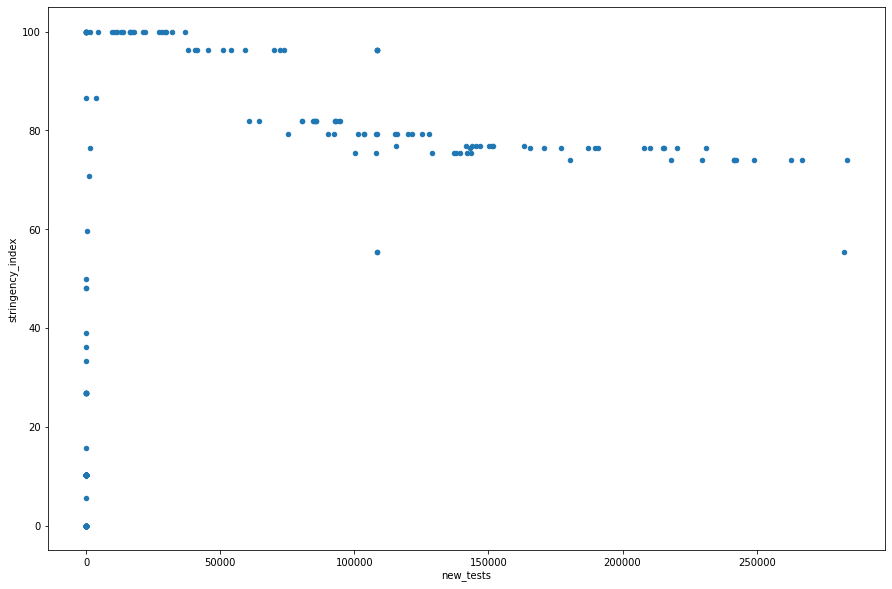

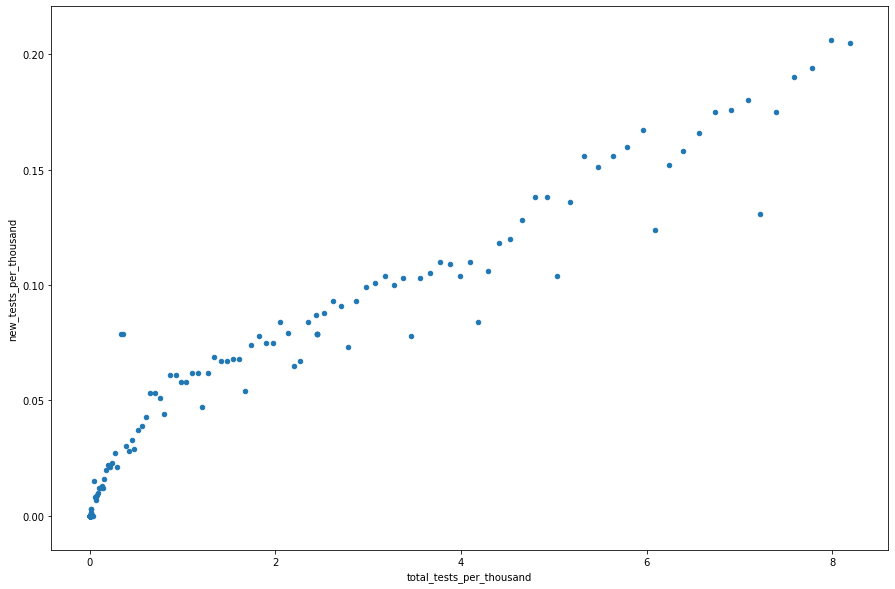

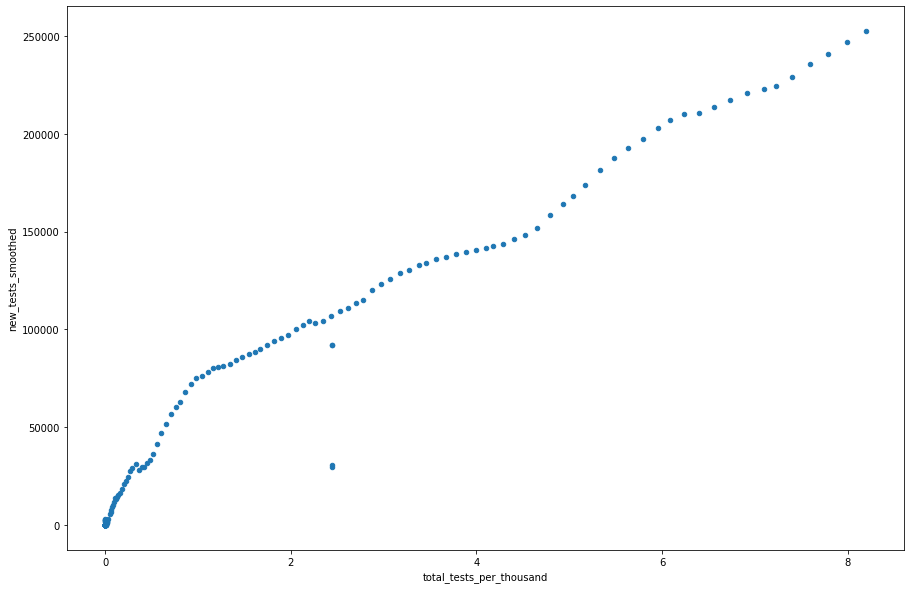

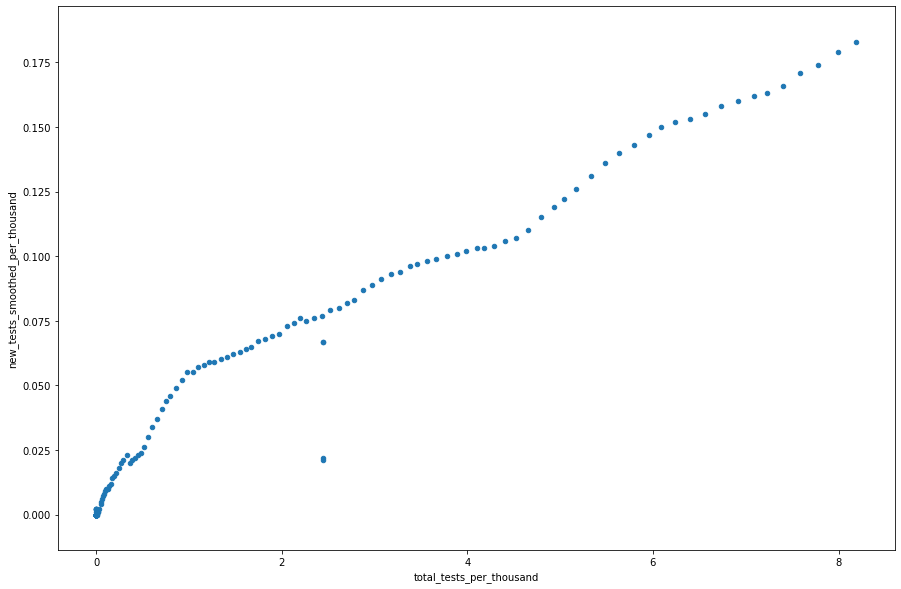

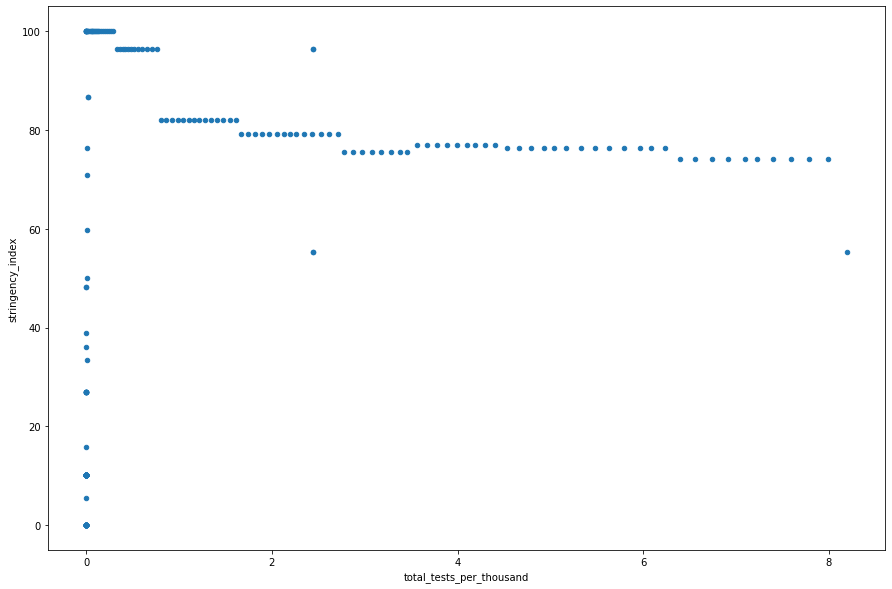

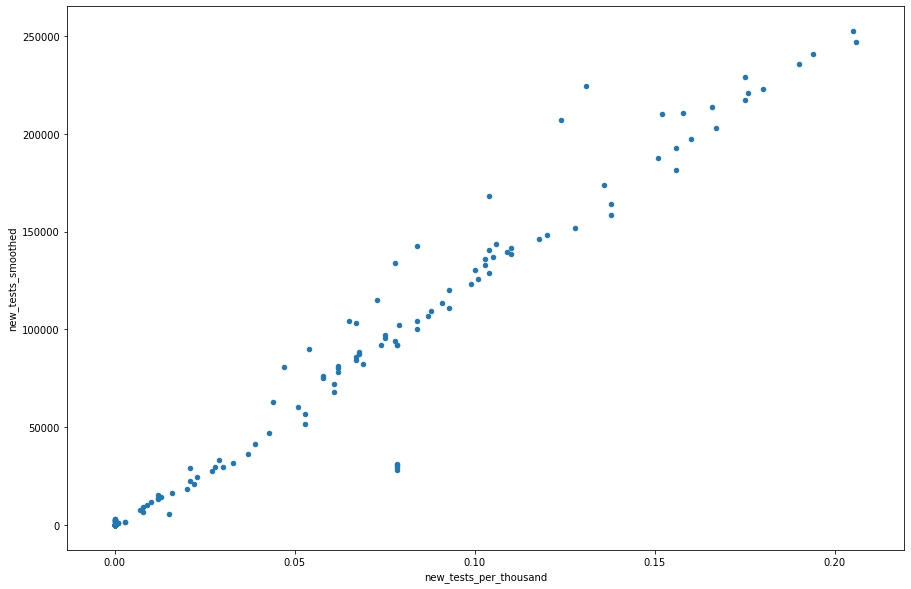

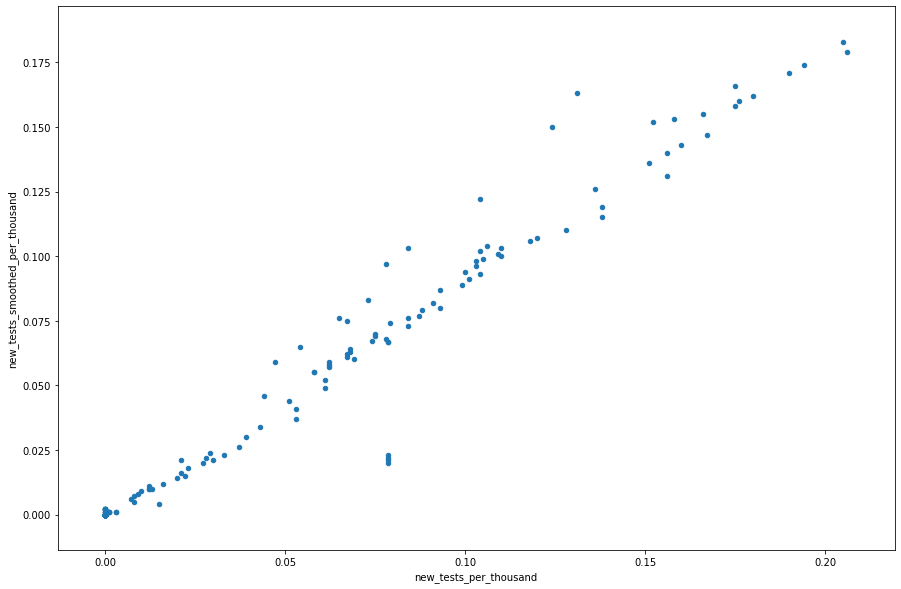

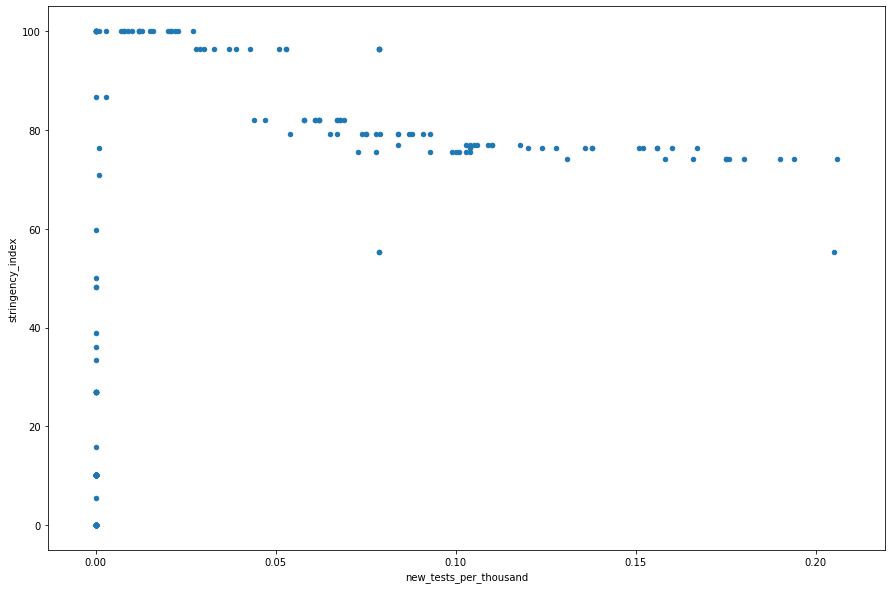

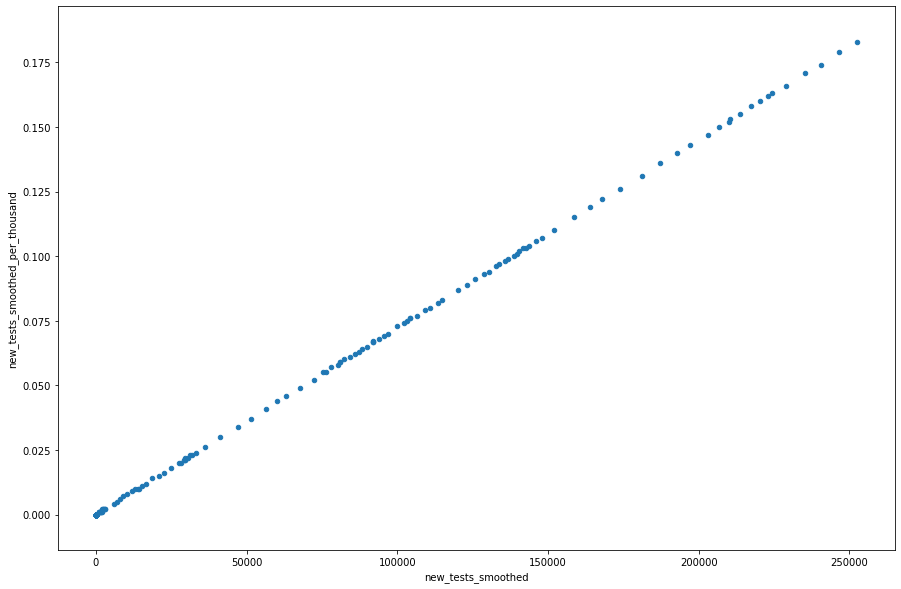

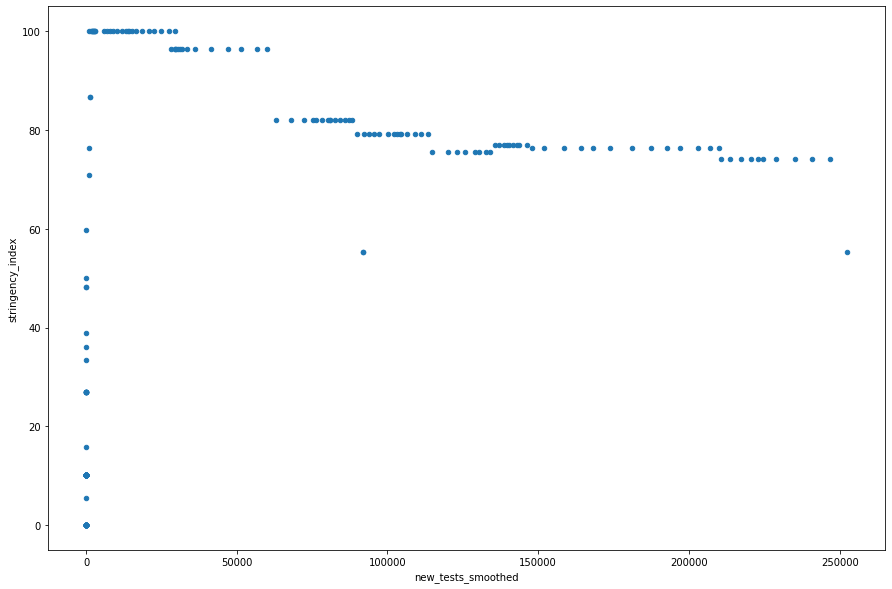

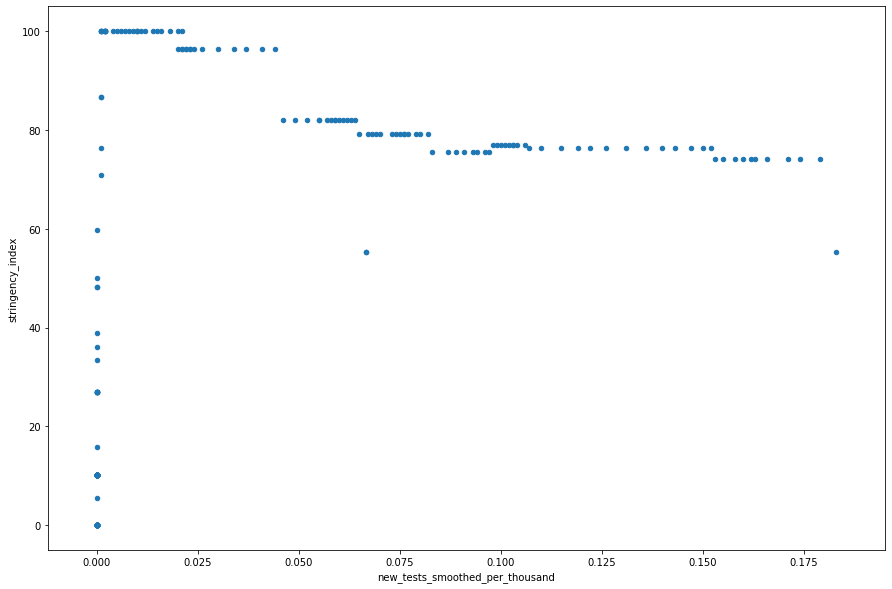

In [24]:
columns  = df.columns
for i in range (0,len(columns)):
    for j in range (i+1,len(columns)):
        df.plot.scatter(x= columns[i], y = columns[j],figsize = (15,10))

####  
A lot of variables seem to have a very high correlation. The matrix below is constructed to confirm it.

In [25]:
df.corr()

date  total_cases  new_cases  \
date                             1.000000     0.761727   0.805124   
total_cases                      0.761727     1.000000   0.993635   
new_cases                        0.805124     0.993635   1.000000   
total_deaths                     0.772309     0.997248   0.992845   
new_deaths                       0.695369     0.774728   0.777254   
total_cases_per_million          0.761727     1.000000   0.993635   
new_cases_per_million            0.805124     0.993635   1.000000   
total_deaths_per_million         0.772311     0.997248   0.992844   
new_deaths_per_million           0.695422     0.774679   0.777225   
total_tests                      0.812082     0.935757   0.945890   
new_tests                        0.877230     0.890184   0.916943   
total_tests_per_thousand         0.812089     0.935755   0.945890   
new_tests_per_thousand           0.877142     0.890348   0.917093   
new_tests_smoothed               0.875277     0.905219   0.931519   
new_tests_smoothed_per_thousand  0.875077     0.905450   0.931684   
stringency_index                 0.765819     0.290966   0.340482   

                                 total_deaths  new_deaths  \
date                                 0.772309    0.695369   
total_cases                          0.997248    0.774728   
new_cases                            0.992845    0.777254   
total_deaths                         1.000000    0.791075   
new_deaths                           0.791075    1.000000   
total_cases_per_million              0.997248    0.774728   
new_cases_per_million                0.992845    0.777252   
total_deaths_per_million             1.000000    0.791072   
new_deaths_per_million               0.791028    0.999999   
total_tests                          0.947515    0.782428   
new_tests                            0.903635    0.771244   
total_tests_per_thousand             0.947515    0.782434   
new_tests_per_thousand               0.903785    0.771083   
new_tests_smoothed                   0.918651    0.779332   
new_tests_smoothed_per_thousand      0.918888    0.779338   
stringency_index                     0.301898    0.322697   

                                 total_cases_per_million  \
date                                            0.761727   
total_cases                                     1.000000   
new_cases                                       0.993635   
total_deaths                                    0.997248   
new_deaths                                      0.774728   
total_cases_per_million                         1.000000   
new_cases_per_million                           0.993635   
total_deaths_per_million                        0.997248   
new_deaths_per_million                          0.774679   
total_tests                                     0.935757   
new_tests                                       0.890184   
total_tests_per_thousand                        0.935755   
new_tests_per_thousand                          0.890348   
new_tests_smoothed                              0.905219   
new_tests_smoothed_per_thousand                 0.905450   
stringency_index                                0.290966   

                                 new_cases_per_million  \
date                                          0.805124   
total_cases                                   0.993635   
new_cases                                     1.000000   
total_deaths                                  0.992845   
new_deaths                                    0.777252   
total_cases_per_million                       0.993635   
new_cases_per_million                         1.000000   
total_deaths_per_million                      0.992845   
new_deaths_per_million                        0.777223   
total_tests                                   0.945890   
new_tests                                     0.916943   
total_tests_per_thousand                      0.945890   
new_tests_per_thousand                        0.91

####   
Line plots for the data are constructed.

C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\ratul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

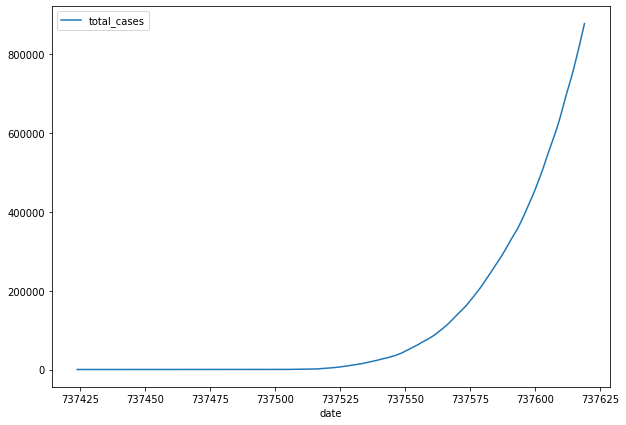

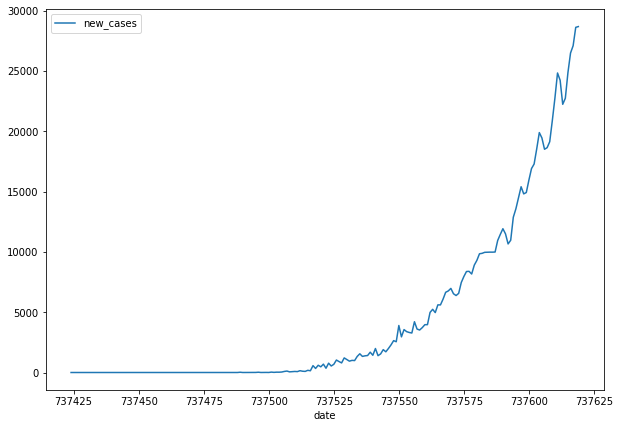

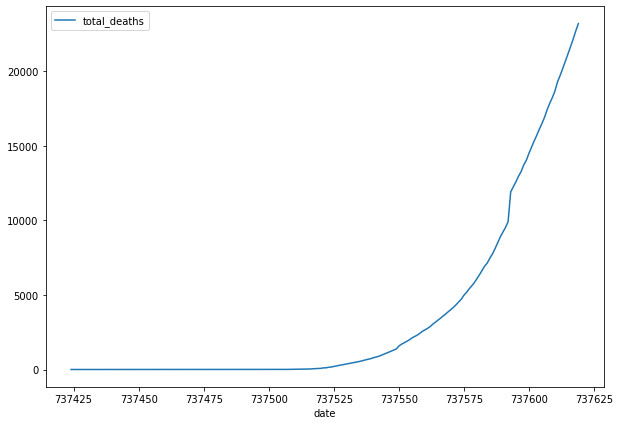

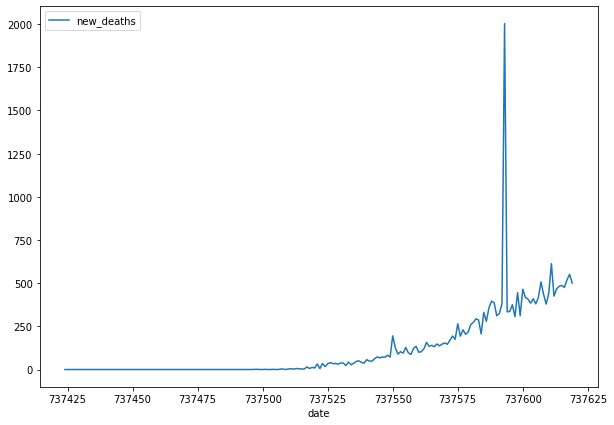

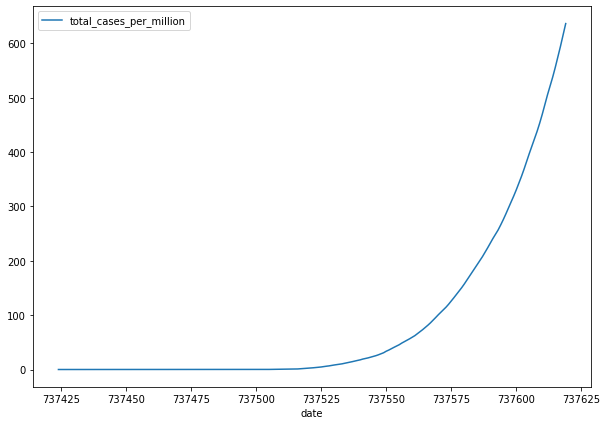

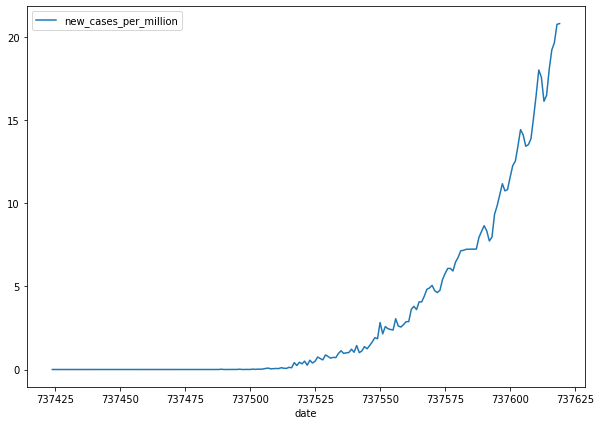

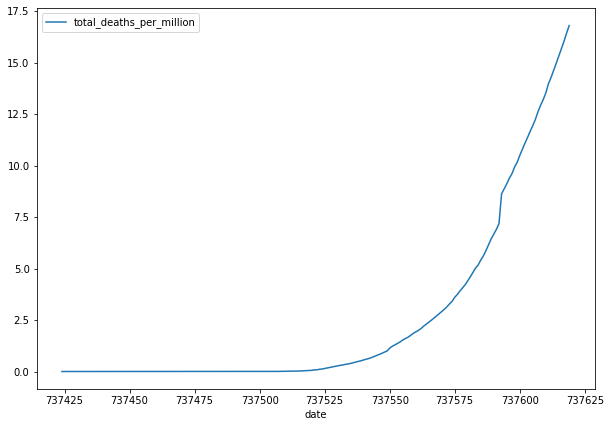

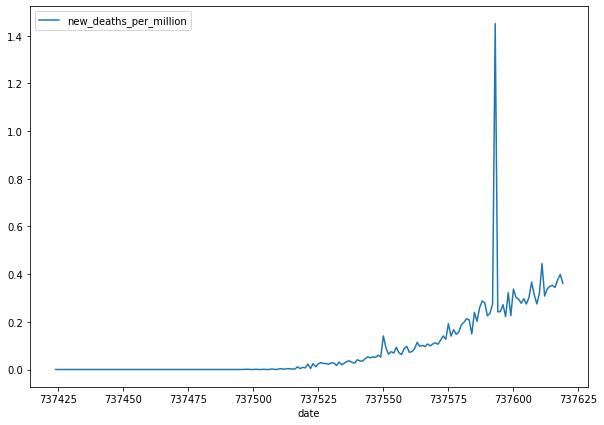

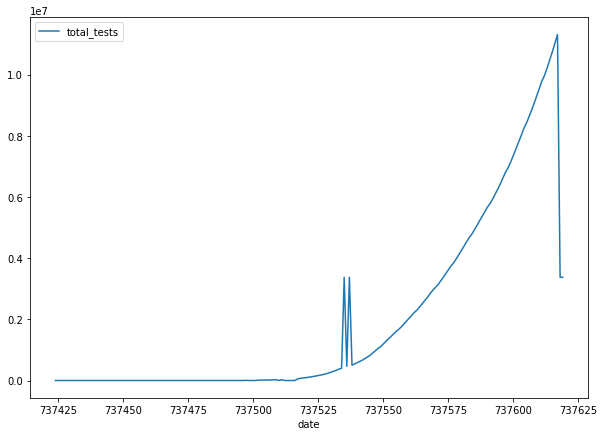

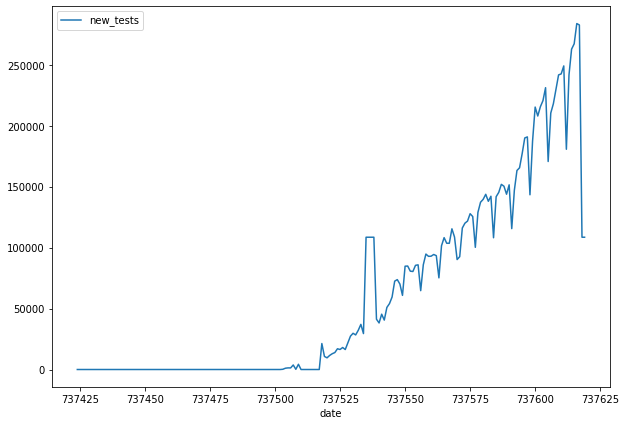

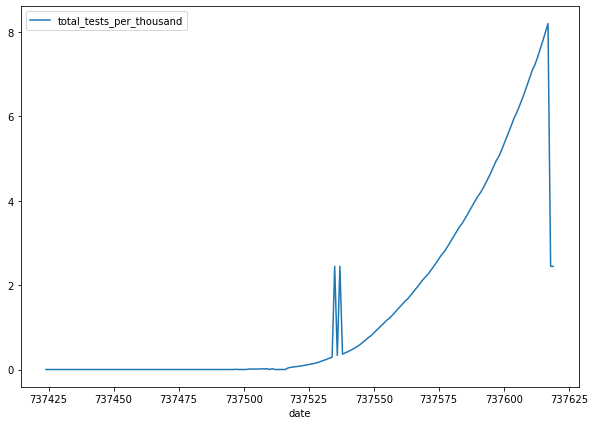

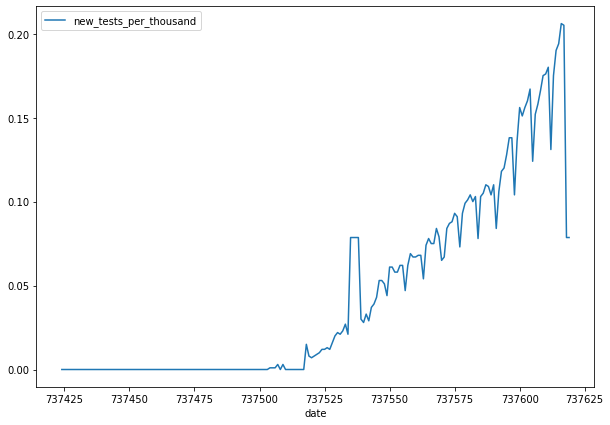

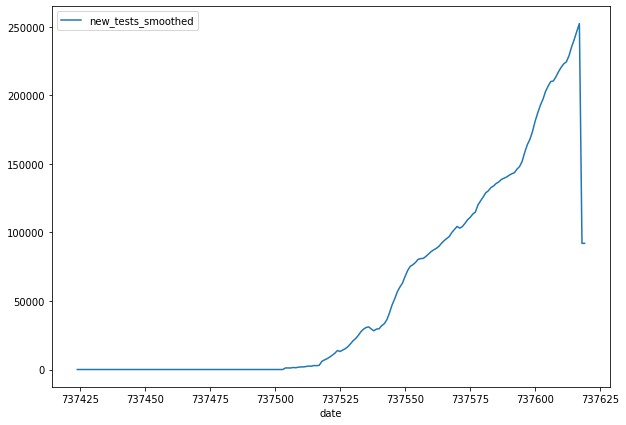

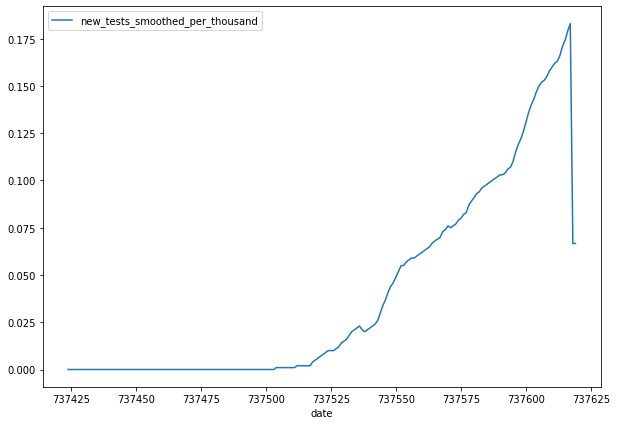

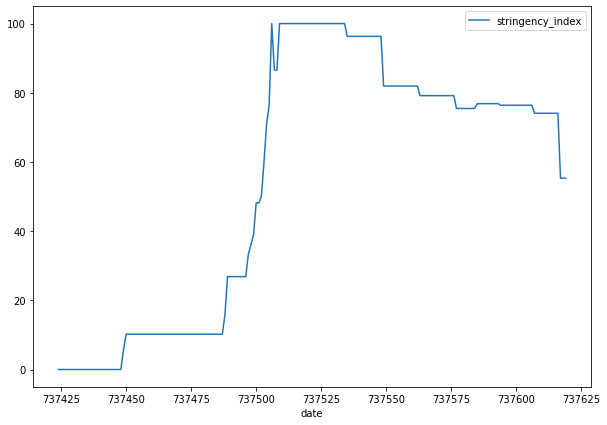

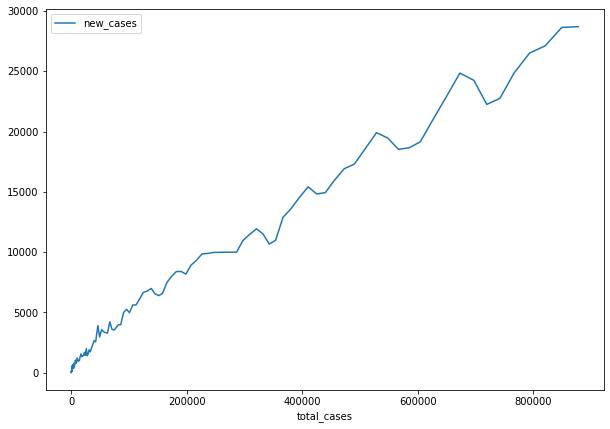

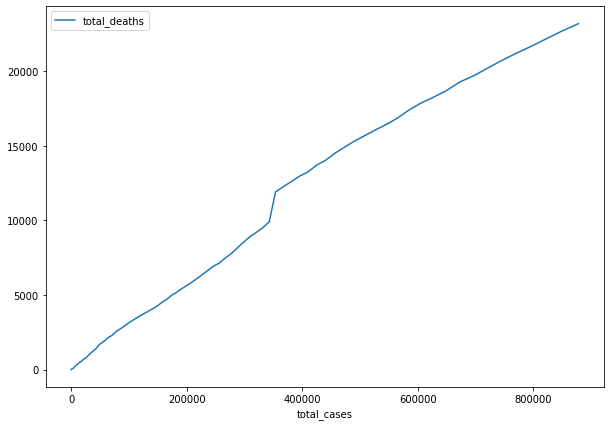

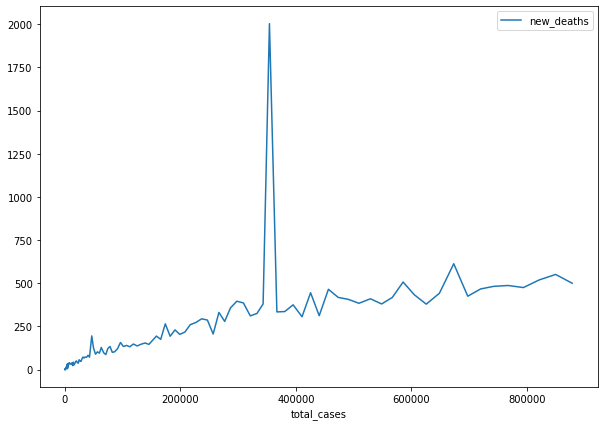

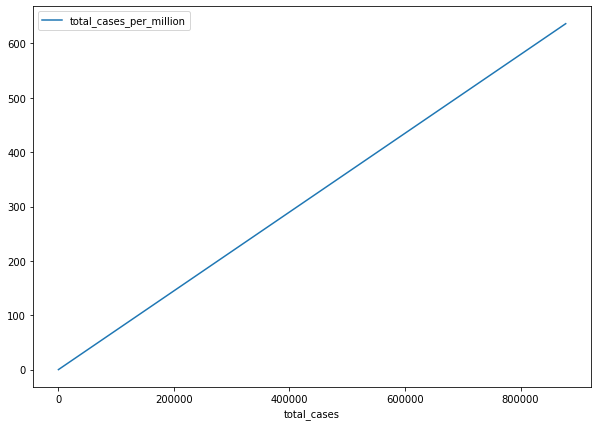

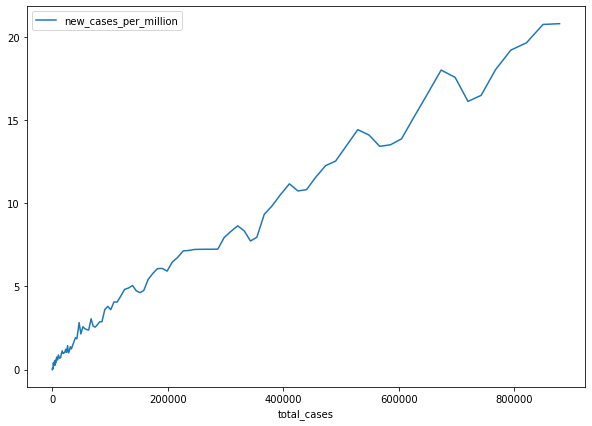

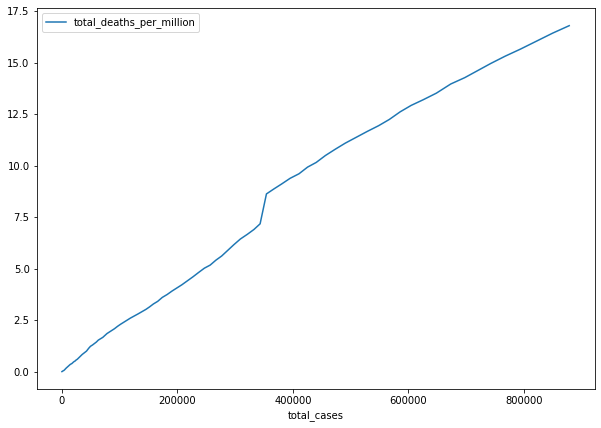

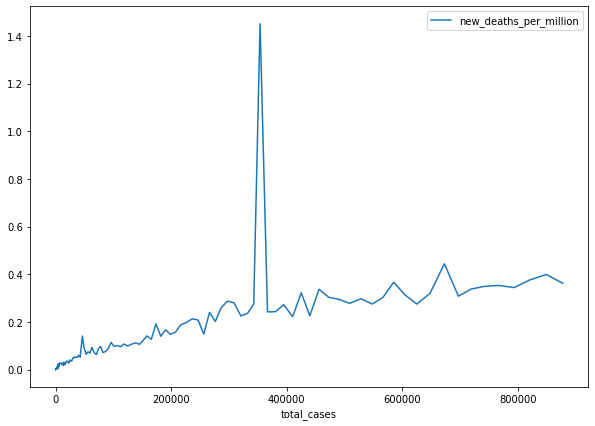

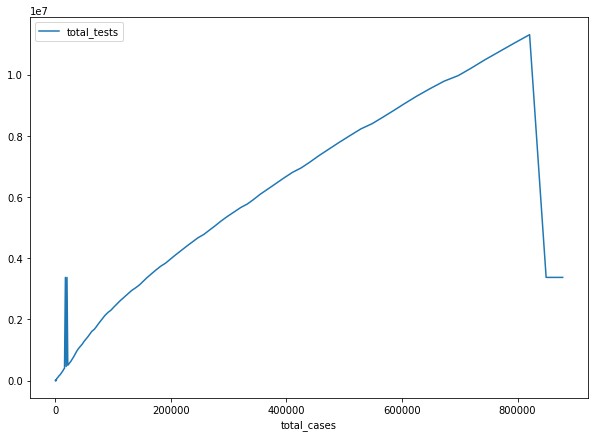

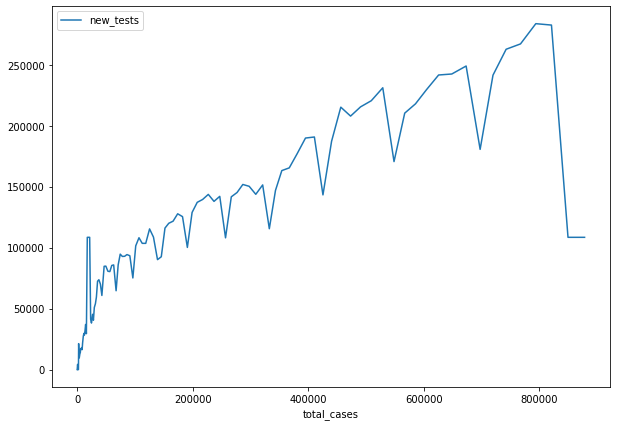

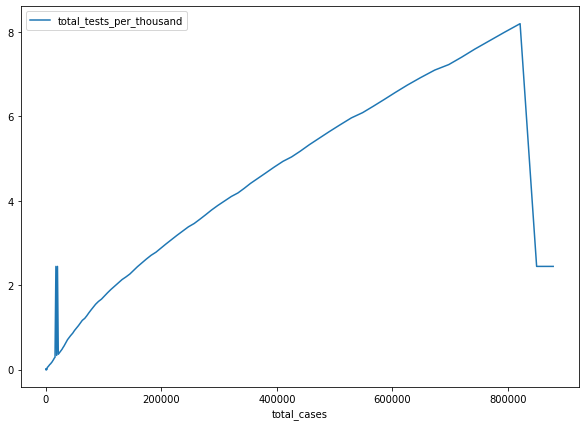

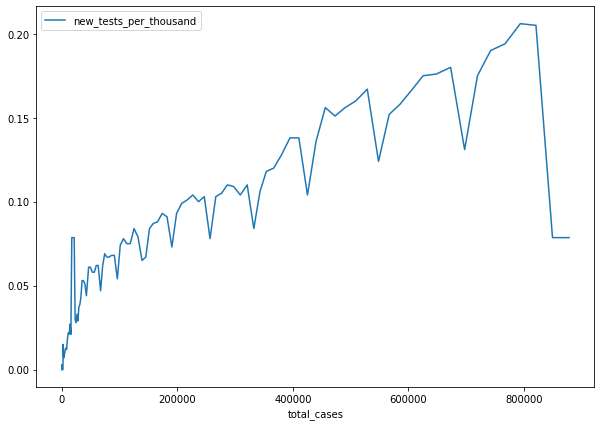

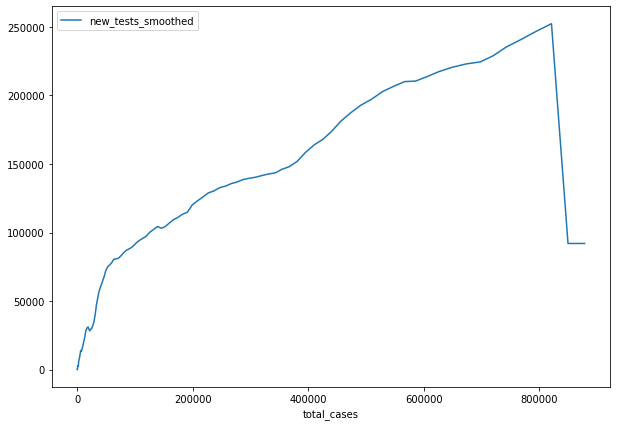

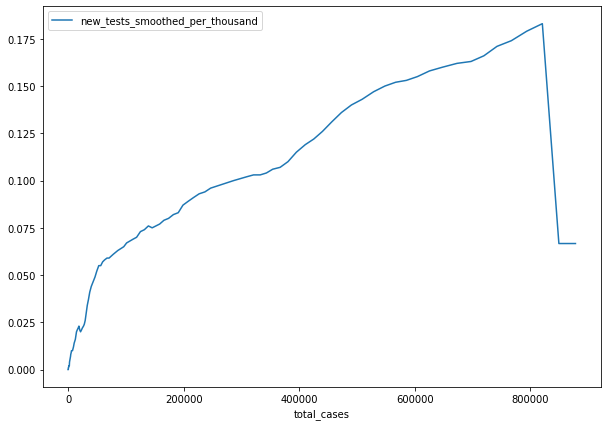

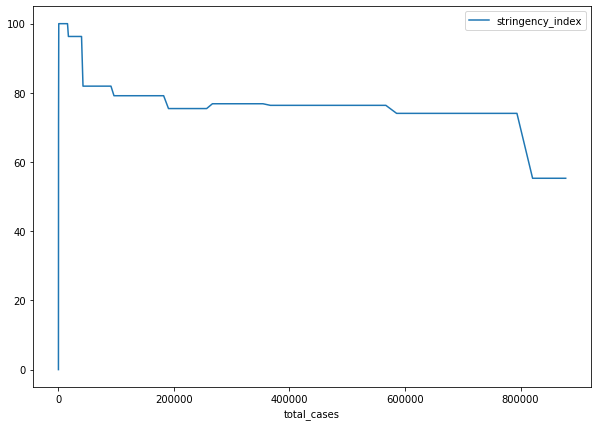

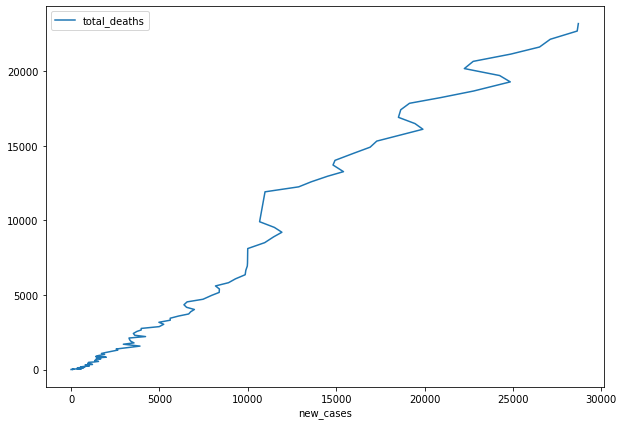

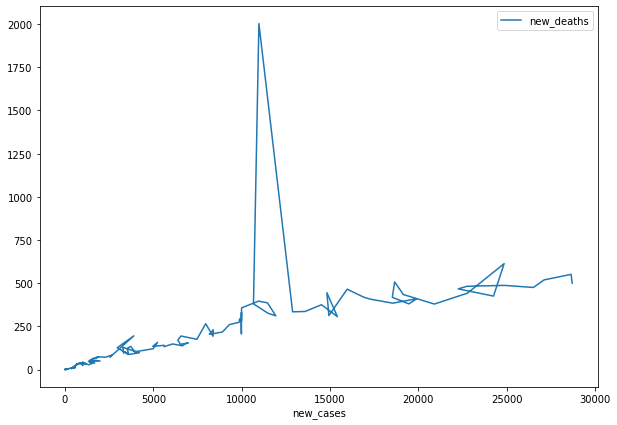

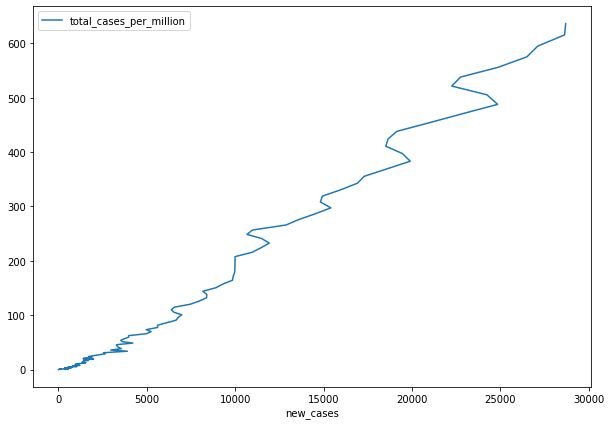

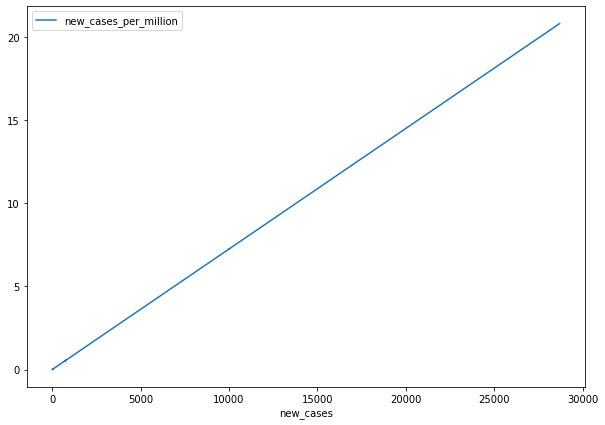

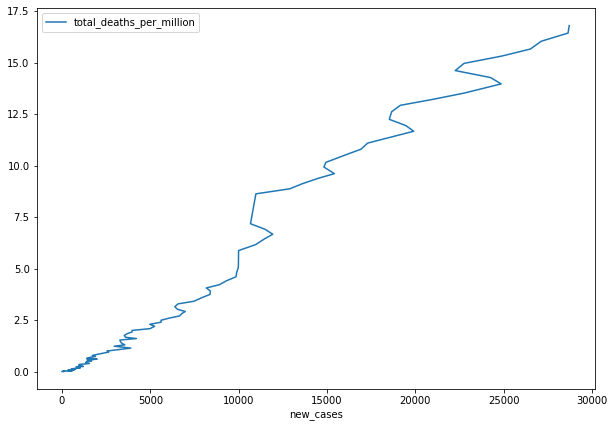

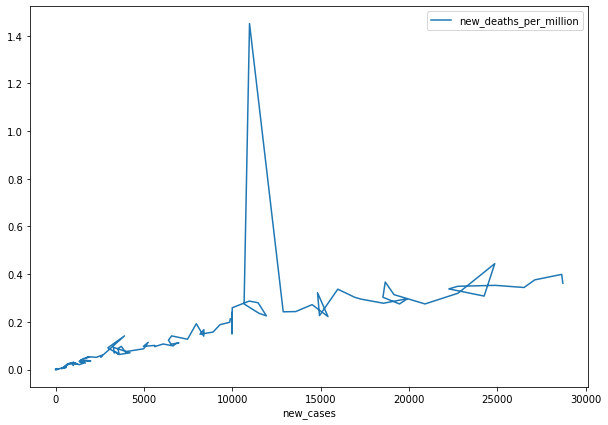

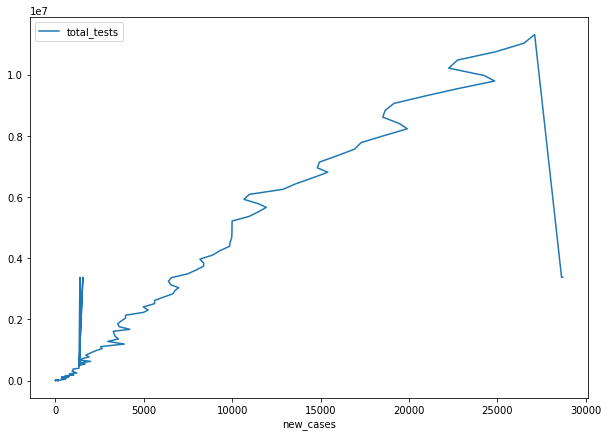

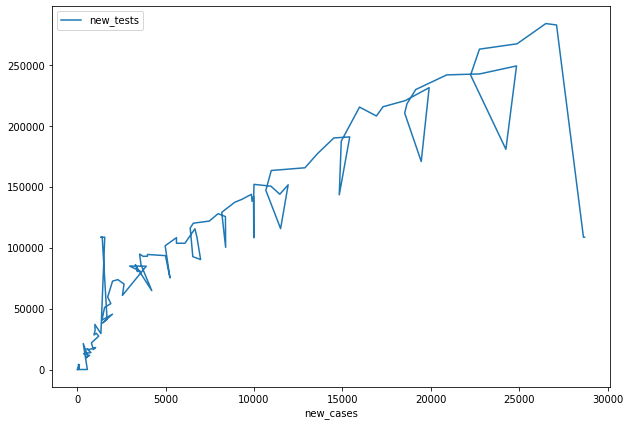

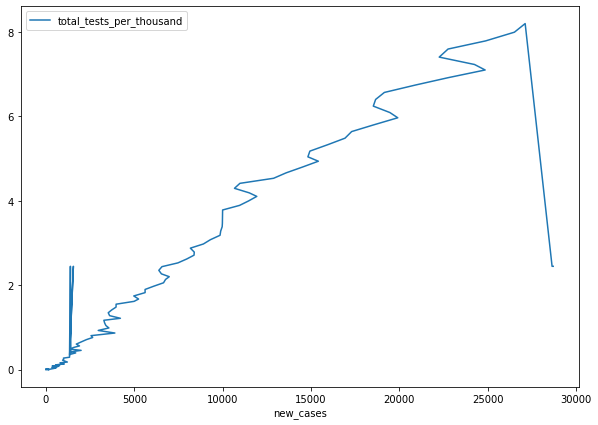

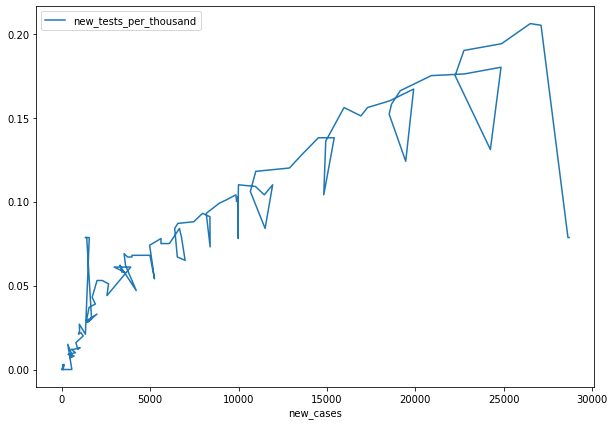

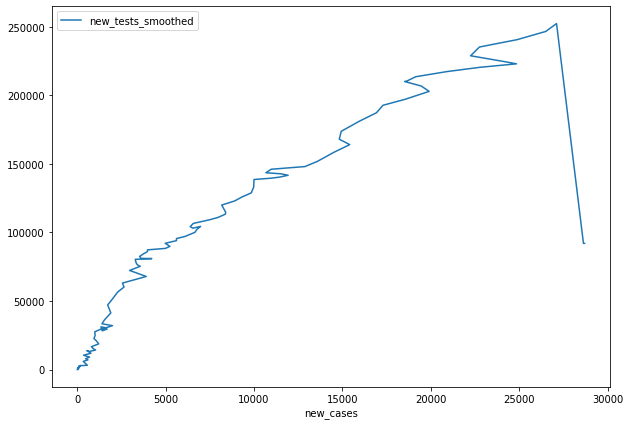

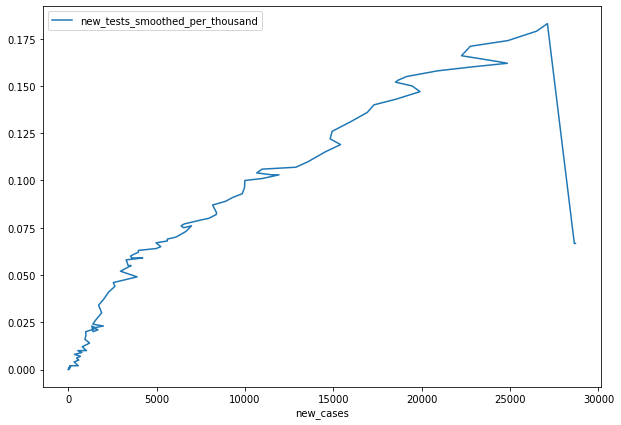

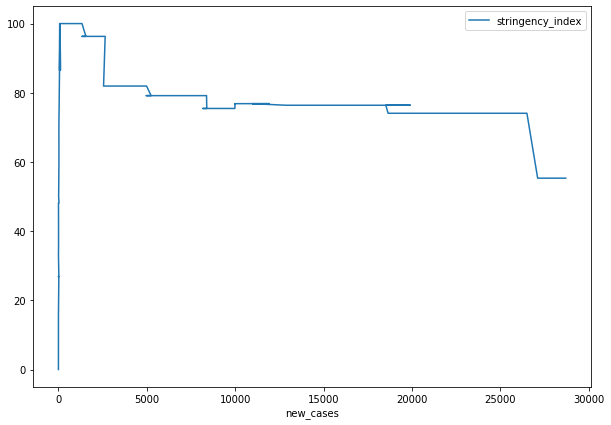

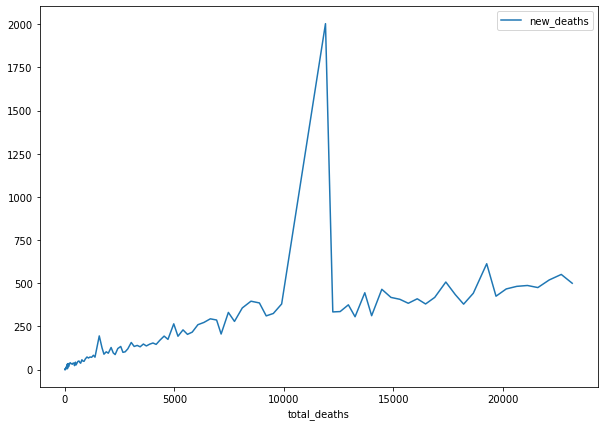

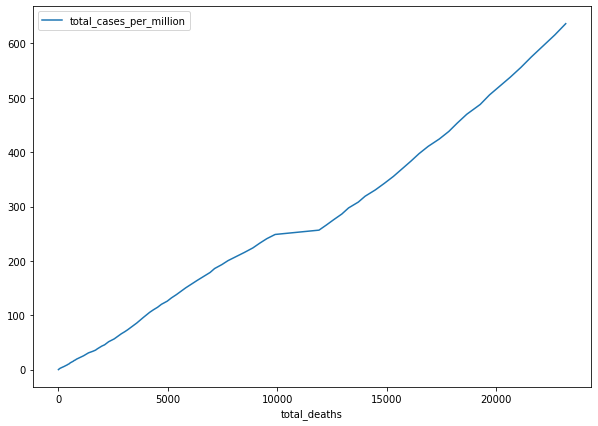

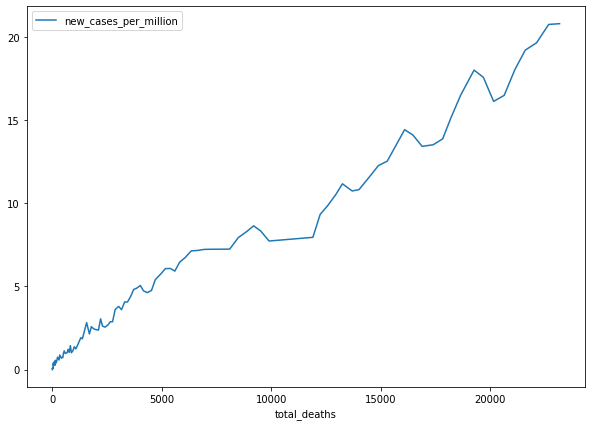

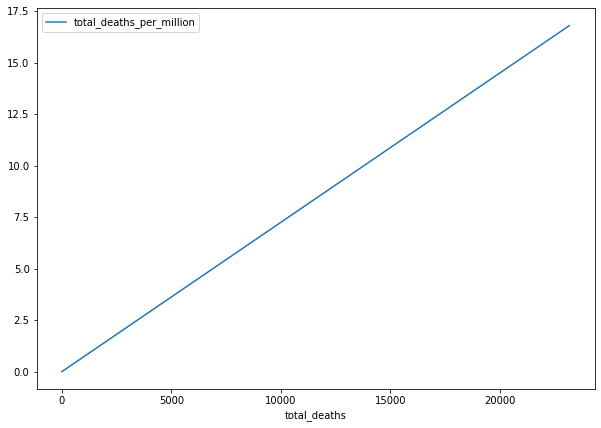

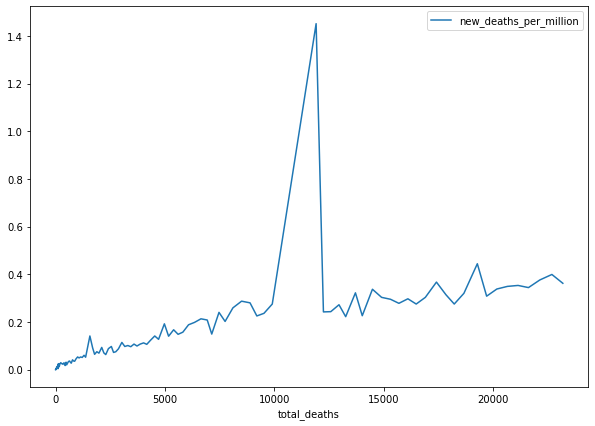

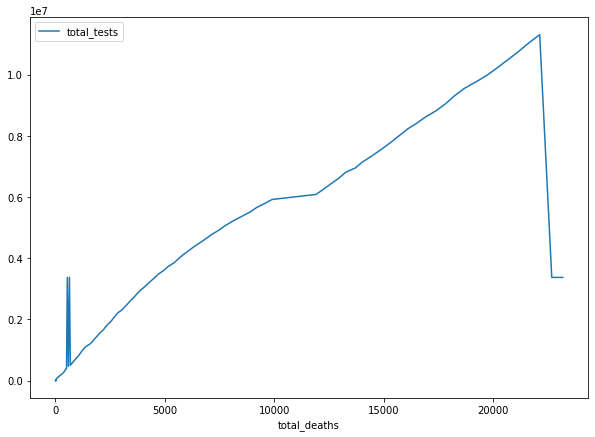

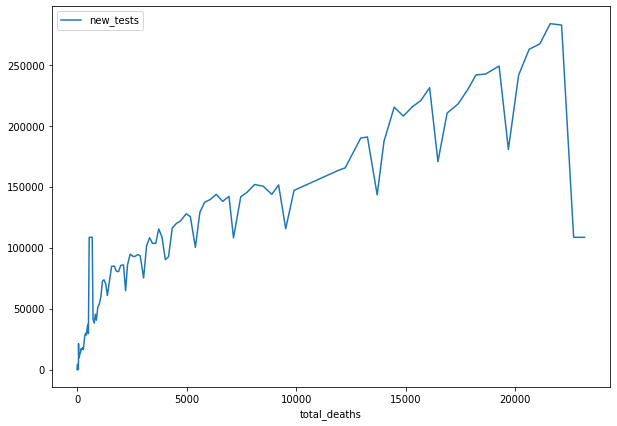

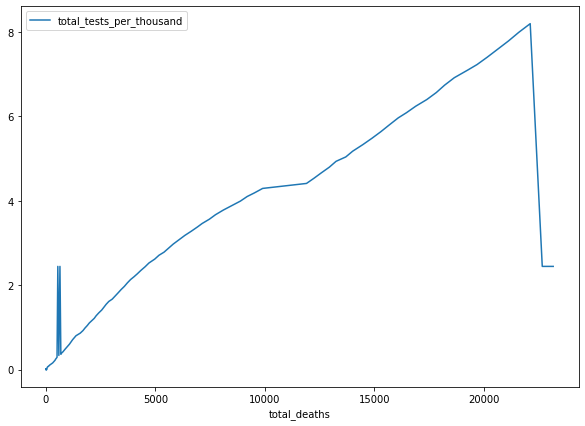

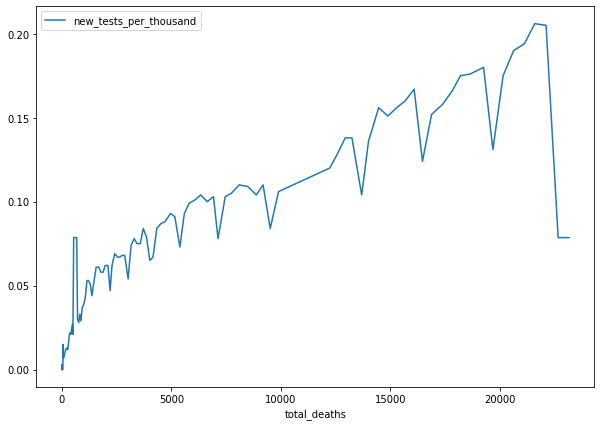

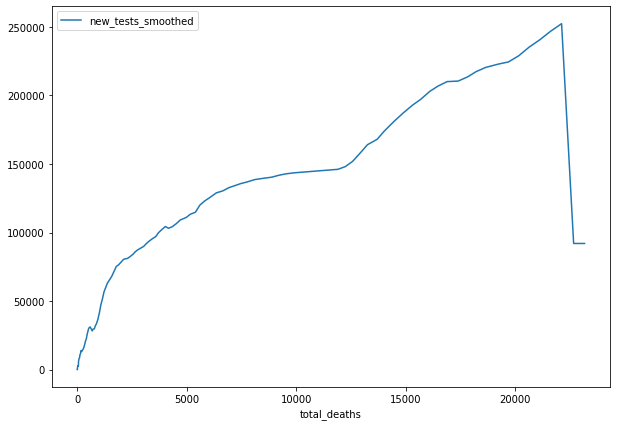

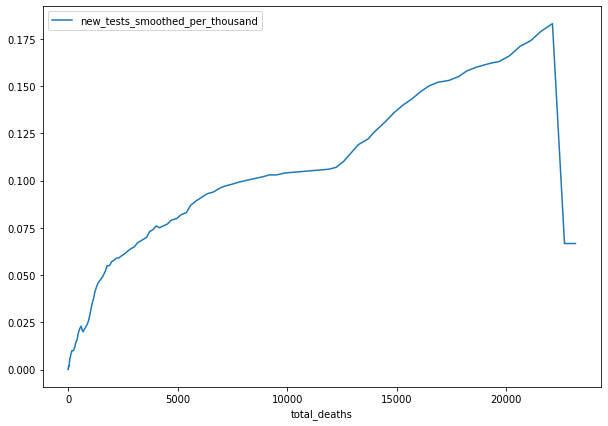

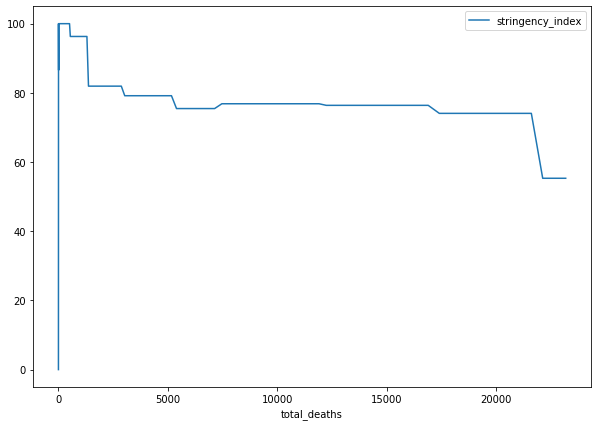

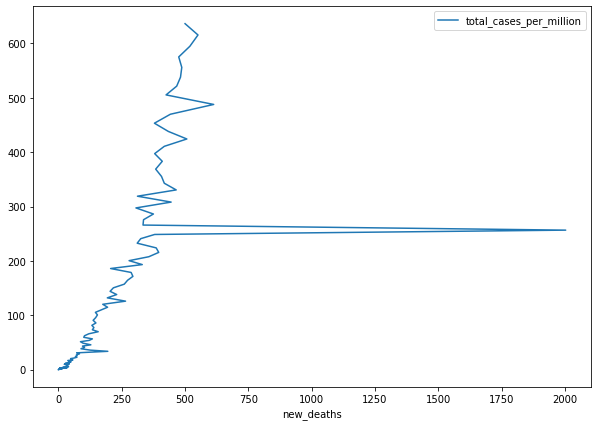

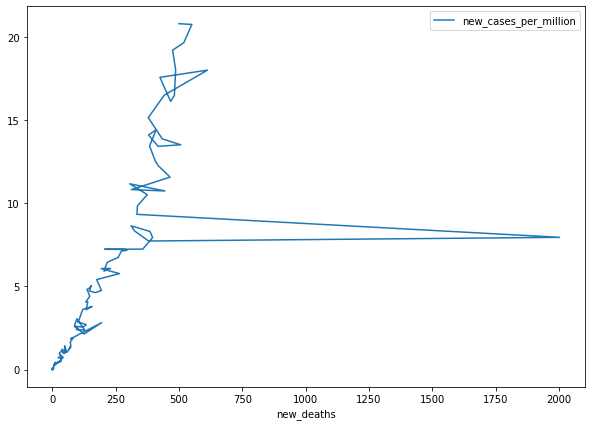

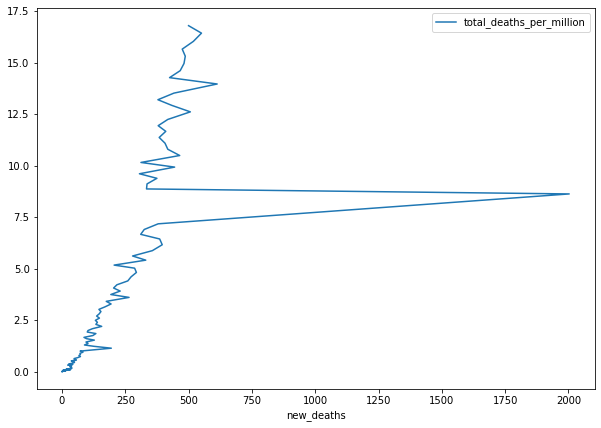

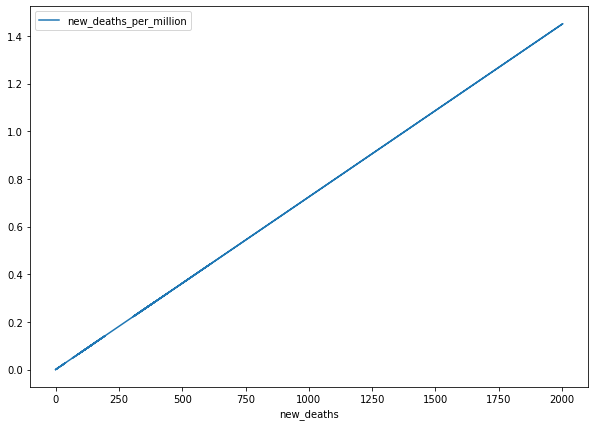

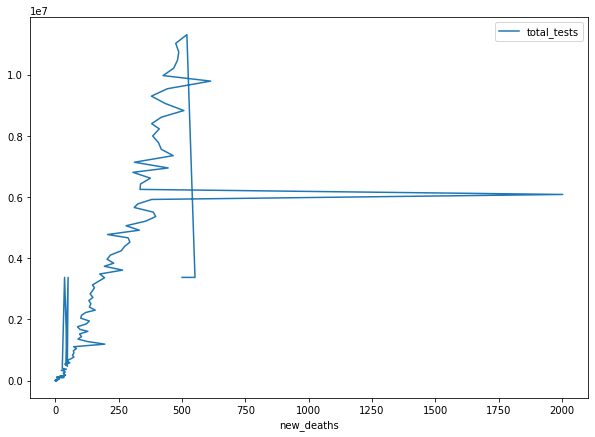

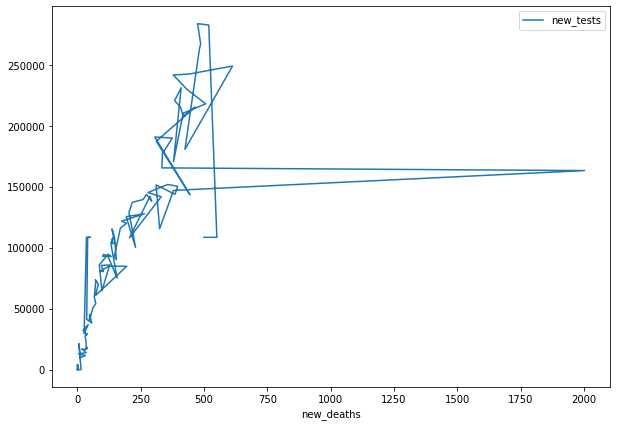

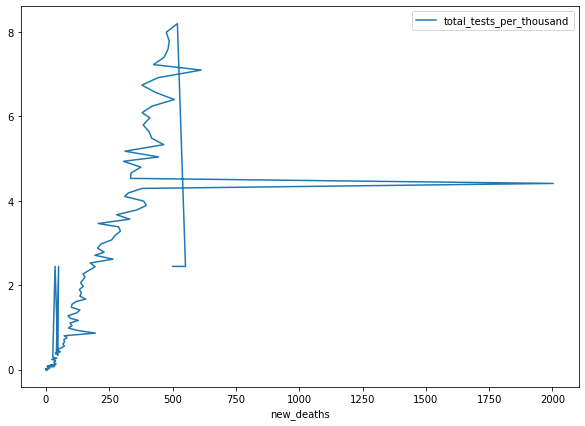

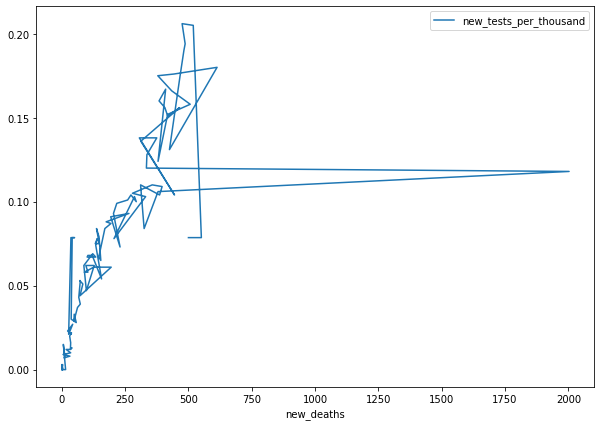

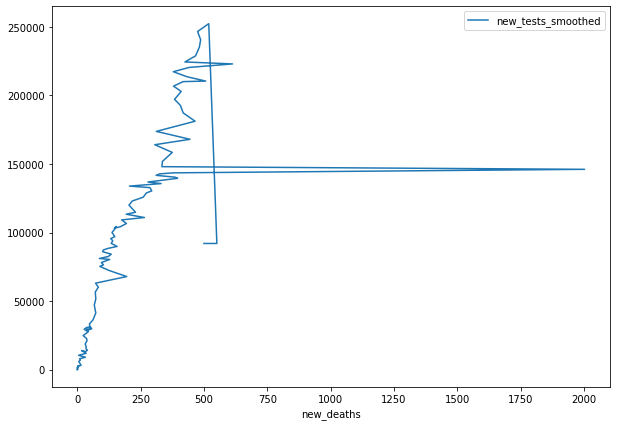

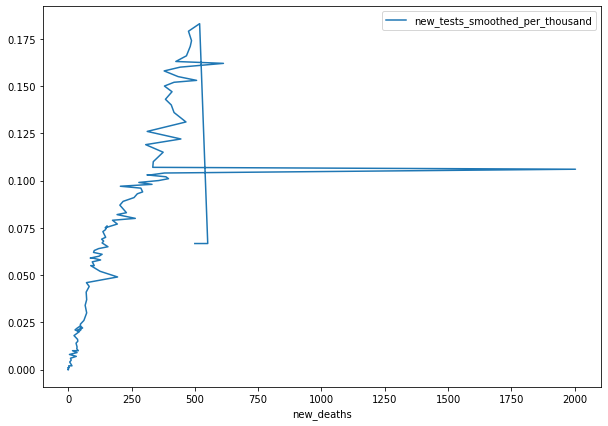

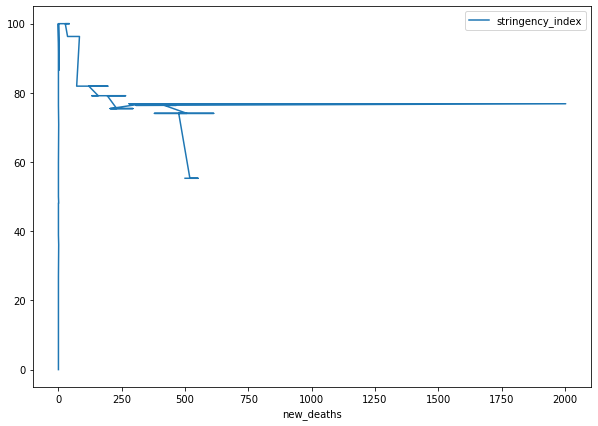

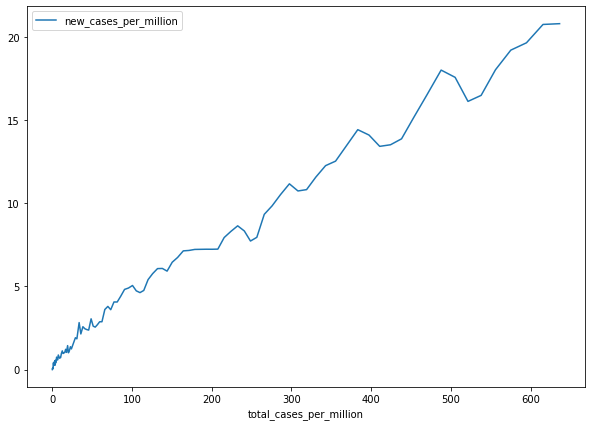

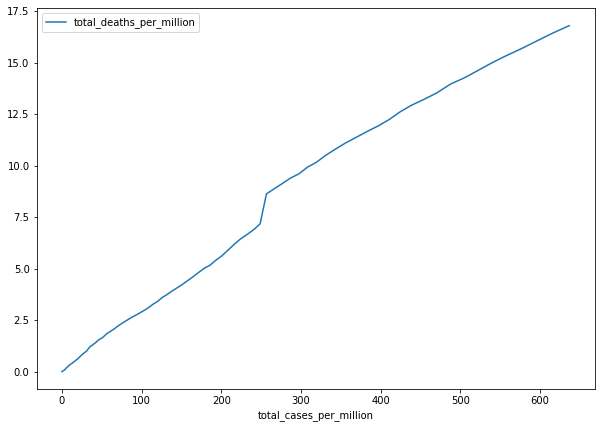

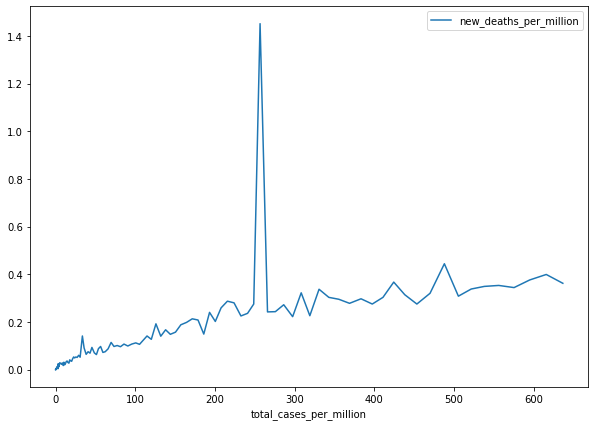

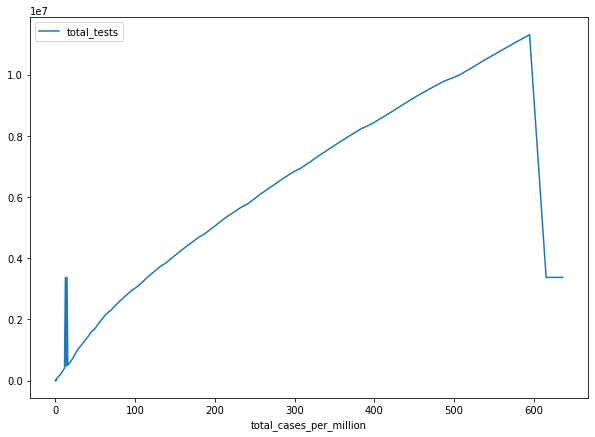

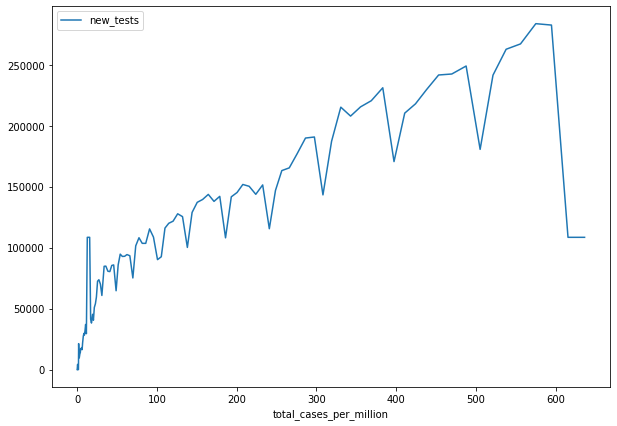

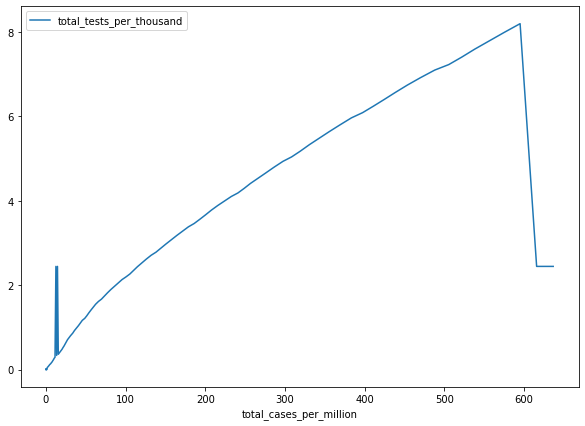

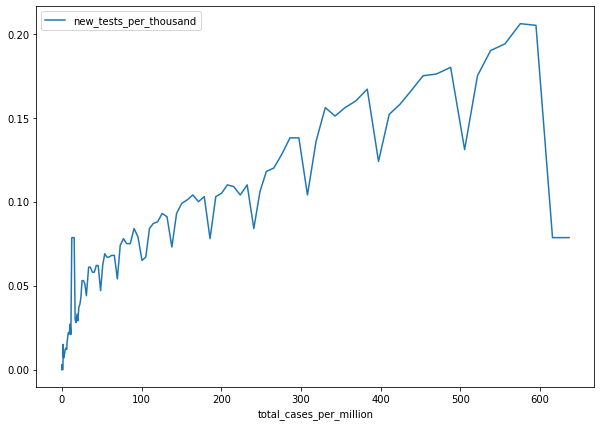

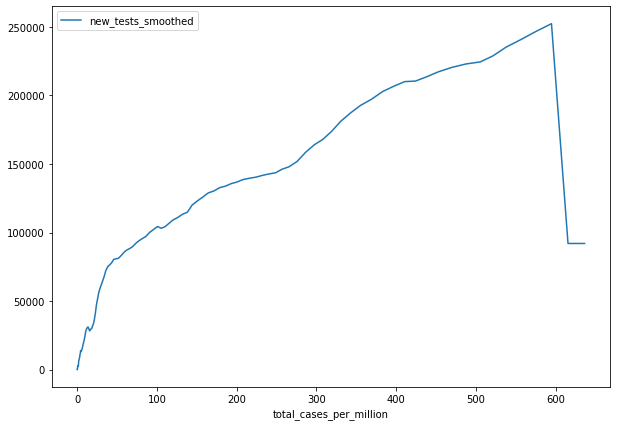

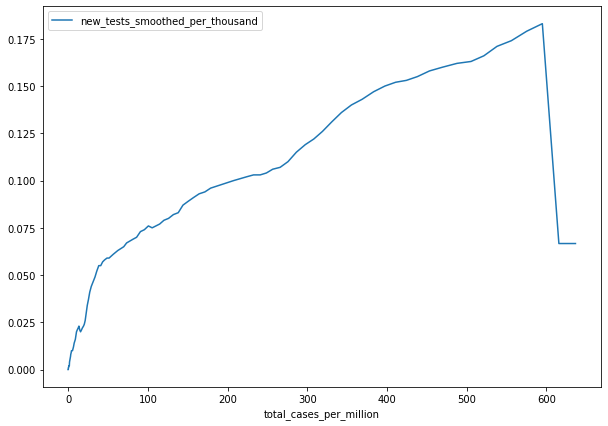

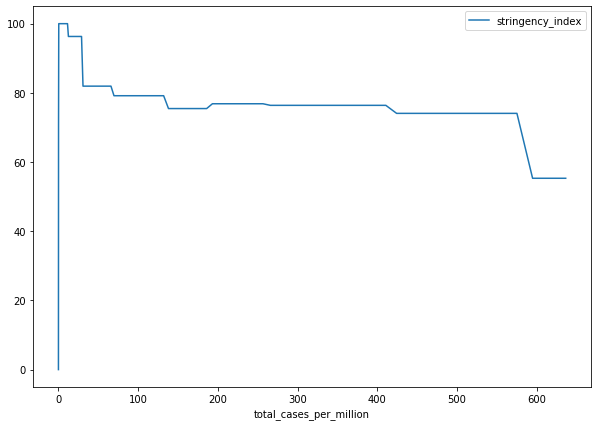

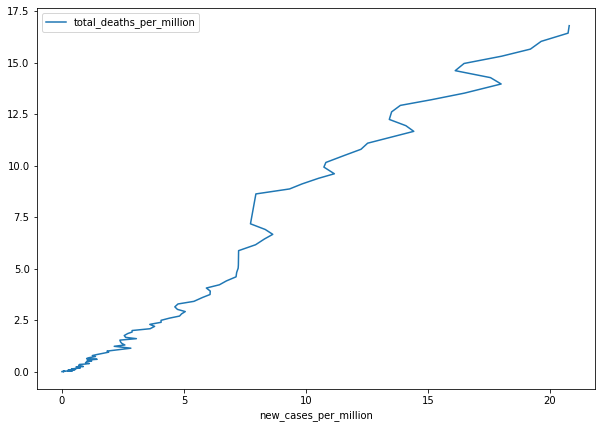

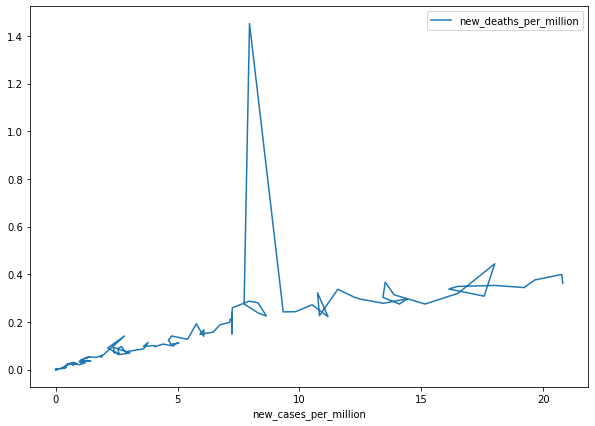

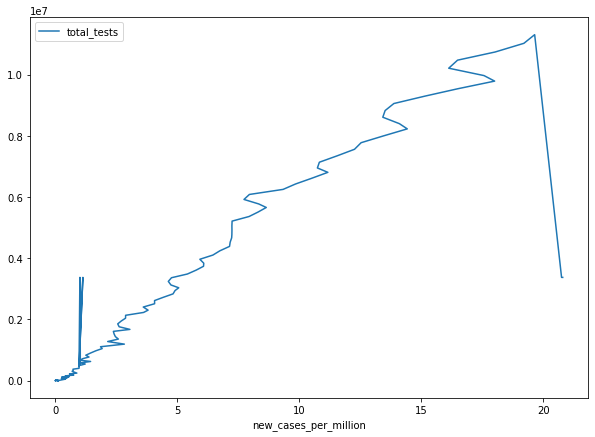

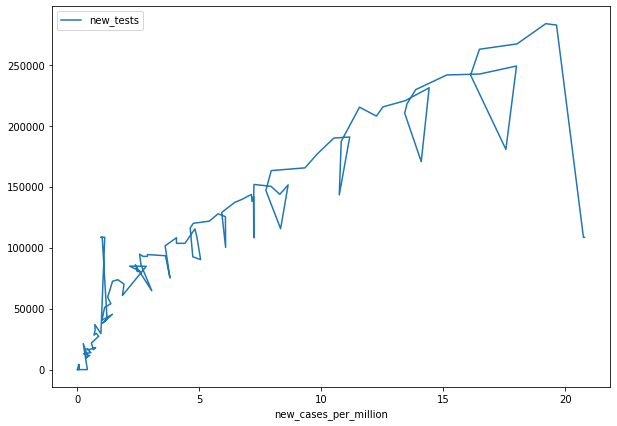

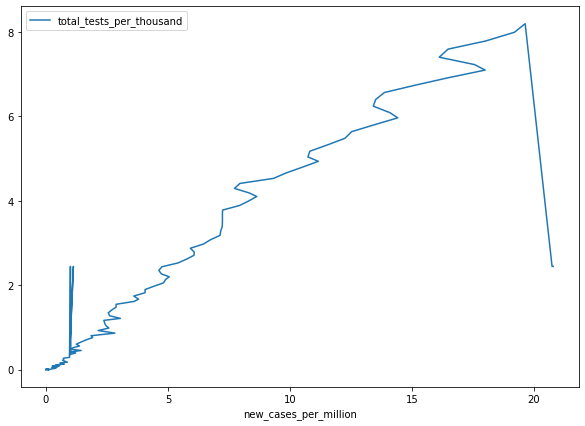

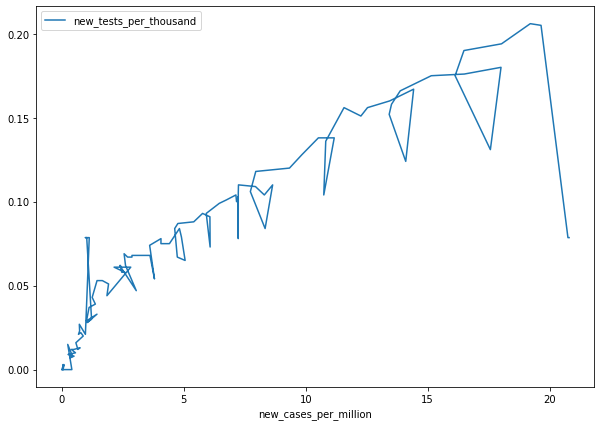

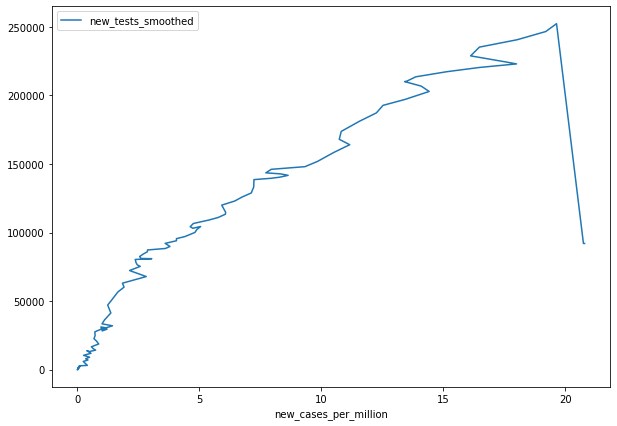

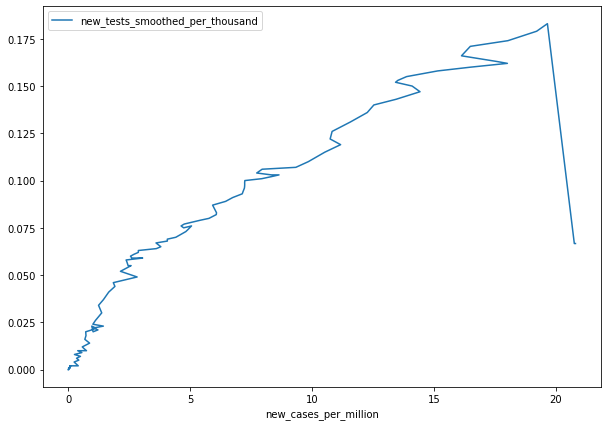

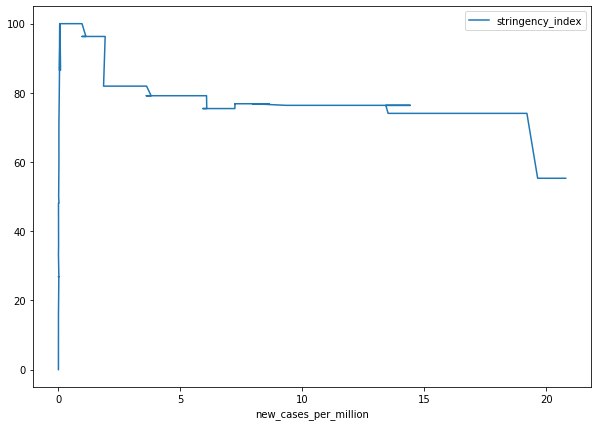

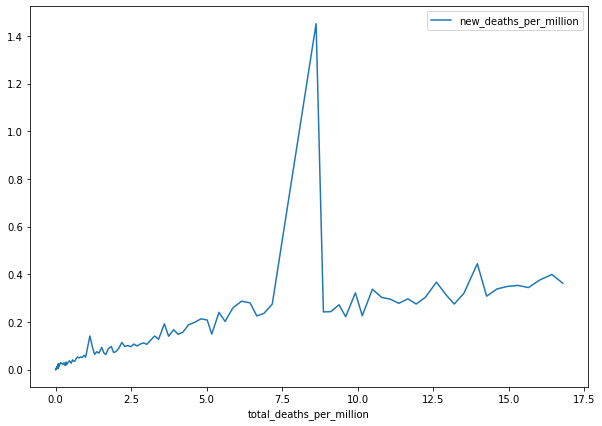

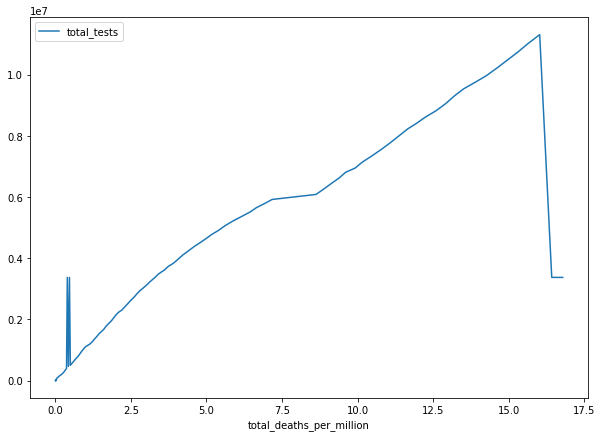

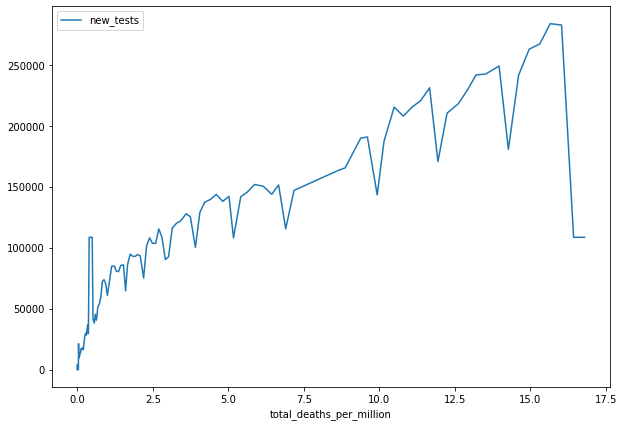

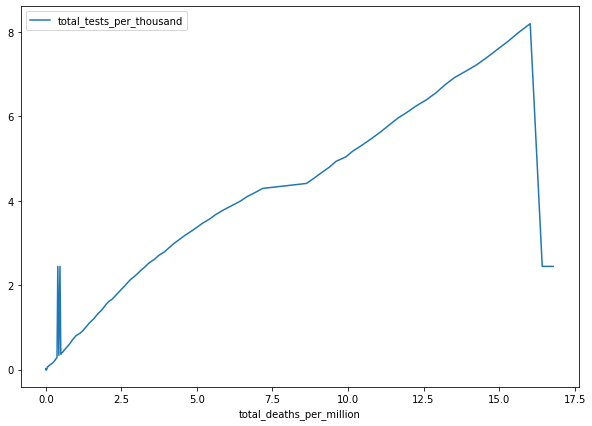

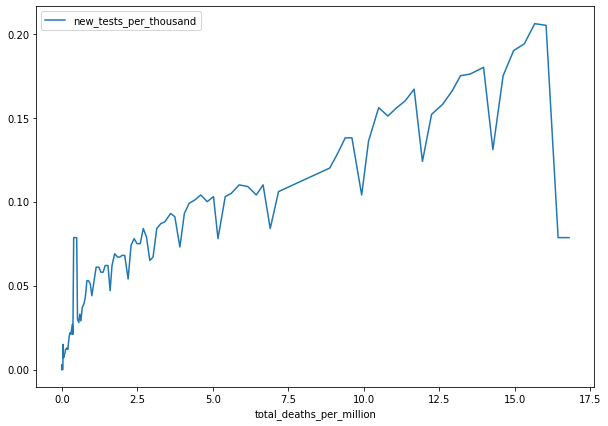

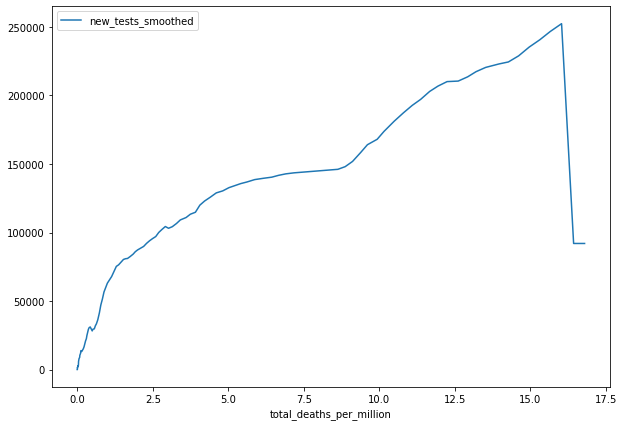

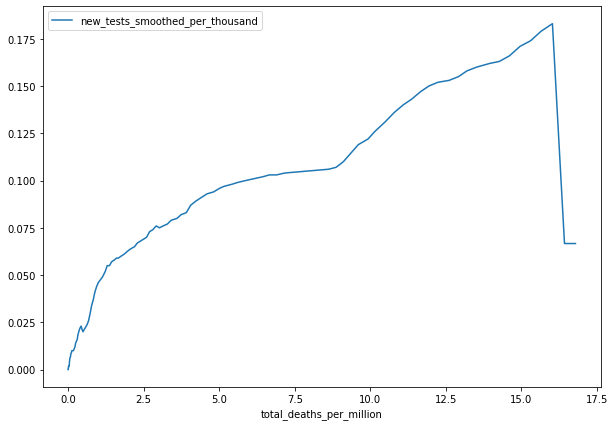

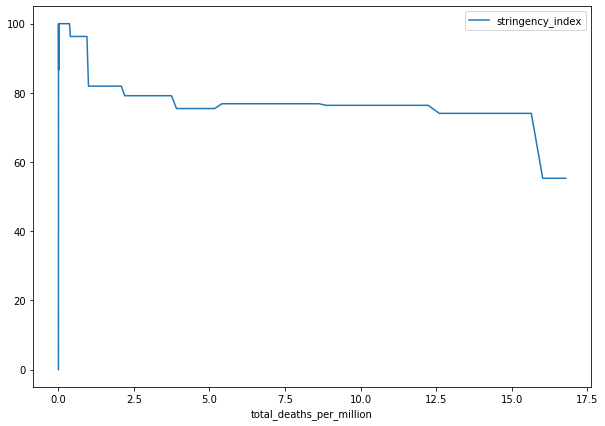

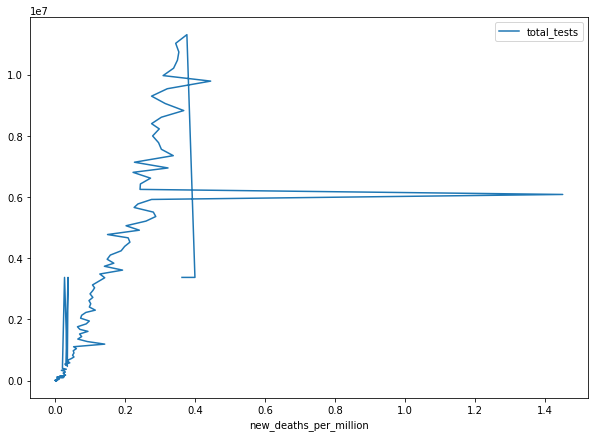

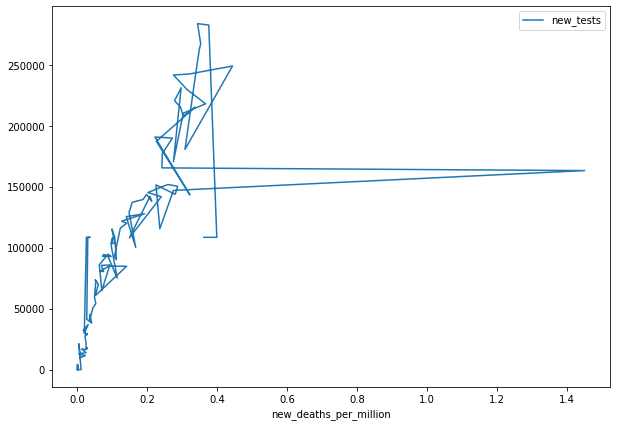

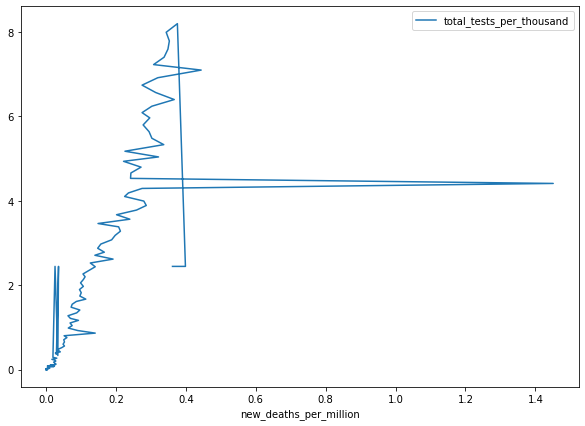

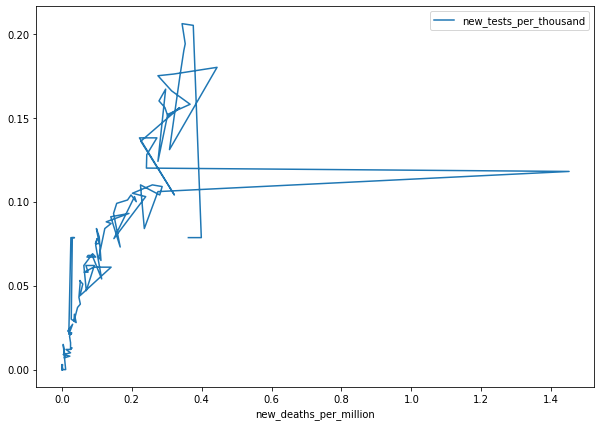

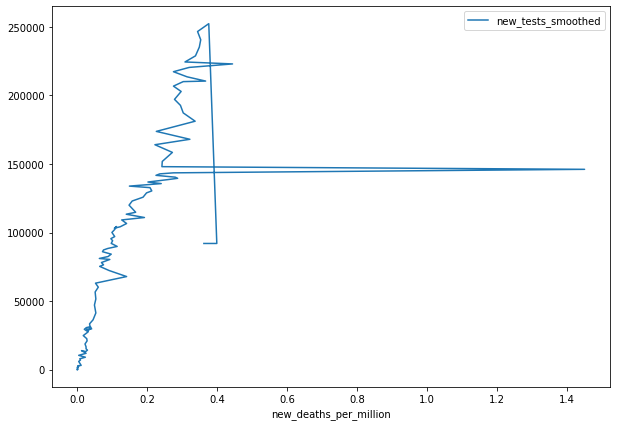

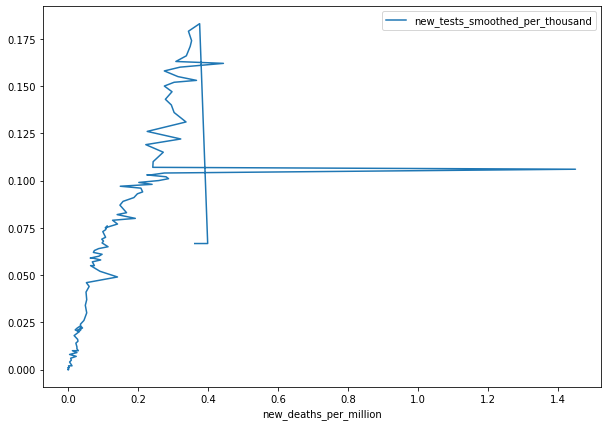

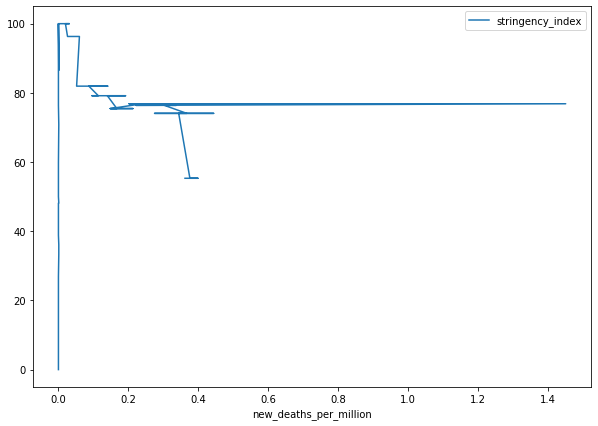

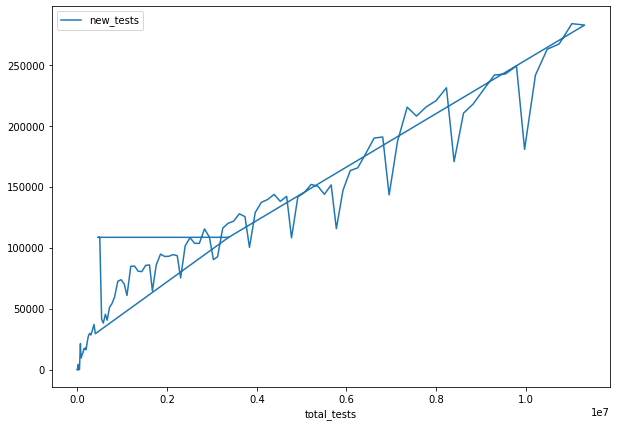

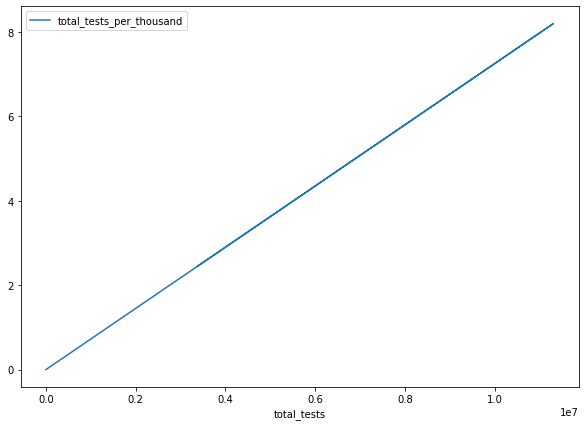

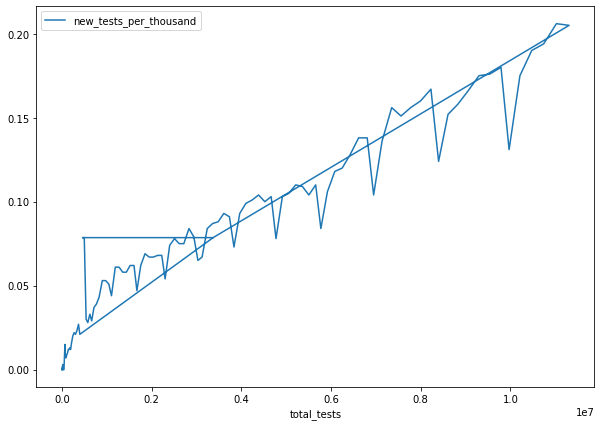

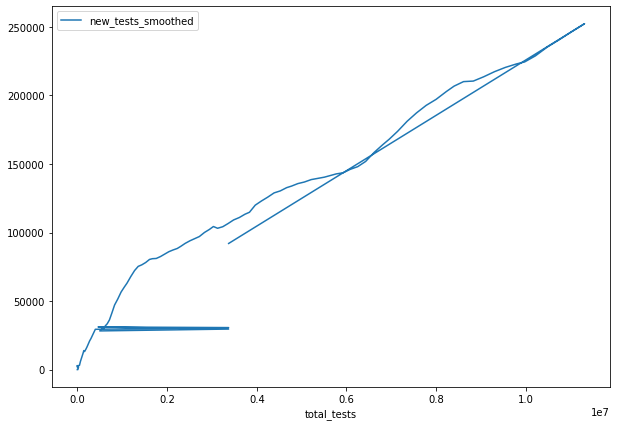

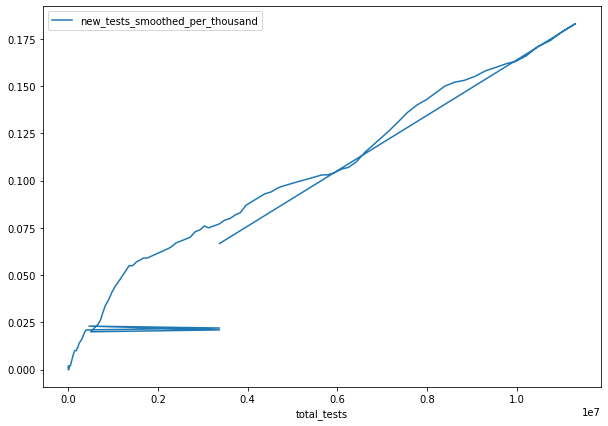

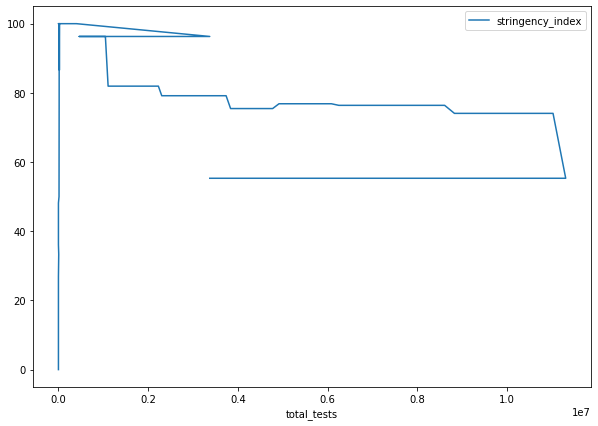

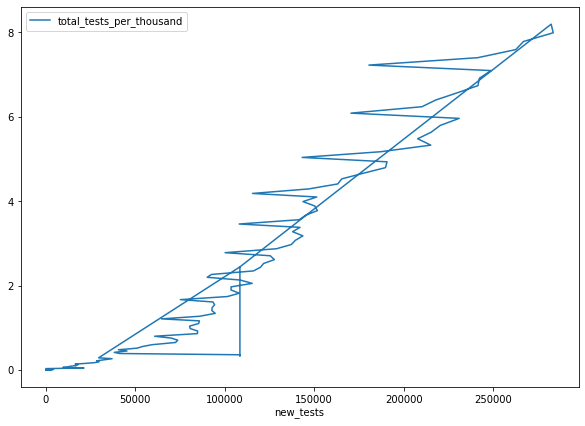

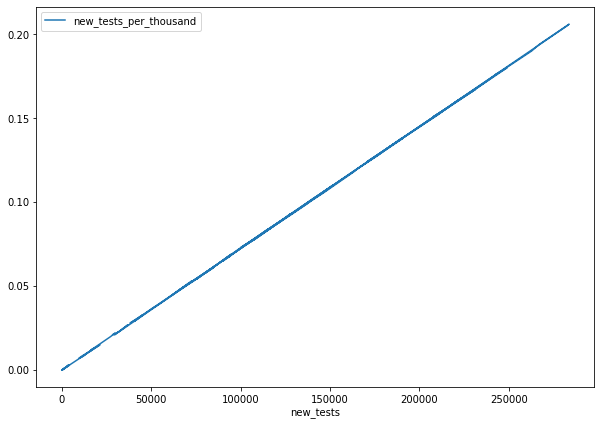

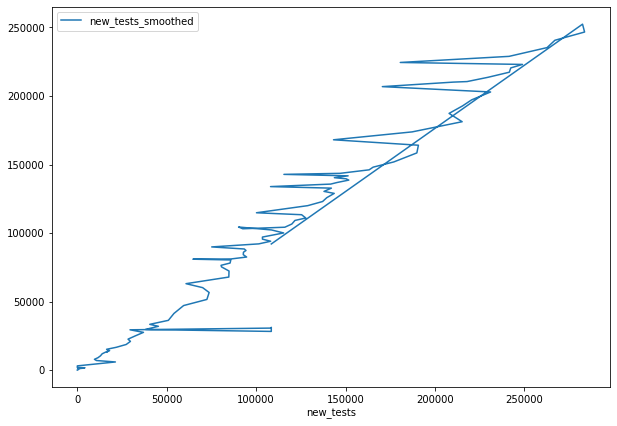

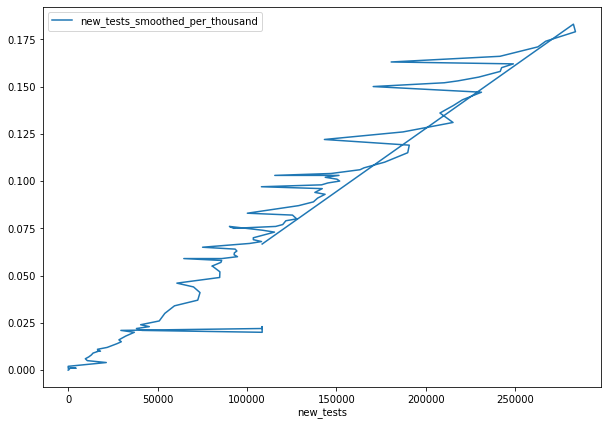

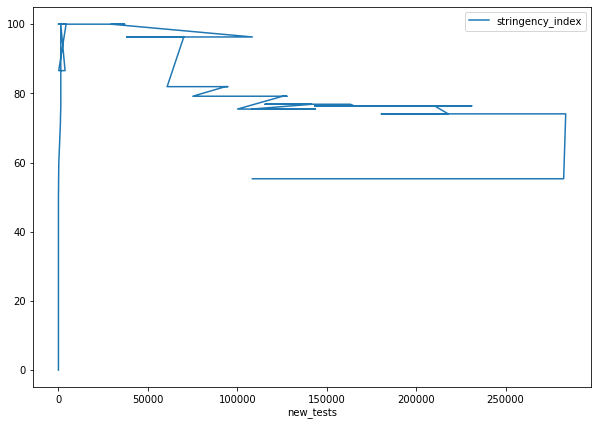

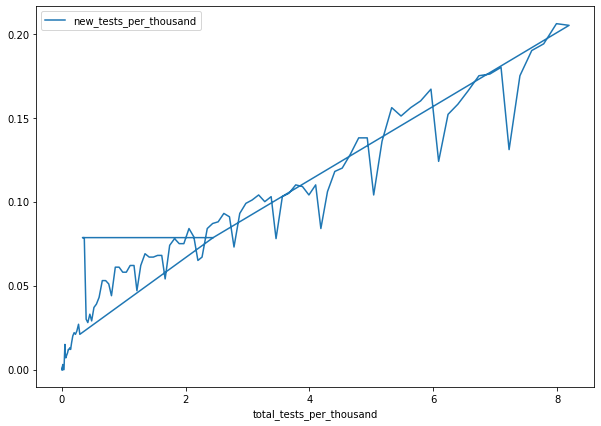

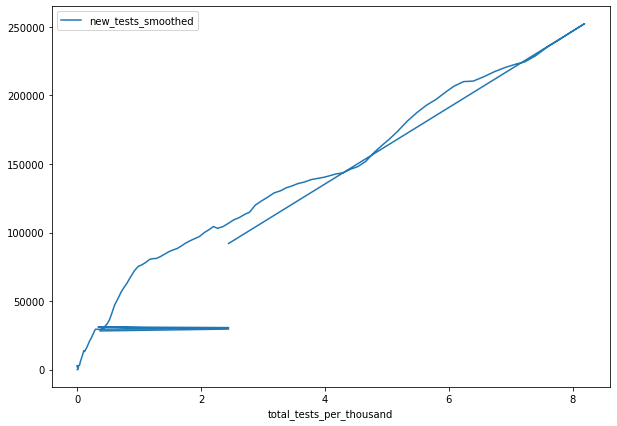

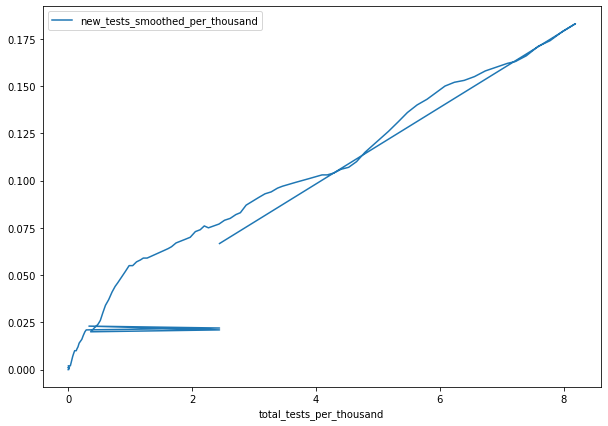

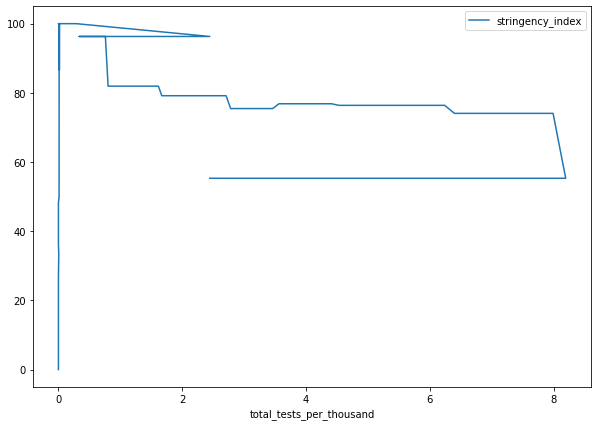

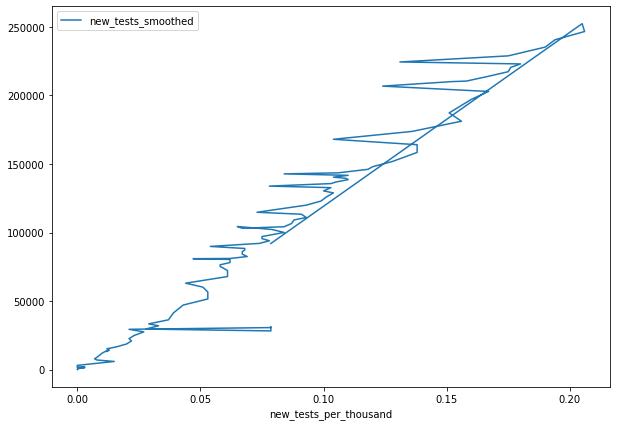

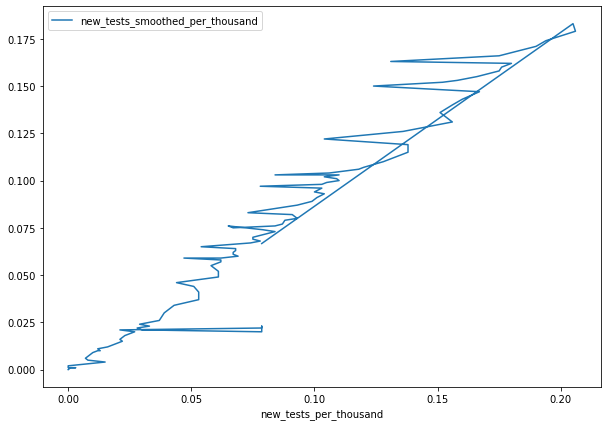

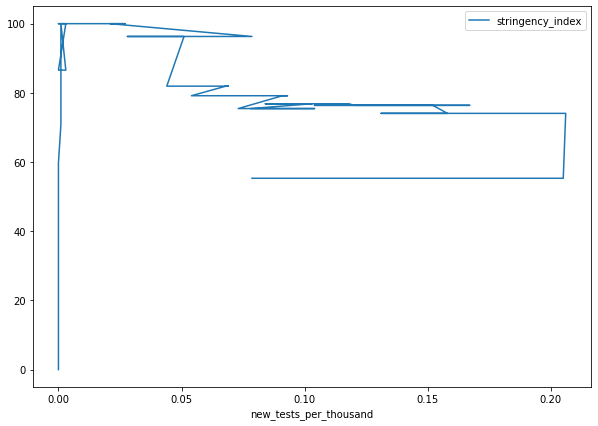

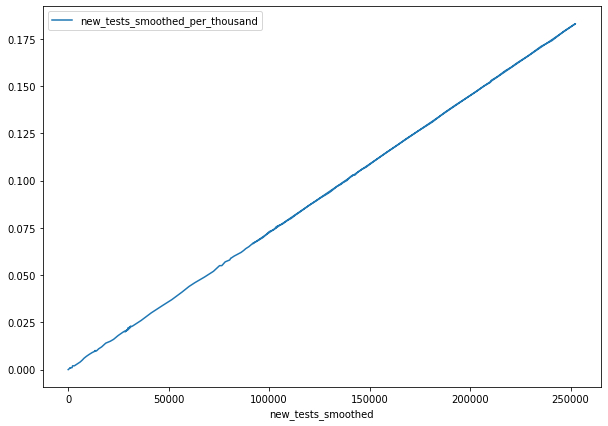

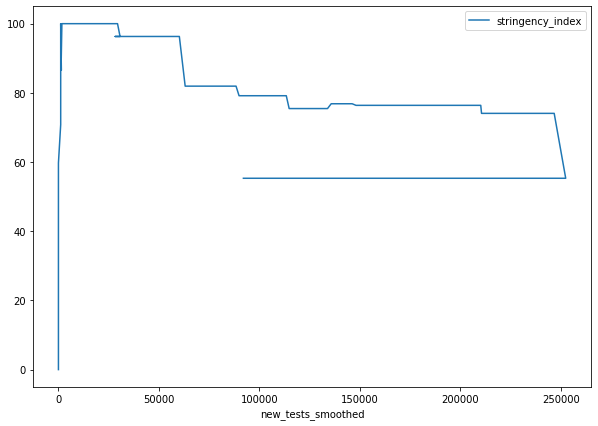

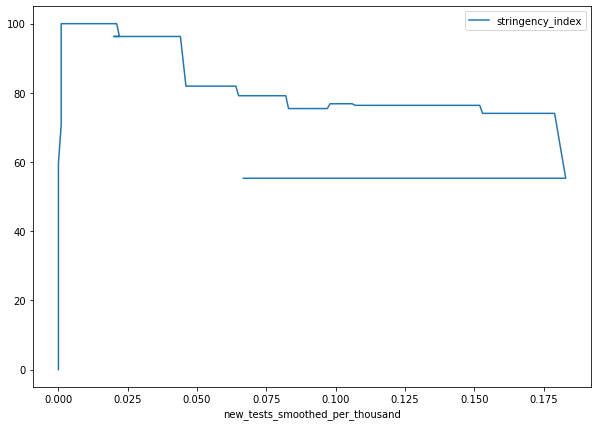

In [26]:
for i in range (0,len(columns)):
    for j in range (i+1,len(columns)):
        df.plot.line(x= columns[i], y = columns[j],figsize = (10,7))

####    
The line plots also show that there is a very high correlation between a few fields (almost 1 correlation). Thus there can be a lot of redundant fields. So one of the columns from each pair of highly correlated fields is dropped.

In [27]:
redundant = []
for i in range (0,len(columns)):
    for j in range (i+1,len(columns)):
        if df[columns[i]].corr(df[columns[j]]) > 0.9999:
            print(columns[i],'    ' ,columns[j])
            redundant.append(columns[j])     

total_cases      total_cases_per_million
new_cases      new_cases_per_million
total_deaths      total_deaths_per_million
new_deaths      new_deaths_per_million
total_tests      total_tests_per_thousand
new_tests      new_tests_per_thousand
new_tests_smoothed      new_tests_smoothed_per_thousand


In [28]:
df.drop(redundant, axis = 1 , inplace = True)

In [29]:
df

date  total_cases  new_cases  total_deaths  new_deaths   total_tests  \
0    737424          0.0        0.0           0.0         0.0  0.000000e+00   
1    737425          0.0        0.0           0.0         0.0  0.000000e+00   
2    737426          0.0        0.0           0.0         0.0  0.000000e+00   
3    737427          0.0        0.0           0.0         0.0  0.000000e+00   
4    737428          0.0        0.0           0.0         0.0  0.000000e+00   
..      ...          ...        ...           ...         ...           ...   
190  737615     767296.0    24879.0       21129.0       487.0  1.074083e+07   
191  737616     793802.0    26506.0       21604.0       475.0  1.102449e+07   
192  737617     820916.0    27114.0       22123.0       519.0  1.130700e+07   
193  737618     849553.0    28637.0       22674.0       551.0  3.373111e+06   
194  737619     878254.0    28701.0       23174.0       500.0  3.373111e+06   

         new_tests  new_tests_smoothed  stringency_index  
0         0.000000            0.000000          0.000000  
1         0.000000            0.000000          0.000000  
2         0.000000            0.000000          0.000000  
3         0.000000            0.000000          0.000000  
4         0.000000            0.000000          0.000000  
..             ...                 ...               ...  
190  267061.000000       240666.000000         74.070000  
191  283659.000000       246677.000000         74.070000  
192  282511.000000       252410.000000         55.309005  
193  108467.126214        92034.719298         55.309005  
194  108467.126214        92034.719298         55.309005  

[195 rows x 9 columns]

####    
The 'total_cases' field is removed from the feature set and used as the target variable.

In [30]:
y = df['total_cases']
df.drop('total_cases',axis = 1,inplace = True)

In [31]:
df

date  new_cases  total_deaths  new_deaths   total_tests      new_tests  \
0    737424        0.0           0.0         0.0  0.000000e+00       0.000000   
1    737425        0.0           0.0         0.0  0.000000e+00       0.000000   
2    737426        0.0           0.0         0.0  0.000000e+00       0.000000   
3    737427        0.0           0.0         0.0  0.000000e+00       0.000000   
4    737428        0.0           0.0         0.0  0.000000e+00       0.000000   
..      ...        ...           ...         ...           ...            ...   
190  737615    24879.0       21129.0       487.0  1.074083e+07  267061.000000   
191  737616    26506.0       21604.0       475.0  1.102449e+07  283659.000000   
192  737617    27114.0       22123.0       519.0  1.130700e+07  282511.000000   
193  737618    28637.0       22674.0       551.0  3.373111e+06  108467.126214   
194  737619    28701.0       23174.0       500.0  3.373111e+06  108467.126214   

     new_tests_smoothed  stringency_index  
0              0.000000          0.000000  
1              0.000000          0.000000  
2              0.000000          0.000000  
3              0.000000          0.000000  
4              0.000000          0.000000  
..                  ...               ...  
190       240666.000000         74.070000  
191       246677.000000         74.070000  
192       252410.000000         55.309005  
193        92034.719298         55.309005  
194        92034.719298         55.309005  

[195 rows x 8 columns]

####    
The feature set is normalized for more efficient computation.

In [32]:
X =(df-df.mean())/df.std()

In [33]:
X

date  new_cases  total_deaths  new_deaths  total_tests  new_tests  \
0   -1.718110  -0.634087     -0.582048   -0.571625    -0.654904  -0.784907   
1   -1.700514  -0.634087     -0.582048   -0.571625    -0.654904  -0.784907   
2   -1.682919  -0.634087     -0.582048   -0.571625    -0.654904  -0.784907   
3   -1.665324  -0.634087     -0.582048   -0.571625    -0.654904  -0.784907   
4   -1.647729  -0.634087     -0.582048   -0.571625    -0.654904  -0.784907   
..        ...        ...           ...         ...          ...        ...   
190  1.642585   2.868560      2.917360    1.770842     2.943760   2.672406   
191  1.660181   3.097621      2.996030    1.713122     3.038798   2.887280   
192  1.677776   3.183220      3.081987    1.924762     3.133452   2.872418   
193  1.695371   3.397639      3.173245    2.078682     0.475240   0.619284   
194  1.712967   3.406649      3.256055    1.833372     0.475240   0.619284   

     new_tests_smoothed  stringency_index  
0             -0.761674         -1.449651  
1             -0.761674         -1.449651  
2             -0.761674         -1.449651  
3             -0.761674         -1.449651  
4             -0.761674         -1.449651  
..                  ...               ...  
190            2.586506          0.501733  
191            2.670132          0.501733  
192            2.749890          0.007472  
193            0.518726          0.007472  
194            0.518726          0.007472  

[195 rows x 8 columns]

####    
The feature (x) and the target (y) sets are split 80-20 into training and testing sets.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

####    
A linear regression model is created and the data is fit to it.

In [35]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The model is judged based on the accuracy of the model on the test set.

In [36]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.9955175136211861

####     
A random forest regression model is created and the data is fit to it.

In [37]:
rfr = RandomForestRegressor(max_depth=4)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

The model is judged based on the accuracy of the model on the test set.

In [38]:
y_pred_1 = rfr.predict(X_test)
r2_score(y_test, y_pred_1)

0.9979189904039255

####     
An instance is created for judging the total number of cases on a future date. For illustration, 01-08-2020 has been used.

In [39]:
sample_data = ['IND','Asia','India','2020-08-01','?',45000,30000,600,700,25,18.5,0.5,20000000,400000,10.4,0.25,300000,0.23,'samples tested',85,1.38E+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66]

In [40]:
df_pred = pd.DataFrame([sample_data],columns= columns_1)
df_pred

iso_code continent location        date total_cases  new_cases  \
0      IND      Asia    India  2020-08-01           ?      45000   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0         30000         600                      700                     25   

   total_deaths_per_million  new_deaths_per_million  total_tests  new_tests  \
0                      18.5                     0.5     20000000     400000   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                      10.4                    0.25              300000   

   new_tests_smoothed_per_thousand     tests_units  stringency_index  \
0                             0.23  samples tested                85   

     population  population_density  median_age  aged_65_older  aged_70_older  \
0  1.380000e+09             450.419        28.2          5.989          3.414   

   gdp_per_capita  extreme_poverty  cvd_death_rate  diabetes_prevalence  \
0        6426.674             21.2          282.28                10.39   

   female_smokers  male_smokers  handwashing_facilities  \
0             1.9          20.6                   59.55   

   hospital_beds_per_thousand  life_expectancy  
0                        0.53            69.66

The date is changed to ordinal format.

In [41]:
df_pred["date"]=pd.to_datetime(df_pred["date"])
df_pred["date"]=df_pred["date"].map(dt.datetime.toordinal)

The unnecessary columns are dropped.

In [42]:
df_pred.drop(['total_cases'],axis =1, inplace = True)
df_pred.drop(redundant,axis =1, inplace = True)
df_pred.drop(['iso_code','continent','location','tests_units'],axis =1 , inplace= True)
df_pred.drop(unique_1,axis =1 , inplace= True)

A normalized version of the data is extracted.

In [43]:
df = df.append(df_pred)
df.reset_index(drop= True,inplace = True)

In [44]:
df_pred = (df-df.mean())/df.std()
df_pred

date  new_cases  total_deaths  new_deaths  total_tests  new_tests  \
0   -1.714674  -0.615554     -0.578130   -0.577062    -0.630918  -0.772089   
1   -1.697220  -0.615554     -0.578130   -0.577062    -0.630918  -0.772089   
2   -1.679766  -0.615554     -0.578130   -0.577062    -0.630918  -0.772089   
3   -1.662312  -0.615554     -0.578130   -0.577062    -0.630918  -0.772089   
4   -1.644858  -0.615554     -0.578130   -0.577062    -0.630918  -0.772089   
..        ...        ...           ...         ...          ...        ...   
191  1.636488   2.848183      2.844268    1.682739     2.767435   2.739834   
192  1.653942   2.927635      2.926486    1.892068     2.854520   2.725620   
193  1.671395   3.126657      3.013773    2.044307     0.408860   0.570820   
194  1.688849   3.135020      3.092980    1.801676     0.408860   0.570820   
195  2.020475   5.264932      4.174321    2.277423     5.534179   4.180227   

     new_tests_smoothed  stringency_index  
0             -0.758766         -1.455097  
1             -0.758766         -1.455097  
2             -0.758766         -1.455097  
3             -0.758766         -1.455097  
4             -0.758766         -1.455097  
..                  ...               ...  
191            2.583549          0.498190  
192            2.661227          0.003447  
193            0.488245          0.003447  
194            0.488245          0.003447  
195            3.306041          0.786423  

[196 rows x 8 columns]

In [45]:
df_pred.drop(range(0,df_pred.shape[0]-1),inplace = True)

In [46]:
df_pred

date  new_cases  total_deaths  new_deaths  total_tests  new_tests  \
195  2.020475   5.264932      4.174321    2.277423     5.534179   4.180227   

     new_tests_smoothed  stringency_index  
195            3.306041          0.786423

####    
Now the instance is used to get the required predictions.

##### Prediction using linear regression

In [47]:
reg.predict(df_pred)

array([1154728.62005119])

##### Prediction using random forest regression

In [48]:
rfr.predict(df_pred)

array([768278.22718182])